<a href="https://colab.research.google.com/github/Josue-Aldebaran-G-L/Proyecto-AVD/blob/Schen/AVD_Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importaciones

In [1]:
import sklearn as skl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import spacy as sp

from mpl_toolkits.mplot3d import Axes3D
from wordcloud import WordCloud
from scipy.fft import fft, fftfreq

In [2]:
path = "/content/drive/MyDrive/Datasets/games_march2025_full.csv"
dataset = pd.read_csv(path)

In [3]:
dataset.columns

Index(['appid', 'name', 'release_date', 'required_age', 'price', 'dlc_count',
       'detailed_description', 'about_the_game', 'short_description',
       'reviews', 'header_image', 'website', 'support_url', 'support_email',
       'windows', 'mac', 'linux', 'metacritic_score', 'metacritic_url',
       'achievements', 'recommendations', 'notes', 'supported_languages',
       'full_audio_languages', 'packages', 'developers', 'publishers',
       'categories', 'genres', 'screenshots', 'movies', 'user_score',
       'score_rank', 'positive', 'negative', 'estimated_owners',
       'average_playtime_forever', 'average_playtime_2weeks',
       'median_playtime_forever', 'median_playtime_2weeks', 'discount',
       'peak_ccu', 'tags', 'pct_pos_total', 'num_reviews_total',
       'pct_pos_recent', 'num_reviews_recent'],
      dtype='object')

In [4]:
norm_dataset = dataset.drop(
  [
    "appid",
    "name",
    "short_description",
    "header_image",
    "website",
    "support_url",
    "support_email",
    "metacritic_url",
    "developers",
    "screenshots",
    "movies",
    "user_score",
    "score_rank",
    "pct_pos_recent",
    "num_reviews_recent",
    "supported_languages",
    "full_audio_languages",
    "linux",
    "mac",
    "windows",
    "packages"
  ],
  axis=1
)

In [5]:
norm_dataset.head(3)

release_date  required_age  price  dlc_count  \
0   2012-08-21             0    0.0          1   
1   2017-12-21             0    0.0          0   
2   2013-07-09             0    0.0          2   

                                detailed_description  \
0  For over two decades, Counter-Strike has offer...   
1  LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...   
2  The most-played game on Steam. Every day, mill...   

                                      about_the_game  \
0  For over two decades, Counter-Strike has offer...   
1  LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...   
2  The most-played game on Steam. Every day, mill...   

                                             reviews  metacritic_score  \
0                                                NaN                 0   
1                                                NaN                 0   
2  “A modern multiplayer masterpiece.” 9.5/10 – D...                90   

   achievements  recommendations  ...       estimated_owners  \
0             1          4401572  ...  100000000 - 200000000   
1            37          1732007  ...   50000000 - 100000000   
2             0            14337  ...  200000000 - 500000000   

  average_playtime_forever average_playtime_2weeks median_playtime_forever  \
0                    33189                     879                    5174   
1                        0                       0                       0   
2                    43031                    1536                     898   

   median_playtime_2weeks  discount peak_ccu  \
0                     350         0  1212356   
1                       0         0   616738   
2                     892         0   555977   

                                                tags  pct_pos_total  \
0  {'FPS': 90857, 'Shooter': 65397, 'Multiplayer'...             86   
1  {'Survival': 14838, 'Shooter': 12727, 'Battle ...             59   
2  {'Free to Play': 59933, 'MOBA': 20158, 'Multip...             81   

   num_reviews_total  
0            8632939  
1            2513842  
2            2452595  

[3 rows x 26 columns]

In [6]:
norm_dataset.tail(3)

release_date  required_age  price  dlc_count  \
94945   2019-10-10             0   1.99          0   
94946   2025-01-25             0  29.99          0   
94947   2018-03-01             0   9.99          0   

                                    detailed_description  \
94945  Player One is a new 3D game where you take con...   
94946      This is an open world game on 3D, also a m...   
94947  Ragtag Adventurers is a Boss Rush game that pi...   

                                          about_the_game reviews  \
94945  Player One is a new 3D game where you take con...     NaN   
94946      This is an open world game on 3D, also a m...     NaN   
94947  Ragtag Adventurers is a Boss Rush game that pi...     NaN   

       metacritic_score  achievements  recommendations  ... estimated_owners  \
94945                 0             0                0  ...        0 - 20000   
94946                 0            34                0  ...        0 - 20000   
94947                 0            12                0  ...        0 - 20000   

      average_playtime_forever average_playtime_2weeks  \
94945                        0                       0   
94946                        0                       0   
94947                        0                       0   

      median_playtime_forever  median_playtime_2weeks  discount peak_ccu  \
94945                       0                       0         0        0   
94946                       0                       0         0        0   
94947                       0                       0         0        0   

                                                    tags  pct_pos_total  \
94945                  {'Indie': 31, 'Early Access': 21}             -1   
94946  {'RPG': 117, 'Action-Adventure': 111, 'Strateg...             -1   
94947                        {'Action': 22, 'Indie': 21}             -1   

       num_reviews_total  
94945                 -1  
94946                 -1  
94947                 -1  

[3 rows x 26 columns]

In [7]:
print(len(dataset.columns))
print(len(norm_dataset.columns))

47
26


In [8]:
norm_dataset.describe()

required_age         price     dlc_count  metacritic_score  \
count  94948.000000  94948.000000  94948.000000      94948.000000   
mean       0.178287      6.911444      0.563203          2.763966   
std        1.701329     13.071148     14.915685         14.111183   
min       -1.000000      0.000000      0.000000          0.000000   
25%        0.000000      0.990000      0.000000          0.000000   
50%        0.000000      3.990000      0.000000          0.000000   
75%        0.000000      9.990000      0.000000          0.000000   
max       21.000000    999.980000   3427.000000         97.000000   

       achievements  recommendations      positive      negative  \
count  94948.000000     9.494800e+04  9.494800e+04  9.494800e+04   
mean      19.543729     1.022212e+03  1.217905e+03  2.021265e+02   
std      159.798834     2.274151e+04  3.097974e+04  5.955813e+03   
min        0.000000     0.000000e+00  0.000000e+00  0.000000e+00   
25%        0.000000     0.000000e+00  0.000000e+00  0.000000e+00   
50%        2.000000     0.000000e+00  8.000000e+00  2.000000e+00   
75%       19.000000     0.000000e+00  5.100000e+01  1.500000e+01   
max     9821.000000     4.401572e+06  7.480813e+06  1.135108e+06   

       average_playtime_forever  average_playtime_2weeks  \
count              9.494800e+04             94948.000000   
mean               1.086097e+02                 4.757320   
std                6.620827e+03               175.961001   
min                0.000000e+00                 0.000000   
25%                0.000000e+00                 0.000000   
50%                0.000000e+00                 0.000000   
75%                0.000000e+00                 0.000000   
max                1.462997e+06             18568.000000   

       median_playtime_forever  median_playtime_2weeks      discount  \
count             9.494800e+04            94948.000000  94948.000000   
mean              1.083665e+02                5.017926      4.307094   
std               8.555995e+03              184.244795     16.111535   
min               0.000000e+00                0.000000      0.000000   
25%               0.000000e+00                0.000000      0.000000   
50%               0.000000e+00                0.000000      0.000000   
75%               0.000000e+00                0.000000      0.000000   
max               1.462997e+06            18568.000000    100.000000   

           peak_ccu  pct_pos_total  num_reviews_total  
count  9.494800e+04   94948.000000       9.494800e+04  
mean   9.285272e+01      44.630261       1.448044e+03  
std    5.554794e+03      40.837047       3.548141e+04  
min    0.000000e+00      -1.000000      -1.000000e+00  
25%    0.000000e+00      -1.000000      -1.000000e+00  
50%    0.000000e+00      58.000000       1.500000e+01  
75%    0.000000e+00      84.000000       8.000000e+01  
max    1.212356e+06     100.000000       8.632939e+06

#Limpieza de Datos

In [9]:
norm_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94948 entries, 0 to 94947
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   release_date              94948 non-null  object 
 1   required_age              94948 non-null  int64  
 2   price                     94948 non-null  float64
 3   dlc_count                 94948 non-null  int64  
 4   detailed_description      89522 non-null  object 
 5   about_the_game            89499 non-null  object 
 6   reviews                   10428 non-null  object 
 7   metacritic_score          94948 non-null  int64  
 8   achievements              94948 non-null  int64  
 9   recommendations           94948 non-null  int64  
 10  notes                     16652 non-null  object 
 11  publishers                94948 non-null  object 
 12  categories                94948 non-null  object 
 13  genres                    94948 non-null  object 
 14  positi

##"about_the_game" & "detailed_description"

In [10]:
not_na_indexes = norm_dataset["about_the_game"].dropna().index.intersection(norm_dataset["detailed_description"].dropna().index)
len(not_na_indexes)

89499

In [11]:
norm_dataset = norm_dataset.loc[not_na_indexes]
norm_dataset.index = range(len(norm_dataset))

In [12]:
norm_dataset.tail(3)

release_date  required_age  price  dlc_count  \
89496   2019-10-10             0   1.99          0   
89497   2025-01-25             0  29.99          0   
89498   2018-03-01             0   9.99          0   

                                    detailed_description  \
89496  Player One is a new 3D game where you take con...   
89497      This is an open world game on 3D, also a m...   
89498  Ragtag Adventurers is a Boss Rush game that pi...   

                                          about_the_game reviews  \
89496  Player One is a new 3D game where you take con...     NaN   
89497      This is an open world game on 3D, also a m...     NaN   
89498  Ragtag Adventurers is a Boss Rush game that pi...     NaN   

       metacritic_score  achievements  recommendations  ... estimated_owners  \
89496                 0             0                0  ...        0 - 20000   
89497                 0            34                0  ...        0 - 20000   
89498                 0            12                0  ...        0 - 20000   

      average_playtime_forever average_playtime_2weeks  \
89496                        0                       0   
89497                        0                       0   
89498                        0                       0   

      median_playtime_forever  median_playtime_2weeks  discount peak_ccu  \
89496                       0                       0         0        0   
89497                       0                       0         0        0   
89498                       0                       0         0        0   

                                                    tags  pct_pos_total  \
89496                  {'Indie': 31, 'Early Access': 21}             -1   
89497  {'RPG': 117, 'Action-Adventure': 111, 'Strateg...             -1   
89498                        {'Action': 22, 'Indie': 21}             -1   

       num_reviews_total  
89496                 -1  
89497                 -1  
89498                 -1  

[3 rows x 26 columns]

In [13]:
norm_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89499 entries, 0 to 89498
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   release_date              89499 non-null  object 
 1   required_age              89499 non-null  int64  
 2   price                     89499 non-null  float64
 3   dlc_count                 89499 non-null  int64  
 4   detailed_description      89499 non-null  object 
 5   about_the_game            89499 non-null  object 
 6   reviews                   10410 non-null  object 
 7   metacritic_score          89499 non-null  int64  
 8   achievements              89499 non-null  int64  
 9   recommendations           89499 non-null  int64  
 10  notes                     16614 non-null  object 
 11  publishers                89499 non-null  object 
 12  categories                89499 non-null  object 
 13  genres                    89499 non-null  object 
 14  positi

##"reviews"

In [14]:
norm_dataset["reviews"].head(3)

0                                                  NaN
1                                                  NaN
2    “A modern multiplayer masterpiece.” 9.5/10 – D...
Name: reviews, dtype: object

In [15]:
for i, text in enumerate(norm_dataset[norm_dataset["reviews"].notna()]["reviews"]):
  if(i == 10):
    break
  print(i, text)

0 “A modern multiplayer masterpiece.” 9.5/10 – Destructoid “Once you start to learn its secrets, there’s a wild and exciting variety of play here that’s unmatched, even by its peers.” 9.4/10 – IGN “Dota 2 is possibly the only competitive free-to-play game that is totally uncompromised by its business model.” 90/100 – PC Gamer 
1 “Rust is one of the cruelest games on Steam, and that's what makes it so compelling.” PC Gamer “Usually, people will just kill you on sight, but not always.” Rock Paper Shotgun “For competitive players who want a mix of survival and crafting, Rust is the best there is” IGN 
2 “It brings back the silly glee of unbridled experimentation, intuitive learning and playful social interactions that most of us haven't experienced since childhood. For that, it's essential.” 88 – PC Gamer 
3 “The champion of Battle Royales.” 9/10 – GameSpot “The best Battle Royale game.” 5/5 – GamesRadar+ “Free, friendly, and consistently fun. It's the best Battle Royale game available to

In [16]:
norm_dataset["reviews"] = norm_dataset["reviews"].fillna("")

In [17]:
norm_dataset["reviews"].isna().unique()

array([False])

##"notes"

In [18]:
norm_dataset["notes"]

0                     Includes intense violence and blood.
1                                                      NaN
2        Dota 2 includes fantasy violence, use of alcoh...
3                                                      NaN
4                                                      NaN
                               ...                        
89494                                                  NaN
89495                                                  NaN
89496                                                  NaN
89497                                                  NaN
89498                                                  NaN
Name: notes, Length: 89499, dtype: object

In [19]:
norm_dataset["notes"] = norm_dataset["notes"].fillna("")

In [20]:
norm_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89499 entries, 0 to 89498
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   release_date              89499 non-null  object 
 1   required_age              89499 non-null  int64  
 2   price                     89499 non-null  float64
 3   dlc_count                 89499 non-null  int64  
 4   detailed_description      89499 non-null  object 
 5   about_the_game            89499 non-null  object 
 6   reviews                   89499 non-null  object 
 7   metacritic_score          89499 non-null  int64  
 8   achievements              89499 non-null  int64  
 9   recommendations           89499 non-null  int64  
 10  notes                     89499 non-null  object 
 11  publishers                89499 non-null  object 
 12  categories                89499 non-null  object 
 13  genres                    89499 non-null  object 
 14  positi

##Resultados

In [21]:
norm_dataset

release_date  required_age  price  dlc_count  \
0       2012-08-21             0   0.00          1   
1       2017-12-21             0   0.00          0   
2       2013-07-09             0   0.00          2   
3       2015-04-13            17   0.00          0   
4       2015-12-01            17  19.99          9   
...            ...           ...    ...        ...   
89494   2024-02-29             0   3.99          0   
89495   2020-01-07             0  10.00          0   
89496   2019-10-10             0   1.99          0   
89497   2025-01-25             0  29.99          0   
89498   2018-03-01             0   9.99          0   

                                    detailed_description  \
0      For over two decades, Counter-Strike has offer...   
1      LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...   
2      The most-played game on Steam. Every day, mill...   
3      When a young street hustler, a retired bank ro...   
4      Edition Comparison Ultimate Edition The Tom Cl...   
...                                                  ...   
89494  The name of the game is literally the game. Ou...   
89495  Join Our Discord Channel About the Game Briefl...   
89496  Player One is a new 3D game where you take con...   
89497      This is an open world game on 3D, also a m...   
89498  Ragtag Adventurers is a Boss Rush game that pi...   

                                          about_the_game  \
0      For over two decades, Counter-Strike has offer...   
1      LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...   
2      The most-played game on Steam. Every day, mill...   
3      When a young street hustler, a retired bank ro...   
4      “One of the best first-person shooters ever ma...   
...                                                  ...   
89494  The name of the game is literally the game. Ou...   
89495  Briefly: Lands of Pharaoh is a third person vi...   
89496  Player One is a new 3D game where you take con...   
89497      This is an open world game on 3D, also a m...   
89498  Ragtag Adventurers is a Boss Rush game that pi...   

                                                 reviews  metacritic_score  \
0                                                                        0   
1                                                                        0   
2      “A modern multiplayer masterpiece.” 9.5/10 – D...                90   
3                                                                       96   
4                                                                        0   
...                                                  ...               ...   
89494                                                                    0   
89495                                                                    0   
89496                                                                    0   
89497                                                                    0   
89498                                                                    0   

       achievements  recommendations  ...       estimated_owners  \
0                 1          4401572  ...  100000000 - 200000000   
1                37          1732007  ...   50000000 - 100000000   
2                 0            14337  ...  200000000 - 500000000   
3                77          1803063  ...   50000000 - 100000000   
4                 0          1160724  ...              0 - 20000   
...             ...              ...  ...                    ...   
89494             6                0  ...              0 - 20000   
89495             0                0  ...              0 - 20000   
89496             0                0  ...              0 - 20000   
89497            34                0  ...              0 - 20000   
89498            12                0  ...              0 - 20000   

      average_playtime_forever average_playtime_2weeks  \
0                        33189                     879   
1                            0               

In [22]:
int(norm_dataset.isna().sum().sum())

0

#Normalización de las Columnas

In [23]:
cleaned_dataset = norm_dataset.copy()

##"required_age"

In [24]:
norm_dataset["required_age"].value_counts()

required_age
 0     88447
 17      643
 13      154
 18      152
 16       31
 10       26
 12       21
 3         7
 7         5
 6         4
 15        3
 1         2
-1         1
 20        1
 14        1
 21        1
Name: count, dtype: int64

In [25]:
norm_dataset.drop(norm_dataset[norm_dataset["required_age"] == -1].index, inplace=True, axis=0, errors="ignore")

Según ESRB

- E (cualquiera)
- E10+ (10 <= edad)
- T (13 <= edad)
- M (17 <= edad)
- Ao (18 <= edad)

In [26]:
def ESRB_clasificator(age:int) -> str:
  if(age <= 3):
    return "E"
  elif(age <= 10):
    return "E10+"
  elif(age <= 13):
    return "T"
  elif(age <= 17):
    return "M"
  else:
    return "Ao"

In [27]:
norm_dataset["required_age"] = norm_dataset["required_age"].apply(lambda x: ESRB_clasificator(x))

In [28]:
norm_dataset["required_age"].value_counts()

required_age
E       88456
M         678
T         175
Ao        154
E10+       35
Name: count, dtype: int64

##"release_date"

In [29]:
norm_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89498 entries, 0 to 89498
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   release_date              89498 non-null  object 
 1   required_age              89498 non-null  object 
 2   price                     89498 non-null  float64
 3   dlc_count                 89498 non-null  int64  
 4   detailed_description      89498 non-null  object 
 5   about_the_game            89498 non-null  object 
 6   reviews                   89498 non-null  object 
 7   metacritic_score          89498 non-null  int64  
 8   achievements              89498 non-null  int64  
 9   recommendations           89498 non-null  int64  
 10  notes                     89498 non-null  object 
 11  publishers                89498 non-null  object 
 12  categories                89498 non-null  object 
 13  genres                    89498 non-null  object 
 14  positive   

In [30]:
norm_dataset.head()

release_date required_age  price  dlc_count  \
0   2012-08-21            E   0.00          1   
1   2017-12-21            E   0.00          0   
2   2013-07-09            E   0.00          2   
3   2015-04-13            M   0.00          0   
4   2015-12-01            M  19.99          9   

                                detailed_description  \
0  For over two decades, Counter-Strike has offer...   
1  LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...   
2  The most-played game on Steam. Every day, mill...   
3  When a young street hustler, a retired bank ro...   
4  Edition Comparison Ultimate Edition The Tom Cl...   

                                      about_the_game  \
0  For over two decades, Counter-Strike has offer...   
1  LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...   
2  The most-played game on Steam. Every day, mill...   
3  When a young street hustler, a retired bank ro...   
4  “One of the best first-person shooters ever ma...   

                                             reviews  metacritic_score  \
0                                                                    0   
1                                                                    0   
2  “A modern multiplayer masterpiece.” 9.5/10 – D...                90   
3                                                                   96   
4                                                                    0   

   achievements  recommendations  ...       estimated_owners  \
0             1          4401572  ...  100000000 - 200000000   
1            37          1732007  ...   50000000 - 100000000   
2             0            14337  ...  200000000 - 500000000   
3            77          1803063  ...   50000000 - 100000000   
4             0          1160724  ...              0 - 20000   

  average_playtime_forever average_playtime_2weeks median_playtime_forever  \
0                    33189                     879                    5174   
1                        0                       0                       0   
2                    43031                    1536                     898   
3                    19323                     771                    7101   
4                        0                       0                       0   

   median_playtime_2weeks  discount peak_ccu  \
0                     350         0  1212356   
1                       0         0   616738   
2                     892         0   555977   
3                      74         0   117698   
4                       0         0        0   

                                                tags  pct_pos_total  \
0  {'FPS': 90857, 'Shooter': 65397, 'Multiplayer'...             86   
1  {'Survival': 14838, 'Shooter': 12727, 'Battle ...             59   
2  {'Free to Play': 59933, 'MOBA': 20158, 'Multip...             81   
3  {'Open World': 32644, 'Action': 23539, 'Multip...             87   
4  {'FPS': 8082, 'Multiplayer': 6139, 'Tactical':...             84   

   num_reviews_total  
0            8632939  
1            2513842  
2            2452595  
3            1803832  
4            1168404  

[5 rows x 26 columns]

In [31]:
norm_dataset["release_year"] = norm_dataset["release_date"].apply(lambda x: int(x.split("-")[0]))
norm_dataset["release_month"] = norm_dataset["release_date"].apply(lambda x: int(x.split("-")[1]))
norm_dataset["release_day"] = norm_dataset["release_date"].apply(lambda x: int(x.split("-")[2]))

In [32]:
norm_dataset[["release_date", "release_year", "release_month", "release_month"]]

release_date  release_year  release_month  release_month
0       2012-08-21          2012              8              8
1       2017-12-21          2017             12             12
2       2013-07-09          2013              7              7
3       2015-04-13          2015              4              4
4       2015-12-01          2015             12             12
...            ...           ...            ...            ...
89494   2024-02-29          2024              2              2
89495   2020-01-07          2020              1              1
89496   2019-10-10          2019             10             10
89497   2025-01-25          2025              1              1
89498   2018-03-01          2018              3              3

[89498 rows x 4 columns]

In [33]:
norm_dataset["release_date"] = pd.to_datetime(norm_dataset["release_date"])

In [34]:
norm_dataset[["release_date", "release_year", "release_month", "release_month"]].isna().sum()

release_date     0
release_year     0
release_month    0
release_month    0
dtype: int64

##"full_descriptions" & "all_tags"

In [35]:
norm_dataset["full_description"] = norm_dataset["about_the_game"] + " " + norm_dataset["detailed_description"] + norm_dataset["notes"]

In [36]:
norm_dataset[["genres", "tags", "categories"]]

genres  \
0                             ['Action', 'Free To Play']   
1      ['Action', 'Adventure', 'Massively Multiplayer...   
2                 ['Action', 'Strategy', 'Free To Play']   
3                                ['Action', 'Adventure']   
4                                             ['Action']   
...                                                  ...   
89494                          ['Indie', 'Early Access']   
89495       ['Action', 'Adventure', 'Indie', 'Strategy']   
89496                          ['Indie', 'Early Access']   
89497     ['Adventure', 'RPG', 'Simulation', 'Strategy']   
89498                                ['Action', 'Indie']   

                                                    tags  \
0      {'FPS': 90857, 'Shooter': 65397, 'Multiplayer'...   
1      {'Survival': 14838, 'Shooter': 12727, 'Battle ...   
2      {'Free to Play': 59933, 'MOBA': 20158, 'Multip...   
3      {'Open World': 32644, 'Action': 23539, 'Multip...   
4      {'FPS': 8082, 'Multiplayer': 6139, 'Tactical':...   
...                                                  ...   
89494  {'2D Platformer': 91, 'Runner': 85, 'Platforme...   
89495  {'Action': 43, 'Adventure': 41, 'Indie': 41, '...   
89496                  {'Indie': 31, 'Early Access': 21}   
89497  {'RPG': 117, 'Action-Adventure': 111, 'Strateg...   
89498                        {'Action': 22, 'Indie': 21}   

                                              categories  
0      ['Multi-player', 'Cross-Platform Multiplayer',...  
1      ['Multi-player', 'PvP', 'Online PvP', 'Stats',...  
2      ['Multi-player', 'Co-op', 'Steam Trading Cards...  
3      ['Single-player', 'Multi-player', 'PvP', 'Onli...  
4      ['Single-player', 'Multi-player', 'PvP', 'Onli...  
...                                                  ...  
89494  ['Single-player', 'Steam Achievements', 'Stats...  
89495                ['Single-player', 'Family Sharing']  
89496                ['Single-player', 'Family Sharing']  
89497  ['Single-player', 'Multi-player', 'PvP', 'Onli...  
89498  ['Single-player', 'Multi-player', 'PvP', 'Onli...  

[89498 rows x 3 columns]

In [37]:
def retornar_keys_normalizado(element:str) -> list:
  keys = []
  values = []
  final_keys = []

  for element in element.strip("{}").split(","):
    key, value = element.strip().replace("'", "").split(":")
    keys.append(key)
    values.append(int(value))

  Q1 = np.percentile(values, 25)
  Q3 = np.percentile(values, 75)
  IQR = Q3 - Q1

  for i, value in enumerate(values):
    if((Q1 - 1.5*IQR) <= value):
      final_keys.append(keys[i])

  return final_keys

In [38]:
def retornar_keys_no_normalizado(element:str) -> list:
  keys = []

  for element in element.strip("{}").split(","):
    key = element.strip().replace("'", "").split(":")[0]
    keys.append(key)

  return keys

In [39]:
lista = list(norm_dataset["tags"])
for i, element in enumerate(lista):
  if(i==20):
    break

  print(i)

  dictionary = []
  for part in element.strip("{}").split(","):
    dictionary.append(part.strip().replace("'", ""))

  print(dictionary)
  print(len(dictionary))
  print(retornar_keys_normalizado(element))
  print(len(retornar_keys_normalizado(element)))
  print(retornar_keys_no_normalizado(element))
  print(len(retornar_keys_no_normalizado(element)))
  print("\n")

0
['FPS: 90857', 'Shooter: 65397', 'Multiplayer: 62332', 'Competitive: 53359', 'Action: 47512', 'Team-Based: 46430', 'e-sports: 43533', 'Tactical: 41354', 'First-Person: 39414', 'PvP: 34470', 'Online Co-Op: 33966', 'Co-op: 30263', 'Strategy: 30111', 'Military: 28699', 'War: 28006', 'Difficult: 25966', 'Trading: 25717', 'Realistic: 25430', 'Fast-Paced: 25318', 'Moddable: 6603']
20
['FPS', 'Shooter', 'Multiplayer', 'Competitive', 'Action', 'Team-Based', 'e-sports', 'Tactical', 'First-Person', 'PvP', 'Online Co-Op', 'Co-op', 'Strategy', 'Military', 'War', 'Difficult', 'Trading', 'Realistic', 'Fast-Paced', 'Moddable']
20
['FPS', 'Shooter', 'Multiplayer', 'Competitive', 'Action', 'Team-Based', 'e-sports', 'Tactical', 'First-Person', 'PvP', 'Online Co-Op', 'Co-op', 'Strategy', 'Military', 'War', 'Difficult', 'Trading', 'Realistic', 'Fast-Paced', 'Moddable']
20


1
['Survival: 14838', 'Shooter: 12727', 'Battle Royale: 10877', 'Multiplayer: 10837', 'FPS: 8428', 'PvP: 7703', 'Third-Person Shoot

In [40]:
norm_tags = norm_dataset["tags"].apply(retornar_keys_no_normalizado)
display(norm_tags)

0        [FPS, Shooter, Multiplayer, Competitive, Actio...
1        [Survival, Shooter, Battle Royale, Multiplayer...
2        [Free to Play, MOBA, Multiplayer, Strategy, e-...
3        [Open World, Action, Multiplayer, Crime, Autom...
4        [FPS, Multiplayer, Tactical, Shooter, Team-Bas...
                               ...                        
89494    [2D Platformer, Runner, Platformer, 2D, Top-Do...
89495                 [Action, Adventure, Indie, Strategy]
89496                                [Indie, Early Access]
89497    [RPG, Action-Adventure, Strategy, Simulation, ...
89498                                      [Action, Indie]
Name: tags, Length: 89498, dtype: object

In [41]:
def normalizar_other_tags(tags_str:str) -> list:
  normalized_list = []

  for tag in tags_str.strip("[]").split(","):
    tag = tag.strip().replace("'", "")
    normalized_list.append(tag)

  return normalized_list

In [42]:
for tags in list(norm_dataset["categories"][0:20]):
  print(tags)
  print(normalizar_other_tags(tags))
  print("\n")

['Multi-player', 'Cross-Platform Multiplayer', 'Steam Trading Cards', 'Steam Workshop', 'In-App Purchases', 'Valve Anti-Cheat enabled', 'Stats', 'Remote Play on Phone', 'Remote Play on Tablet', 'Remote Play on TV', 'Steam Timeline']
['Multi-player', 'Cross-Platform Multiplayer', 'Steam Trading Cards', 'Steam Workshop', 'In-App Purchases', 'Valve Anti-Cheat enabled', 'Stats', 'Remote Play on Phone', 'Remote Play on Tablet', 'Remote Play on TV', 'Steam Timeline']


['Multi-player', 'PvP', 'Online PvP', 'Stats', 'Remote Play on Phone', 'Remote Play on Tablet']
['Multi-player', 'PvP', 'Online PvP', 'Stats', 'Remote Play on Phone', 'Remote Play on Tablet']


['Multi-player', 'Co-op', 'Steam Trading Cards', 'Steam Workshop', 'SteamVR Collectibles', 'In-App Purchases', 'Valve Anti-Cheat enabled', 'Steam Timeline']
['Multi-player', 'Co-op', 'Steam Trading Cards', 'Steam Workshop', 'SteamVR Collectibles', 'In-App Purchases', 'Valve Anti-Cheat enabled', 'Steam Timeline']


['Single-player', 'Mul

In [43]:
norm_dataset["all_tags"] = norm_tags + norm_dataset["categories"].apply(normalizar_other_tags) + norm_dataset["genres"].apply(normalizar_other_tags)

In [44]:
norm_dataset["all_tags"] = norm_dataset["all_tags"].apply(lambda x: list(set(x)))

In [45]:
norm_dataset["all_tags"]

0        [Co-op, Military, War, Remote Play on TV, Stea...
1        [Co-op, Survival, Difficult, Third-Person Shoo...
2        [Co-op, SteamVR Collectibles, Steam Trading Ca...
3        [Co-op, Open World, Crime, Remote Play on TV, ...
4        [Co-op, Psychological Horror, Steam Trading Ca...
                               ...                        
89494    [Indie, Survival, 2D Platformer, Steam Leaderb...
89495    [Action, Indie, Single-player, Adventure, Stra...
89496    [Family Sharing, Indie, Single-player, Early A...
89497    [Co-op, Captions available, Combat, Open World...
89498    [Co-op, Action, Full controller support, Onlin...
Name: all_tags, Length: 89498, dtype: object

In [46]:
norm_dataset.columns

Index(['release_date', 'required_age', 'price', 'dlc_count',
       'detailed_description', 'about_the_game', 'reviews', 'metacritic_score',
       'achievements', 'recommendations', 'notes', 'publishers', 'categories',
       'genres', 'positive', 'negative', 'estimated_owners',
       'average_playtime_forever', 'average_playtime_2weeks',
       'median_playtime_forever', 'median_playtime_2weeks', 'discount',
       'peak_ccu', 'tags', 'pct_pos_total', 'num_reviews_total',
       'release_year', 'release_month', 'release_day', 'full_description',
       'all_tags'],
      dtype='object')

In [47]:
norm_dataset.drop(["categories", "genres", "tags", "detailed_description", "about_the_game", "notes"], inplace=True, axis=1)

##"estimated_owners"

In [48]:
norm_dataset["estimated_owners"]

0        100000000 - 200000000
1         50000000 - 100000000
2        200000000 - 500000000
3         50000000 - 100000000
4                    0 - 20000
                 ...          
89494                0 - 20000
89495                0 - 20000
89496                0 - 20000
89497                0 - 20000
89498                0 - 20000
Name: estimated_owners, Length: 89498, dtype: object

In [49]:
norm_dataset["min_estimated_owners"] = norm_dataset["estimated_owners"].apply(lambda x: int(x.split("-")[0]))
norm_dataset["max_estimated_owners"] = norm_dataset["estimated_owners"].apply(lambda x: int(x.split("-")[1]))

In [50]:
norm_dataset[["estimated_owners", "min_estimated_owners", "max_estimated_owners"]]

estimated_owners  min_estimated_owners  max_estimated_owners
0      100000000 - 200000000             100000000             200000000
1       50000000 - 100000000              50000000             100000000
2      200000000 - 500000000             200000000             500000000
3       50000000 - 100000000              50000000             100000000
4                  0 - 20000                     0                 20000
...                      ...                   ...                   ...
89494              0 - 20000                     0                 20000
89495              0 - 20000                     0                 20000
89496              0 - 20000                     0                 20000
89497              0 - 20000                     0                 20000
89498              0 - 20000                     0                 20000

[89498 rows x 3 columns]

In [51]:
norm_dataset.drop(["estimated_owners"], inplace=True, axis=1)

##"positive" & "negative"

In [52]:
norm_dataset[norm_dataset["positive"]<0]

Empty DataFrame
Columns: [release_date, required_age, price, dlc_count, reviews, metacritic_score, achievements, recommendations, publishers, positive, negative, average_playtime_forever, average_playtime_2weeks, median_playtime_forever, median_playtime_2weeks, discount, peak_ccu, pct_pos_total, num_reviews_total, release_year, release_month, release_day, full_description, all_tags, min_estimated_owners, max_estimated_owners]
Index: []

[0 rows x 26 columns]

In [53]:
norm_dataset[norm_dataset["negative"]<0]

Empty DataFrame
Columns: [release_date, required_age, price, dlc_count, reviews, metacritic_score, achievements, recommendations, publishers, positive, negative, average_playtime_forever, average_playtime_2weeks, median_playtime_forever, median_playtime_2weeks, discount, peak_ccu, pct_pos_total, num_reviews_total, release_year, release_month, release_day, full_description, all_tags, min_estimated_owners, max_estimated_owners]
Index: []

[0 rows x 26 columns]

In [54]:
norm_dataset.drop(norm_dataset[norm_dataset["positive"] + norm_dataset["negative"] == 0].index, inplace=True, axis=0)

In [55]:
norm_dataset.reset_index(inplace=True)

In [56]:
norm_dataset

index release_date required_age  price  dlc_count  \
0          0   2012-08-21            E   0.00          1   
1          1   2017-12-21            E   0.00          0   
2          2   2013-07-09            E   0.00          2   
3          3   2015-04-13            M   0.00          0   
4          4   2015-12-01            M  19.99          9   
...      ...          ...          ...    ...        ...   
72543  89494   2024-02-29            E   3.99          0   
72544  89495   2020-01-07            E  10.00          0   
72545  89496   2019-10-10            E   1.99          0   
72546  89497   2025-01-25            E  29.99          0   
72547  89498   2018-03-01            E   9.99          0   

                                                 reviews  metacritic_score  \
0                                                                        0   
1                                                                        0   
2      “A modern multiplayer masterpiece.” 9.5/10 – D...                90   
3                                                                       96   
4                                                                        0   
...                                                  ...               ...   
72543                                                                    0   
72544                                                                    0   
72545                                                                    0   
72546                                                                    0   
72547                                                                    0   

       achievements  recommendations                         publishers  ...  \
0                 1          4401572                          ['Valve']  ...   
1                37          1732007                  ['KRAFTON, Inc.']  ...   
2                 0            14337                          ['Valve']  ...   
3                77          1803063                 ['Rockstar Games']  ...   
4                 0          1160724                        ['Ubisoft']  ...   
...             ...              ...                                ...  ...   
72543             6                0                        ['TheBean']  ...   
72544             0                0  ['Orion Asistan Hizmetleri A.S.']  ...   
72545             0                0                     ['Prime2Gold']  ...   
72546            34                0                          ['XuJie']  ...   
72547            12                0              ['Prime Time Studio']  ...   

       peak_ccu  pct_pos_total  num_reviews_total  release_year  \
0       1212356             86            8632939          2012   
1        616738             59            2513842          2017   
2        555977             81            2452595          2013   
3        117698             87            1803832          2015   
4             0             84            1168404          2015   
...         ...            ...                ...           ...   
72543         0             -1                 -1          2024   
72544         0             -1                 -1          2020   
72545         0             -1                 -1          2019   
72546         0             -1                 -1          2025   
72547         0             -1                 -1          2018   

       release_month  release_day  \
0                  8           21   
1                 12           21   
2                  7            9   
3                  4           13   
4                 12            1   
...              ...          ...   
72543              2           29   
72544              1            7   
72545             10           10   
72546              1           25   
72547              3            1   

                                        full_description  \
0      For over two decades, Counter-Strike has offer...   
1      LAND, LOOT,

##"pct_pos_total" & "num_reviews_total"

In [57]:
norm_dataset[["positive", "negative", "pct_pos_total", "num_reviews_total"]]

positive  negative  pct_pos_total  num_reviews_total
0       7480813   1135108             86            8632939
1       1487960   1024436             59            2513842
2       1998462    451338             81            2452595
3       1719950    250012             87            1803832
4        312816     64201             84            1168404
...         ...       ...            ...                ...
72543         2         0             -1                 -1
72544         2         0             -1                 -1
72545         2         1             -1                 -1
72546         2         0             -1                 -1
72547         8         4             -1                 -1

[72548 rows x 4 columns]

In [58]:
(norm_dataset["pct_pos_total"] - np.floor(norm_dataset["positive"]/(norm_dataset["negative"] + norm_dataset["positive"])*100)).value_counts()

0.0      17294
-101.0    11255
-1.0       7918
 1.0       3752
-2.0       2753
          ...  
-100.0        1
 48.0         1
 80.0         1
 47.0         1
 51.0         1
Name: count, Length: 154, dtype: int64

In [59]:
(norm_dataset["num_reviews_total"] - norm_dataset["positive"] - norm_dataset["negative"]).value_counts()

-2        6563
 0        6216
-3        5363
-4        4581
-5        4045
          ... 
-3448        1
-12732       1
 9932        1
-2871        1
-5616        1
Name: count, Length: 2884, dtype: int64

In [60]:
norm_dataset.drop(["pct_pos_total", "num_reviews_total"], inplace=True, axis=1)

In [61]:
norm_dataset["porcentaje_positive_total"] = norm_dataset["positive"]/(norm_dataset["negative"] + norm_dataset["positive"])
norm_dataset["porcentaje_negative_total"] = norm_dataset["negative"]/(norm_dataset["negative"] + norm_dataset["positive"])
norm_dataset["total_num_reviews"] = norm_dataset["positive"] + norm_dataset["negative"]

In [62]:
norm_dataset[["positive", "negative", "porcentaje_positive_total", "porcentaje_negative_total", "total_num_reviews"]]

positive  negative  porcentaje_positive_total  \
0       7480813   1135108                   0.868255   
1       1487960   1024436                   0.592247   
2       1998462    451338                   0.815765   
3       1719950    250012                   0.873088   
4        312816     64201                   0.829713   
...         ...       ...                        ...   
72543         2         0                   1.000000   
72544         2         0                   1.000000   
72545         2         1                   0.666667   
72546         2         0                   1.000000   
72547         8         4                   0.666667   

       porcentaje_negative_total  total_num_reviews  
0                       0.131745            8615921  
1                       0.407753            2512396  
2                       0.184235            2449800  
3                       0.126912            1969962  
4                       0.170287             377017  
...                          ...                ...  
72543                   0.000000                  2  
72544                   0.000000                  2  
72545                   0.333333                  3  
72546                   0.000000                  2  
72547                   0.333333                 12  

[72548 rows x 5 columns]

##"reviews"

In [63]:
norm_dataset["reviews"]

0                                                         
1                                                         
2        “A modern multiplayer masterpiece.” 9.5/10 – D...
3                                                         
4                                                         
                               ...                        
72543                                                     
72544                                                     
72545                                                     
72546                                                     
72547                                                     
Name: reviews, Length: 72548, dtype: object

In [64]:
def normalizar_reviews(reviews:str) -> str:
  reviews = reviews.replace("\n", " ")
  reviews = re.findall(r"“([\w\s\.\,]*)", reviews)
  reviews = re.sub(r"[\.\,]", "", " ".join(reviews))
  return reviews

In [65]:
for i in range(len(norm_dataset["reviews"])):
  if(i==30):
    break
  print(i)
  print(norm_dataset["reviews"][i])
  print(normalizar_reviews(norm_dataset["reviews"][i]))
  print("\n")

0




1




2
“A modern multiplayer masterpiece.” 9.5/10 – Destructoid “Once you start to learn its secrets, there’s a wild and exciting variety of play here that’s unmatched, even by its peers.” 9.4/10 – IGN “Dota 2 is possibly the only competitive free-to-play game that is totally uncompromised by its business model.” 90/100 – PC Gamer 
A modern multiplayer masterpiece Once you start to learn its secrets there Dota 2 is possibly the only competitive free


3




4




5




6




7




8




9




10




11
“Rust is one of the cruelest games on Steam, and that's what makes it so compelling.” PC Gamer “Usually, people will just kill you on sight, but not always.” Rock Paper Shotgun “For competitive players who want a mix of survival and crafting, Rust is the best there is” IGN 
Rust is one of the cruelest games on Steam and that Usually people will just kill you on sight but not always For competitive players who want a mix of survival and crafting Rust is the best there is


12
“It b

In [66]:
norm_dataset["reviews"] = norm_dataset["reviews"].apply(normalizar_reviews)

In [67]:
norm_dataset["reviews"]

0                                                         
1                                                         
2        A modern multiplayer masterpiece Once you star...
3                                                         
4                                                         
                               ...                        
72543                                                     
72544                                                     
72545                                                     
72546                                                     
72547                                                     
Name: reviews, Length: 72548, dtype: object

##Guardado

In [68]:
print(norm_dataset.columns, len(norm_dataset.columns))

Index(['index', 'release_date', 'required_age', 'price', 'dlc_count',
       'reviews', 'metacritic_score', 'achievements', 'recommendations',
       'publishers', 'positive', 'negative', 'average_playtime_forever',
       'average_playtime_2weeks', 'median_playtime_forever',
       'median_playtime_2weeks', 'discount', 'peak_ccu', 'release_year',
       'release_month', 'release_day', 'full_description', 'all_tags',
       'min_estimated_owners', 'max_estimated_owners',
       'porcentaje_positive_total', 'porcentaje_negative_total',
       'total_num_reviews'],
      dtype='object') 28


In [69]:
norm_dataset.head(3)

index release_date required_age  price  dlc_count  \
0      0   2012-08-21            E    0.0          1   
1      1   2017-12-21            E    0.0          0   
2      2   2013-07-09            E    0.0          2   

                                             reviews  metacritic_score  \
0                                                                    0   
1                                                                    0   
2  A modern multiplayer masterpiece Once you star...                90   

   achievements  recommendations         publishers  ...  release_year  \
0             1          4401572          ['Valve']  ...          2012   
1            37          1732007  ['KRAFTON, Inc.']  ...          2017   
2             0            14337          ['Valve']  ...          2013   

   release_month  release_day  \
0              8           21   
1             12           21   
2              7            9   

                                    full_description  \
0  For over two decades, Counter-Strike has offer...   
1  LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...   
2  The most-played game on Steam. Every day, mill...   

                                            all_tags  min_estimated_owners  \
0  [Co-op, Military, War, Remote Play on TV, Stea...             100000000   
1  [Co-op, Survival, Difficult, Third-Person Shoo...              50000000   
2  [Co-op, SteamVR Collectibles, Steam Trading Ca...             200000000   

   max_estimated_owners  porcentaje_positive_total  porcentaje_negative_total  \
0             200000000                   0.868255                   0.131745   
1             100000000                   0.592247                   0.407753   
2             500000000                   0.815765                   0.184235   

   total_num_reviews  
0            8615921  
1            2512396  
2            2449800  

[3 rows x 28 columns]

In [70]:
norm_dataset.tail()

index release_date required_age  price  dlc_count reviews  \
72543  89494   2024-02-29            E   3.99          0           
72544  89495   2020-01-07            E  10.00          0           
72545  89496   2019-10-10            E   1.99          0           
72546  89497   2025-01-25            E  29.99          0           
72547  89498   2018-03-01            E   9.99          0           

       metacritic_score  achievements  recommendations  \
72543                 0             6                0   
72544                 0             0                0   
72545                 0             0                0   
72546                 0            34                0   
72547                 0            12                0   

                              publishers  ...  release_year  release_month  \
72543                        ['TheBean']  ...          2024              2   
72544  ['Orion Asistan Hizmetleri A.S.']  ...          2020              1   
72545                     ['Prime2Gold']  ...          2019             10   
72546                          ['XuJie']  ...          2025              1   
72547              ['Prime Time Studio']  ...          2018              3   

       release_day                                   full_description  \
72543           29  The name of the game is literally the game. Ou...   
72544            7  Briefly: Lands of Pharaoh is a third person vi...   
72545           10  Player One is a new 3D game where you take con...   
72546           25      This is an open world game on 3D, also a m...   
72547            1  Ragtag Adventurers is a Boss Rush game that pi...   

                                                all_tags  \
72543  [Indie, Survival, 2D Platformer, Steam Leaderb...   
72544  [Action, Indie, Single-player, Adventure, Stra...   
72545  [Family Sharing, Indie, Single-player, Early A...   
72546  [Co-op, Captions available, Combat, Open World...   
72547  [Co-op, Action, Full controller support, Onlin...   

       min_estimated_owners  max_estimated_owners  porcentaje_positive_total  \
72543                     0                 20000                   1.000000   
72544                     0                 20000                   1.000000   
72545                     0                 20000                   0.666667   
72546                     0                 20000                   1.000000   
72547                     0                 20000                   0.666667   

       porcentaje_negative_total  total_num_reviews  
72543                   0.000000                  2  
72544                   0.000000                  2  
72545                   0.333333                  3  
72546                   0.000000                  2  
72547                   0.333333                 12  

[5 rows x 28 columns]

In [71]:
norm_dataset.to_csv("/content/drive/MyDrive/AyVD Proyecto/normalized_dataset.csv", index=False)

#Normalización de Outliers

In [72]:
norm_dataset = pd.read_csv("/content/drive/MyDrive/AyVD Proyecto/normalized_dataset.csv")

In [73]:
numerical_columns = norm_dataset.select_dtypes(include=[np.number]).columns
categorical_columns = norm_dataset.select_dtypes(exclude=[np.number]).columns

In [74]:
numerical_columns

Index(['index', 'price', 'dlc_count', 'metacritic_score', 'achievements',
       'recommendations', 'positive', 'negative', 'average_playtime_forever',
       'average_playtime_2weeks', 'median_playtime_forever',
       'median_playtime_2weeks', 'discount', 'peak_ccu', 'release_year',
       'release_month', 'release_day', 'min_estimated_owners',
       'max_estimated_owners', 'porcentaje_positive_total',
       'porcentaje_negative_total', 'total_num_reviews'],
      dtype='object')

In [75]:
outliers_columns = ["price", "dlc_count", "peak_ccu", "min_estimated_owners", "max_estimated_owners", "average_playtime_forever", "recommendations", "positive", "negative"]

price


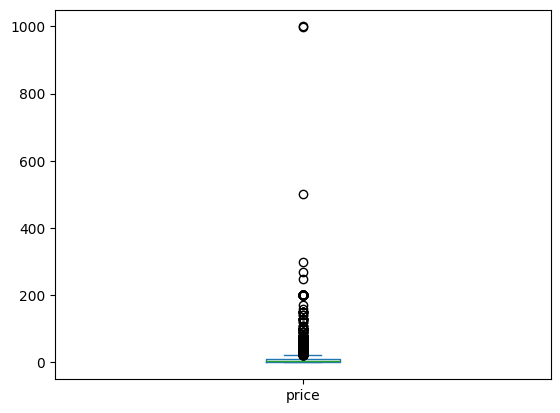

dlc_count


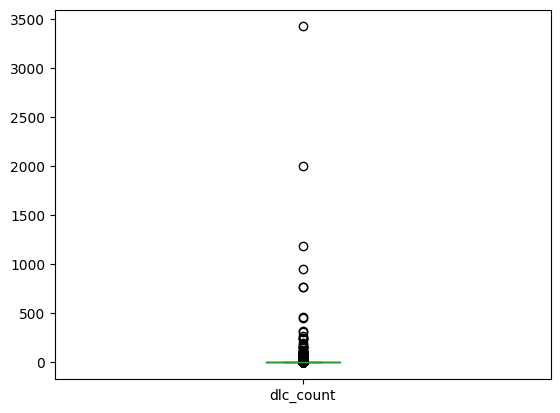

peak_ccu


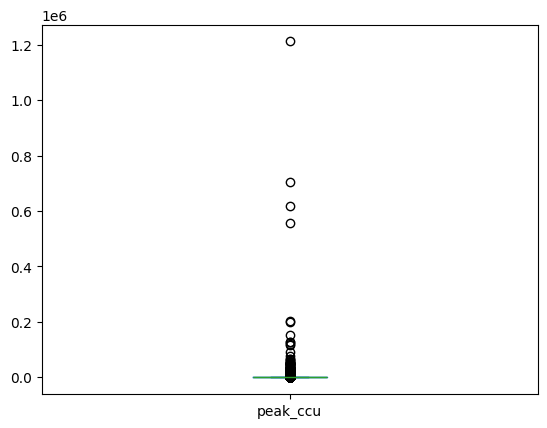

min_estimated_owners


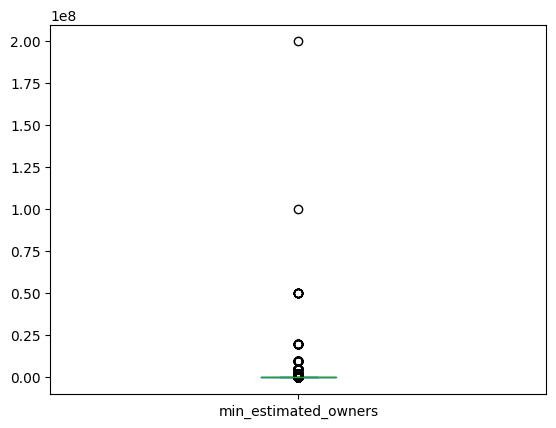

max_estimated_owners


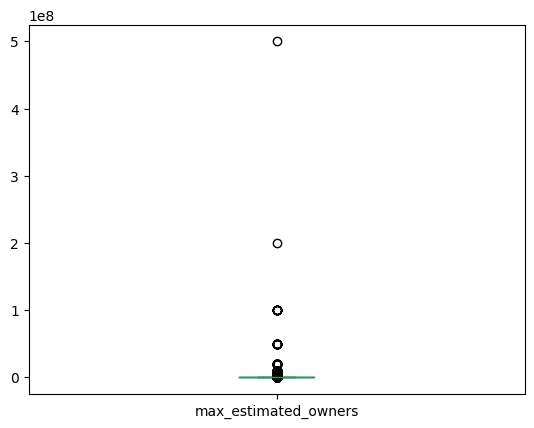

average_playtime_forever


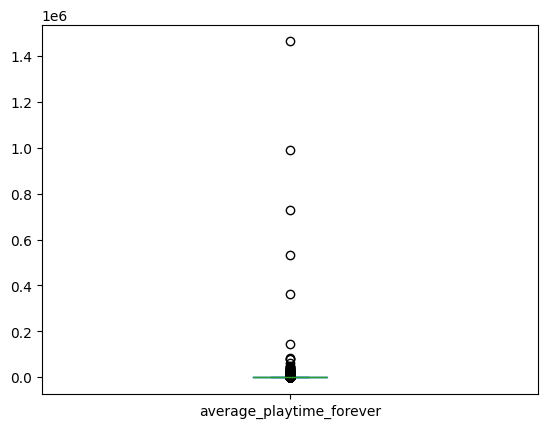

recommendations


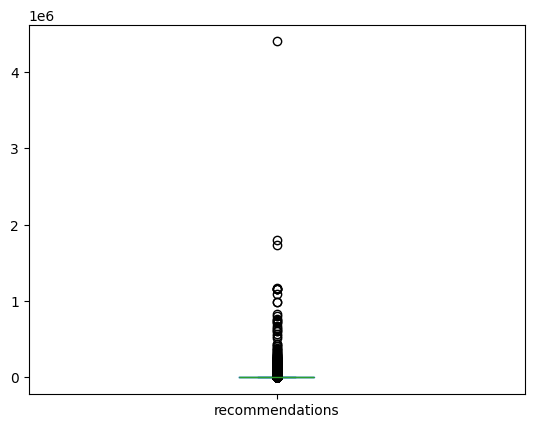

positive


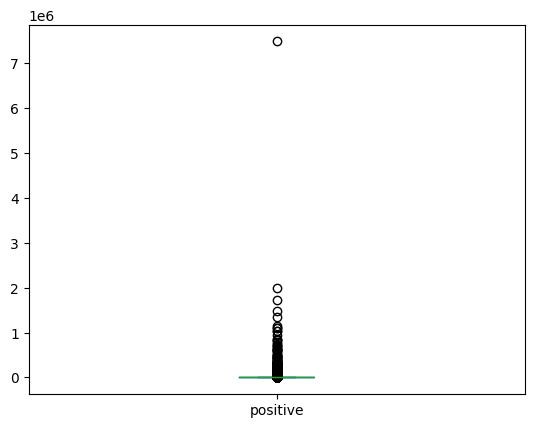

negative


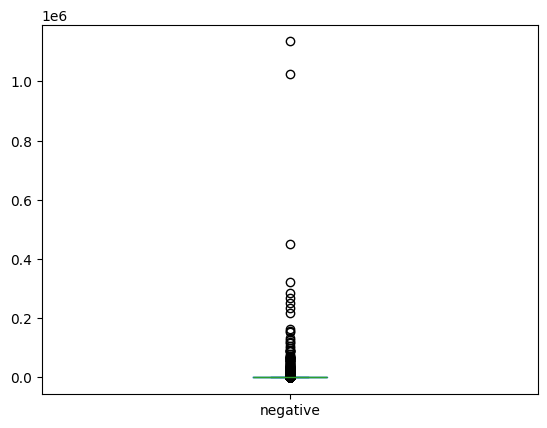

In [76]:
for column in outliers_columns:
  print(column)
  norm_dataset[column].plot(kind="box")
  plt.show()

In [77]:
def Obener_Outliers_IQR(df:pd.DataFrame, column:str) -> pd.Series:
  Q1 = np.percentile(df[column], 25)
  Q3 = np.percentile(df[column], 75)
  IQR = Q3 - Q1

  outliers = df[(df[column] < Q1 - 1.5*IQR) | (df[column] > Q3 + 1.5*IQR)]

  return outliers[column]

In [78]:
def Obtener_Outliers_Standar(df:pd.DataFrame, column:str, sigma:int=3) -> pd.Series:
  mean = df[column].mean()
  std_dev = df[column].std()

  if std_dev == 0:
    return pd.Series()

  z_scores = (df[column] - mean) / std_dev
  outliers = df[(z_scores.abs() > sigma)]

  return outliers[column]

In [79]:
for column in outliers_columns:
  print("-"*50)
  print("Nombre:", column)

  print("Según IQR:")
  outliers = Obener_Outliers_IQR(norm_dataset, column)

  print("Tamaño:", len(outliers))
  print("Outliers:\n", outliers)

  print("Según Normal Estandar:")
  outliers = Obtener_Outliers_Standar(norm_dataset, column, 2)

  print("Tamaño:", len(outliers))
  print("Outliers:\n", outliers)

--------------------------------------------------
Nombre: price
Según IQR:
Tamaño: 3812
Outliers:
 11        39.99
14        59.99
15        39.99
16        59.99
18        59.99
          ...  
72376    199.99
72396     99.99
72499     59.99
72520     24.99
72546     29.99
Name: price, Length: 3812, dtype: float64
Según Normal Estandar:
Tamaño: 1502
Outliers:
 11        39.99
14        59.99
15        39.99
16        59.99
18        59.99
          ...  
72092     39.99
72093     69.99
72376    199.99
72396     99.99
72499     59.99
Name: price, Length: 1502, dtype: float64
--------------------------------------------------
Nombre: dlc_count
Según IQR:
Tamaño: 12269
Outliers:
 0        1
2        2
4        9
5        9
6        9
        ..
72323    5
72363    1
72364    3
72394    3
72539    1
Name: dlc_count, Length: 12269, dtype: int64
Según Normal Estandar:
Tamaño: 136
Outliers:
 21        98
33        78
37        41
42        48
43        41
        ... 
67231    100
67309    

##Guardado

In [80]:
norm_dataset.fillna(".", inplace=True)

In [81]:
print(norm_dataset.columns, len(norm_dataset.columns))

Index(['index', 'release_date', 'required_age', 'price', 'dlc_count',
       'reviews', 'metacritic_score', 'achievements', 'recommendations',
       'publishers', 'positive', 'negative', 'average_playtime_forever',
       'average_playtime_2weeks', 'median_playtime_forever',
       'median_playtime_2weeks', 'discount', 'peak_ccu', 'release_year',
       'release_month', 'release_day', 'full_description', 'all_tags',
       'min_estimated_owners', 'max_estimated_owners',
       'porcentaje_positive_total', 'porcentaje_negative_total',
       'total_num_reviews'],
      dtype='object') 28


In [82]:
norm_dataset.head(3)

index release_date required_age  price  dlc_count  \
0      0   2012-08-21            E    0.0          1   
1      1   2017-12-21            E    0.0          0   
2      2   2013-07-09            E    0.0          2   

                                             reviews  metacritic_score  \
0                                                  .                 0   
1                                                  .                 0   
2  A modern multiplayer masterpiece Once you star...                90   

   achievements  recommendations         publishers  ...  release_year  \
0             1          4401572          ['Valve']  ...          2012   
1            37          1732007  ['KRAFTON, Inc.']  ...          2017   
2             0            14337          ['Valve']  ...          2013   

   release_month  release_day  \
0              8           21   
1             12           21   
2              7            9   

                                    full_description  \
0  For over two decades, Counter-Strike has offer...   
1  LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...   
2  The most-played game on Steam. Every day, mill...   

                                            all_tags  min_estimated_owners  \
0  ['Co-op', 'Military', 'War', 'Remote Play on T...             100000000   
1  ['Co-op', 'Survival', 'Difficult', 'Third-Pers...              50000000   
2  ['Co-op', 'SteamVR Collectibles', 'Steam Tradi...             200000000   

   max_estimated_owners  porcentaje_positive_total  porcentaje_negative_total  \
0             200000000                   0.868255                   0.131745   
1             100000000                   0.592247                   0.407753   
2             500000000                   0.815765                   0.184235   

   total_num_reviews  
0            8615921  
1            2512396  
2            2449800  

[3 rows x 28 columns]

In [83]:
norm_dataset.tail()

index release_date required_age  price  dlc_count reviews  \
72543  89494   2024-02-29            E   3.99          0       .   
72544  89495   2020-01-07            E  10.00          0       .   
72545  89496   2019-10-10            E   1.99          0       .   
72546  89497   2025-01-25            E  29.99          0       .   
72547  89498   2018-03-01            E   9.99          0       .   

       metacritic_score  achievements  recommendations  \
72543                 0             6                0   
72544                 0             0                0   
72545                 0             0                0   
72546                 0            34                0   
72547                 0            12                0   

                              publishers  ...  release_year  release_month  \
72543                        ['TheBean']  ...          2024              2   
72544  ['Orion Asistan Hizmetleri A.S.']  ...          2020              1   
72545                     ['Prime2Gold']  ...          2019             10   
72546                          ['XuJie']  ...          2025              1   
72547              ['Prime Time Studio']  ...          2018              3   

       release_day                                   full_description  \
72543           29  The name of the game is literally the game. Ou...   
72544            7  Briefly: Lands of Pharaoh is a third person vi...   
72545           10  Player One is a new 3D game where you take con...   
72546           25      This is an open world game on 3D, also a m...   
72547            1  Ragtag Adventurers is a Boss Rush game that pi...   

                                                all_tags  \
72543  ['Indie', 'Survival', '2D Platformer', 'Steam ...   
72544  ['Action', 'Indie', 'Single-player', 'Adventur...   
72545  ['Family Sharing', 'Indie', 'Single-player', '...   
72546  ['Co-op', 'Captions available', 'Combat', 'Ope...   
72547  ['Co-op', 'Action', 'Full controller support',...   

       min_estimated_owners  max_estimated_owners  porcentaje_positive_total  \
72543                     0                 20000                   1.000000   
72544                     0                 20000                   1.000000   
72545                     0                 20000                   0.666667   
72546                     0                 20000                   1.000000   
72547                     0                 20000                   0.666667   

       porcentaje_negative_total  total_num_reviews  
72543                   0.000000                  2  
72544                   0.000000                  2  
72545                   0.333333                  3  
72546                   0.000000                  2  
72547                   0.333333                 12  

[5 rows x 28 columns]

In [84]:
norm_dataset.to_csv("/content/drive/MyDrive/AyVD Proyecto/normalized_dataset.csv", index=False)

#EDA

In [85]:
numerical_columns = norm_dataset.select_dtypes(include=[np.number]).columns
categorical_columns = norm_dataset.select_dtypes(exclude=[np.number]).columns

In [86]:
print(numerical_columns, len(numerical_columns))
print(categorical_columns, len(categorical_columns))

Index(['index', 'price', 'dlc_count', 'metacritic_score', 'achievements',
       'recommendations', 'positive', 'negative', 'average_playtime_forever',
       'average_playtime_2weeks', 'median_playtime_forever',
       'median_playtime_2weeks', 'discount', 'peak_ccu', 'release_year',
       'release_month', 'release_day', 'min_estimated_owners',
       'max_estimated_owners', 'porcentaje_positive_total',
       'porcentaje_negative_total', 'total_num_reviews'],
      dtype='object') 22
Index(['release_date', 'required_age', 'reviews', 'publishers',
       'full_description', 'all_tags'],
      dtype='object') 6


In [87]:
dataset_special = norm_dataset[numerical_columns]

In [88]:
num_cols_total = len(dataset_special.columns)
num_cols_total

22

In [89]:
scaler = skl.preprocessing.StandardScaler()
dataset_special[numerical_columns] = scaler.fit_transform(dataset_special[numerical_columns])

/tmp/ipython-input-1939158065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_special[numerical_columns] = scaler.fit_transform(dataset_special[numerical_columns])


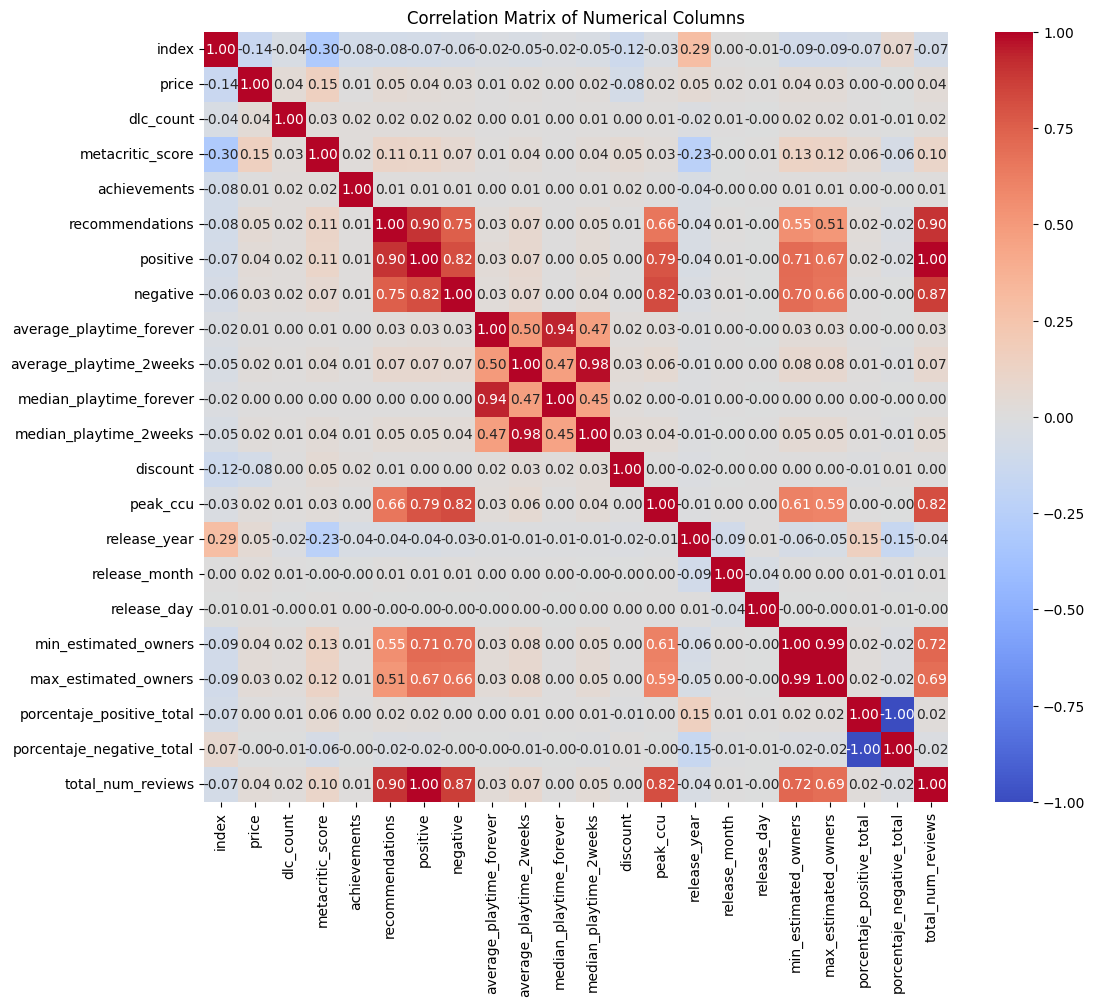

In [90]:
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(dataset_special.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

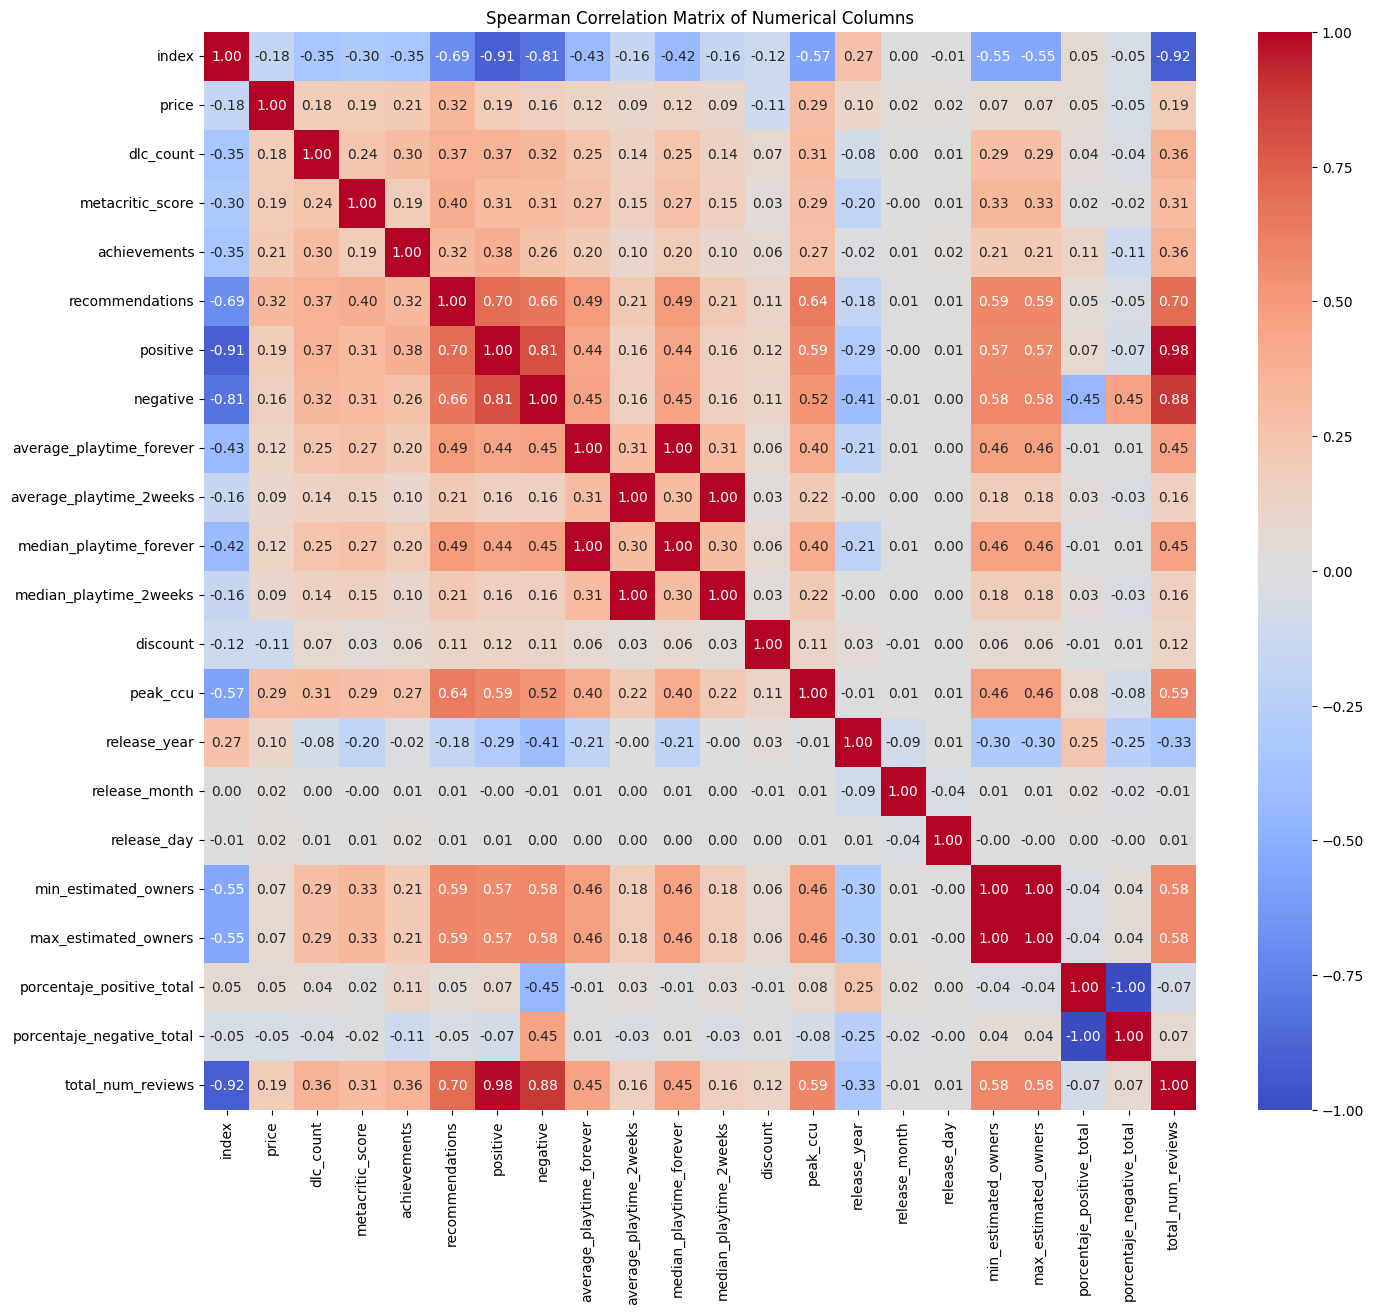

In [91]:
spearman_corr_matrix = norm_dataset[numerical_columns].corr(method='spearman')

plt.figure(figsize=(16, 14))
sns.heatmap(spearman_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Spearman Correlation Matrix of Numerical Columns')
plt.show()

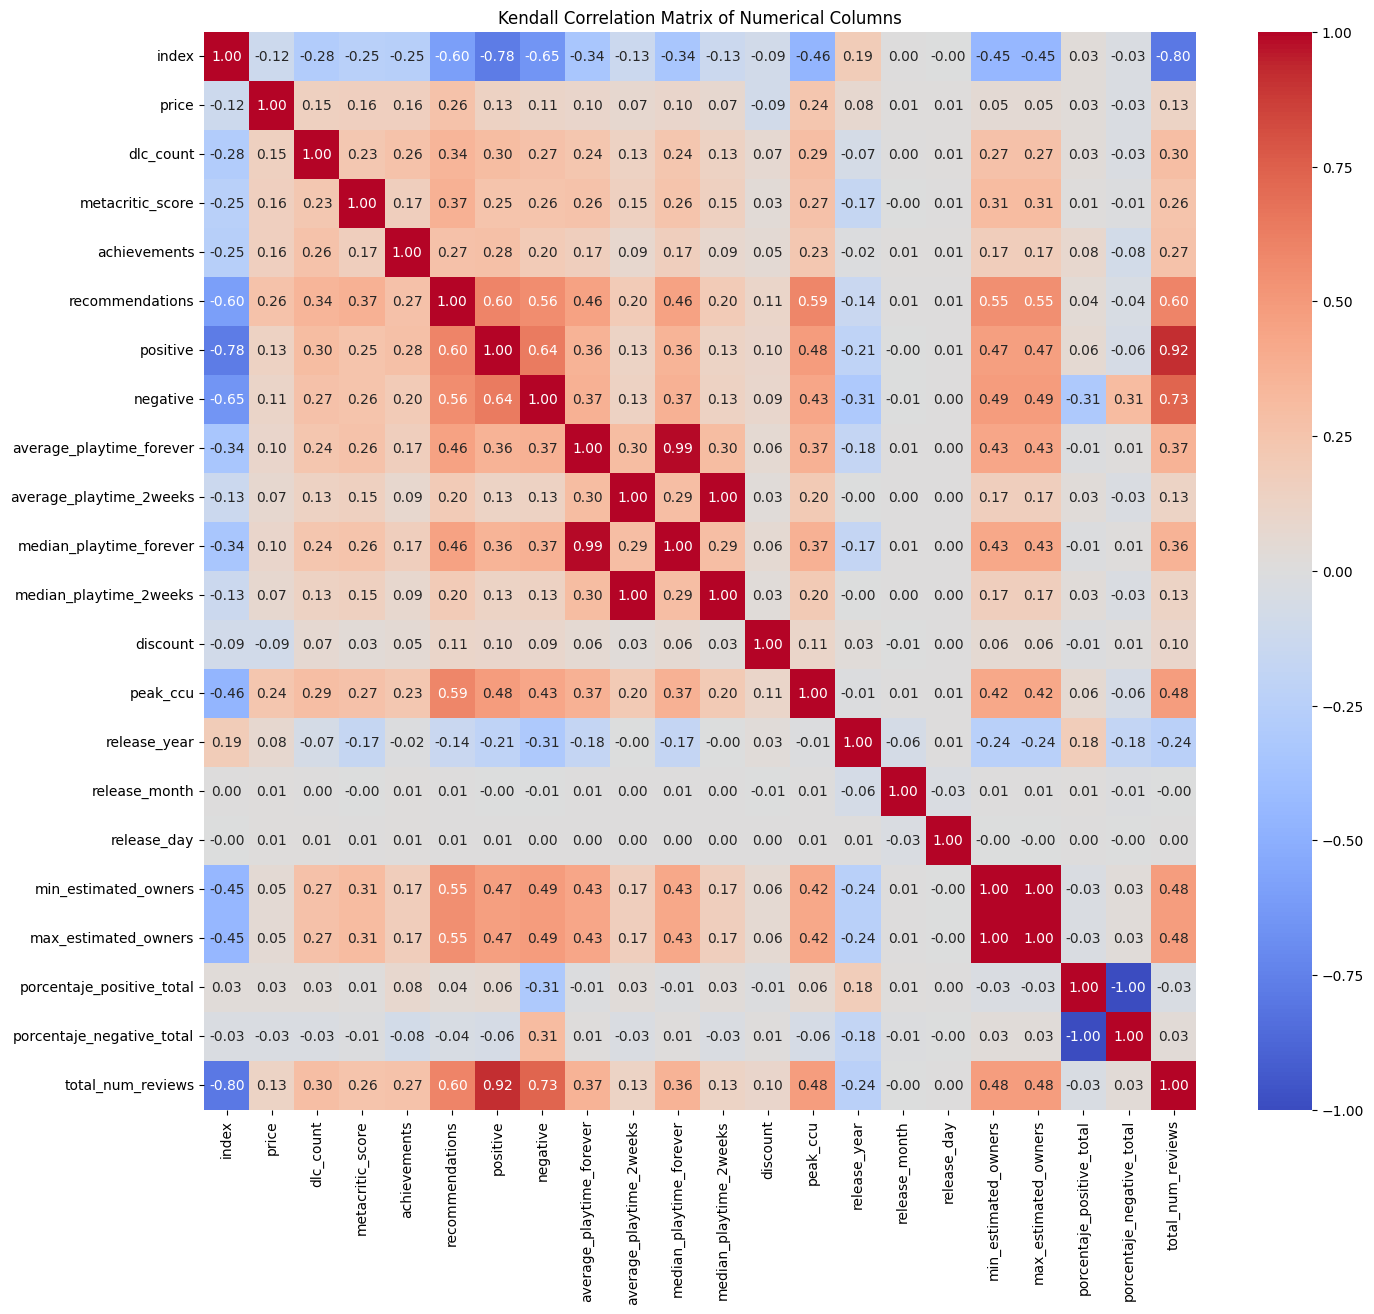

In [92]:
kendall_corr_matrix = norm_dataset[numerical_columns].corr(method='kendall')

plt.figure(figsize=(16, 14))
sns.heatmap(kendall_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Kendall Correlation Matrix of Numerical Columns')
plt.show()

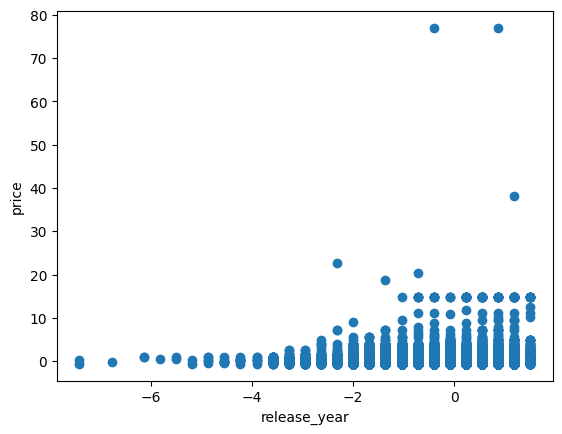

In [93]:
plt.scatter(dataset_special["release_year"], dataset_special["price"])
plt.xlabel("release_year")
plt.ylabel("price")
plt.show()

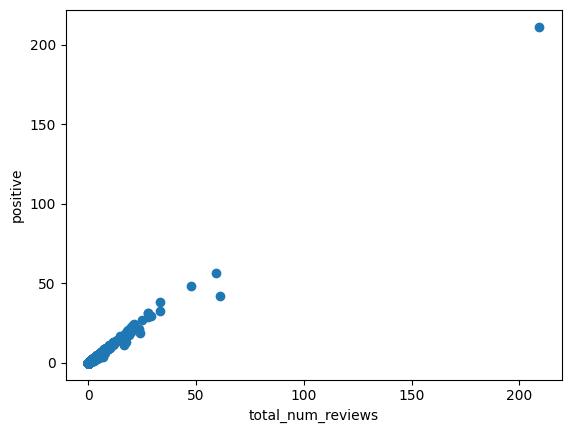

In [94]:
plt.scatter(dataset_special["total_num_reviews"], dataset_special["positive"])
plt.xlabel("total_num_reviews")
plt.ylabel("positive")
plt.show()

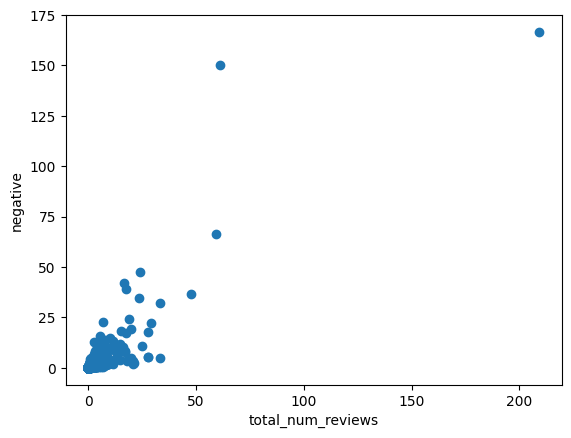

In [95]:
plt.scatter(dataset_special["total_num_reviews"], dataset_special["negative"])
plt.xlabel("total_num_reviews")
plt.ylabel("negative")
plt.show()

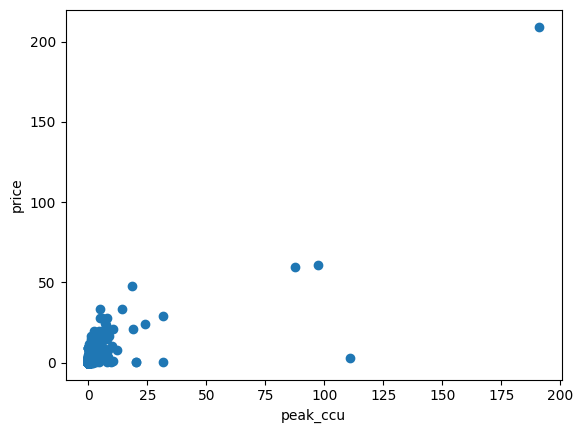

In [96]:
plt.scatter(dataset_special["peak_ccu"], dataset_special["total_num_reviews"])
plt.xlabel("peak_ccu")
plt.ylabel("price")
plt.show()

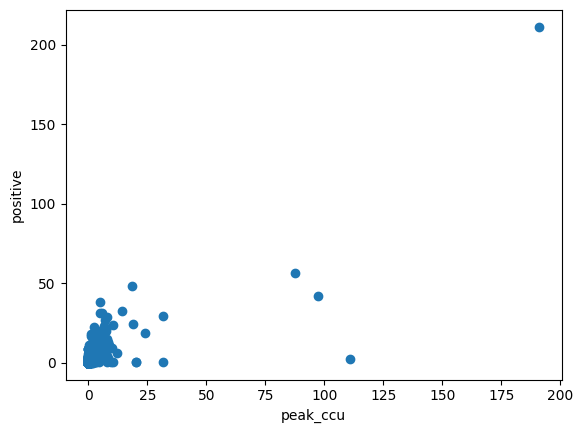

In [97]:
plt.scatter(dataset_special["peak_ccu"], dataset_special["positive"])
plt.xlabel("peak_ccu")
plt.ylabel("positive")
plt.show()

#Gráficas de "Required Age"

/tmp/ipython-input-3166723617.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="required_age", data=norm_dataset, palette="viridis")


Text(0.5, 1.0, 'Count of Games by Required Age')

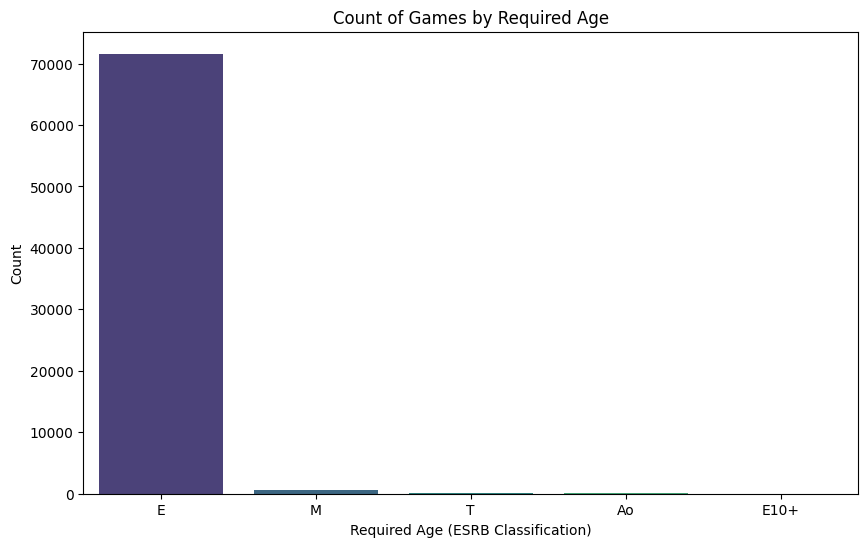

In [98]:
plt.figure(figsize=(10, 6))
sns.countplot(x="required_age", data=norm_dataset, palette="viridis")
plt.xlabel("Required Age (ESRB Classification)")
plt.ylabel("Count")
plt.title("Count of Games by Required Age")

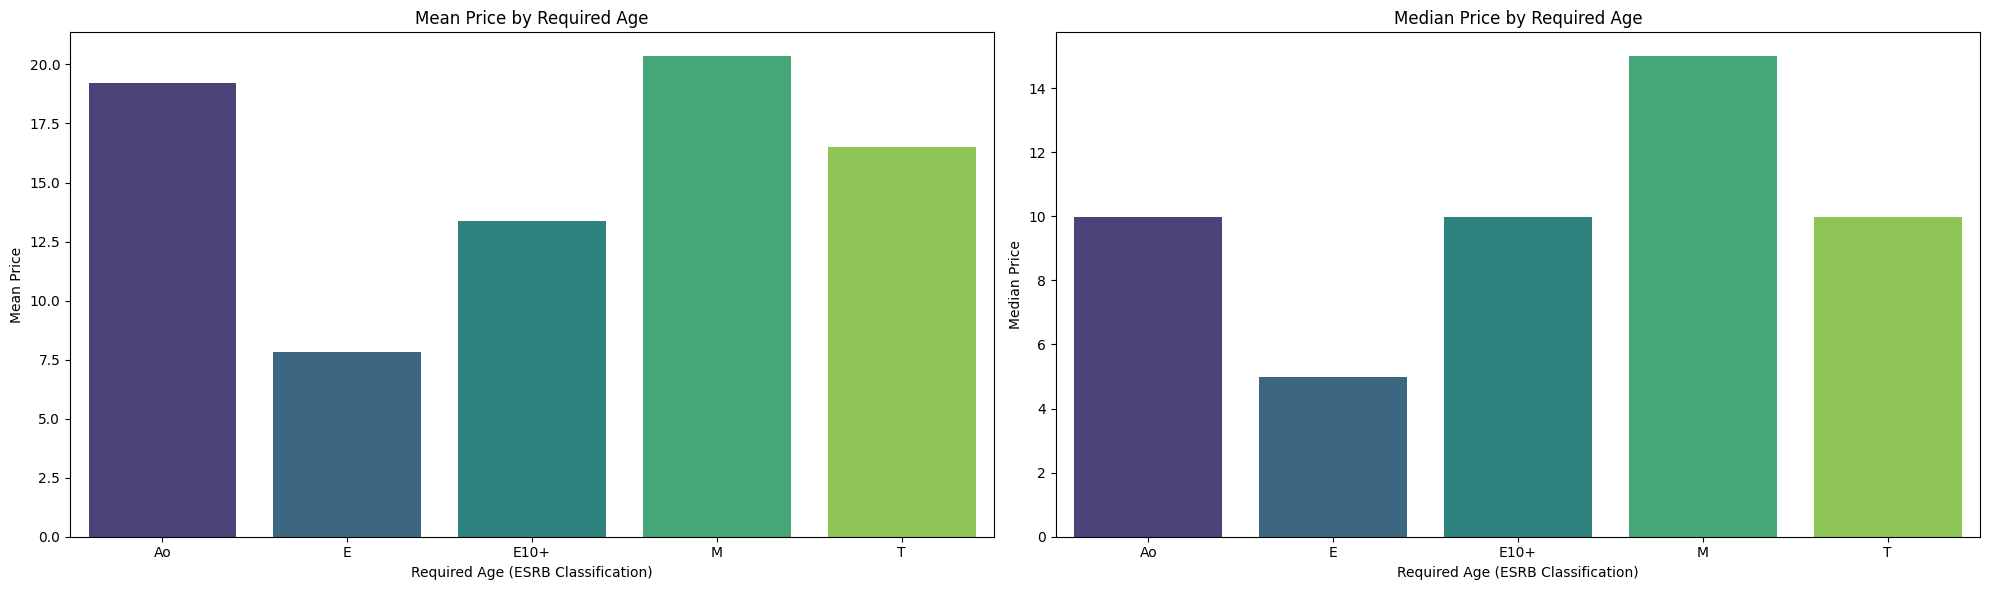

In [99]:
avg_price_by_age = norm_dataset.groupby("required_age")["price"].mean().reset_index()
med_price_by_age = norm_dataset.groupby("required_age")["price"].median().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.barplot(x="required_age", y="price", data=avg_price_by_age, palette="viridis", hue="required_age", legend=False, ax=axes[0])
axes[0].set_xlabel("Required Age (ESRB Classification)")
axes[0].set_ylabel("Mean Price")
axes[0].set_title("Mean Price by Required Age")

sns.barplot(x="required_age", y="price", data=med_price_by_age, palette="viridis", hue="required_age", legend=False, ax=axes[1])
axes[1].set_xlabel("Required Age (ESRB Classification)")
axes[1].set_ylabel("Median Price")
axes[1].set_title("Median Price by Required Age")

plt.tight_layout()
plt.show()

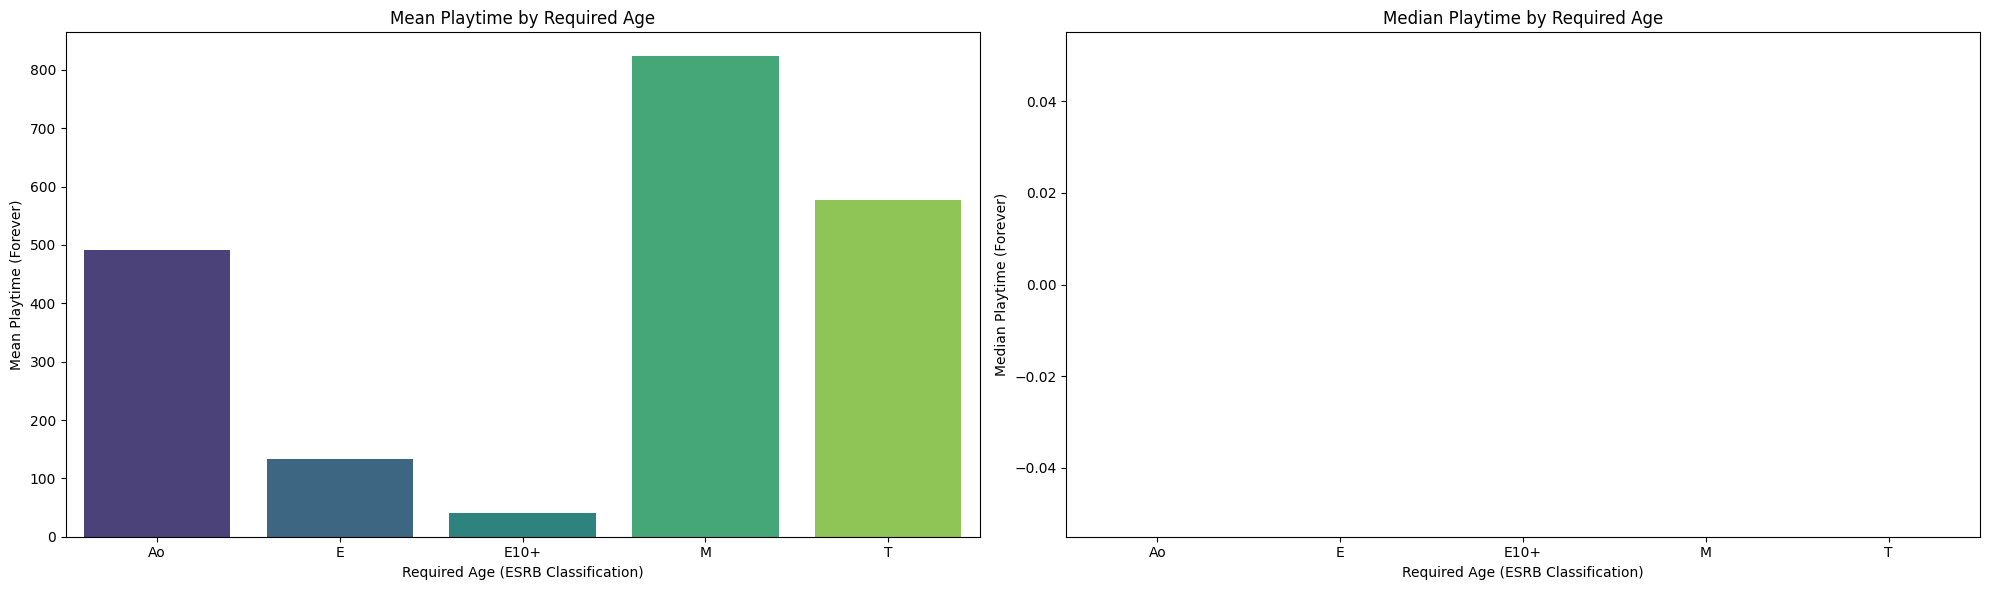

In [100]:
avg_playtime_forever_by_age = norm_dataset.groupby("required_age")["average_playtime_forever"].mean().reset_index()
med_playtime_forever_by_age = norm_dataset.groupby("required_age")["average_playtime_forever"].median().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.barplot(x="required_age", y="average_playtime_forever", data=avg_playtime_forever_by_age, palette="viridis", hue="required_age", legend=False, ax=axes[0])
axes[0].set_xlabel("Required Age (ESRB Classification)")
axes[0].set_ylabel("Mean Playtime (Forever)")
axes[0].set_title("Mean Playtime by Required Age")

sns.barplot(x="required_age", y="average_playtime_forever", data=med_playtime_forever_by_age, palette="viridis", hue="required_age", legend=False, ax=axes[1])
axes[1].set_xlabel("Required Age (ESRB Classification)")
axes[1].set_ylabel("Median Playtime (Forever)")
axes[1].set_title("Median Playtime by Required Age")

plt.tight_layout()
plt.show()

In [101]:
display(med_playtime_forever_by_age)

required_age  average_playtime_forever
0           Ao                       0.0
1            E                       0.0
2         E10+                       0.0
3            M                       0.0
4            T                       0.0

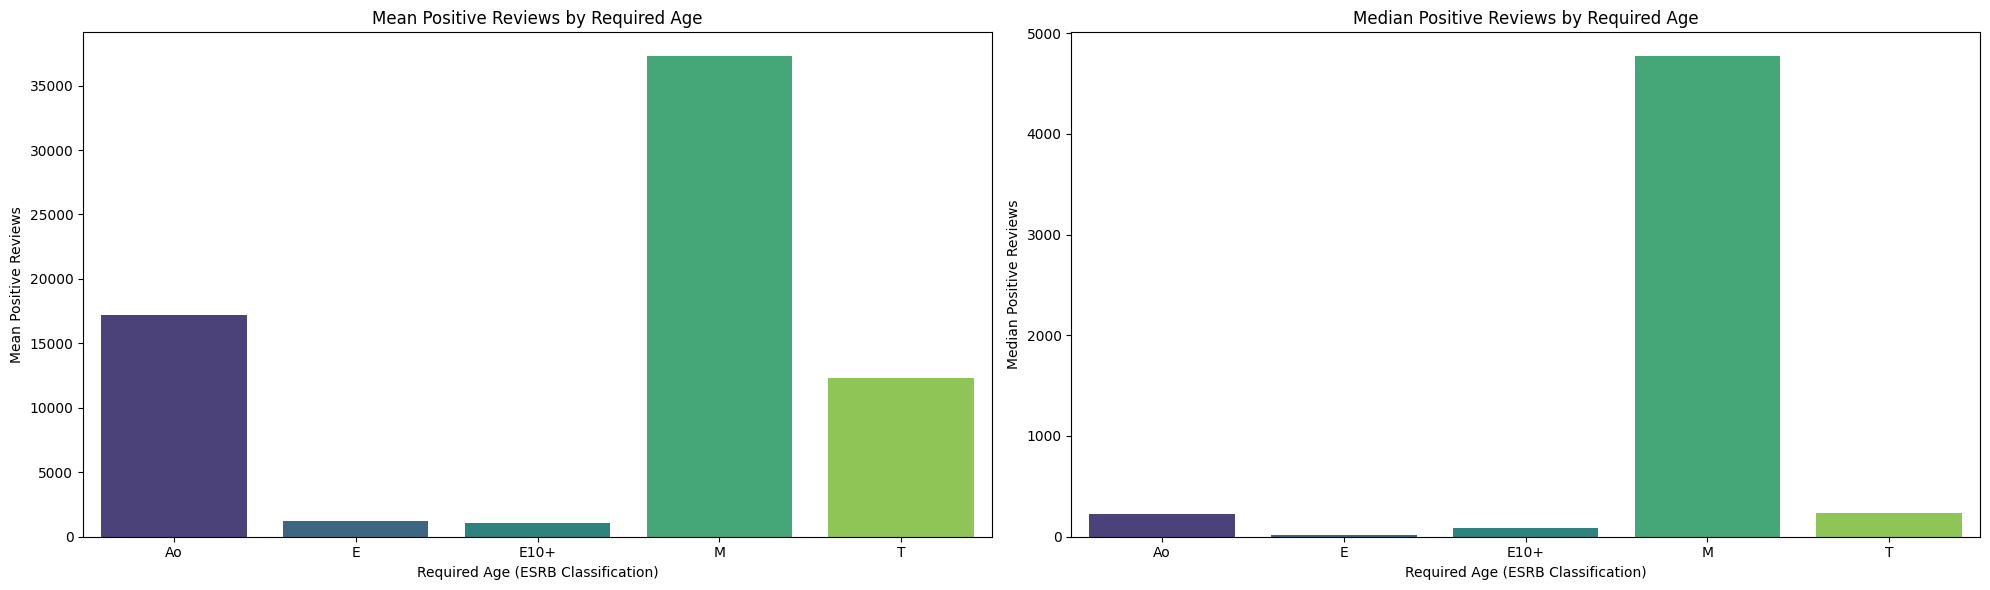

In [102]:
avg_positive_by_age = norm_dataset.groupby("required_age")["positive"].mean().reset_index()
med_positive_by_age = norm_dataset.groupby("required_age")["positive"].median().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.barplot(x="required_age", y="positive", data=avg_positive_by_age, palette="viridis", hue="required_age", legend=False, ax=axes[0])
axes[0].set_xlabel("Required Age (ESRB Classification)")
axes[0].set_ylabel("Mean Positive Reviews")
axes[0].set_title("Mean Positive Reviews by Required Age")

sns.barplot(x="required_age", y="positive", data=med_positive_by_age, palette="viridis", hue="required_age", legend=False, ax=axes[1])
axes[1].set_xlabel("Required Age (ESRB Classification)")
axes[1].set_ylabel("Median Positive Reviews")
axes[1].set_title("Median Positive Reviews by Required Age")

plt.tight_layout()
plt.show()

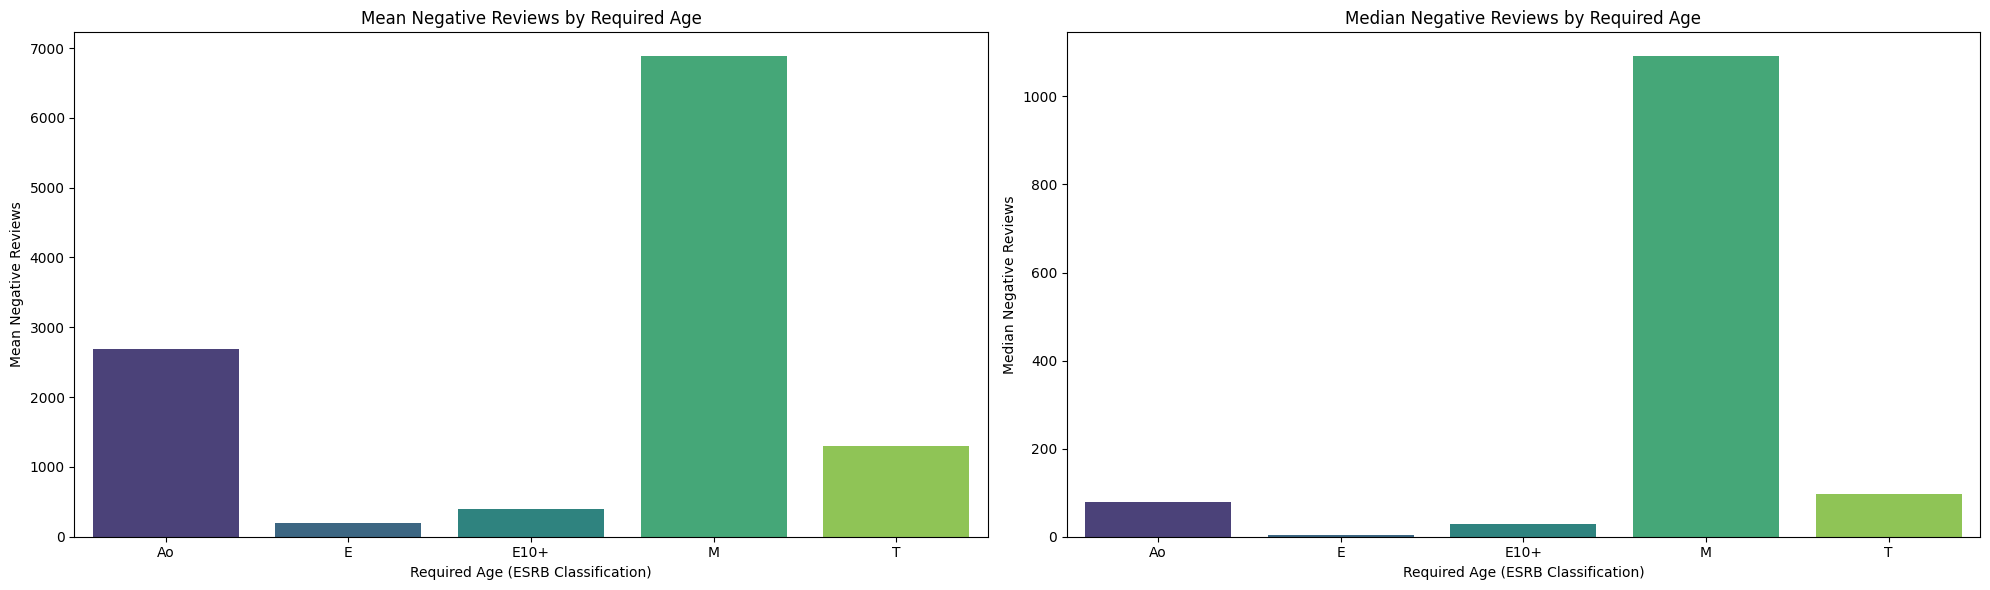

In [103]:
avg_negative_by_age = norm_dataset.groupby("required_age")["negative"].mean().reset_index()
med_negative_by_age = norm_dataset.groupby("required_age")["negative"].median().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.barplot(x="required_age", y="negative", data=avg_negative_by_age, palette="viridis", hue="required_age", legend=False, ax=axes[0])
axes[0].set_xlabel("Required Age (ESRB Classification)")
axes[0].set_ylabel("Mean Negative Reviews")
axes[0].set_title("Mean Negative Reviews by Required Age")

sns.barplot(x="required_age", y="negative", data=med_negative_by_age, palette="viridis", hue="required_age", legend=False, ax=axes[1])
axes[1].set_xlabel("Required Age (ESRB Classification)")
axes[1].set_ylabel("Median Negative Reviews")
axes[1].set_title("Median Negative Reviews by Required Age")

plt.tight_layout()
plt.show()

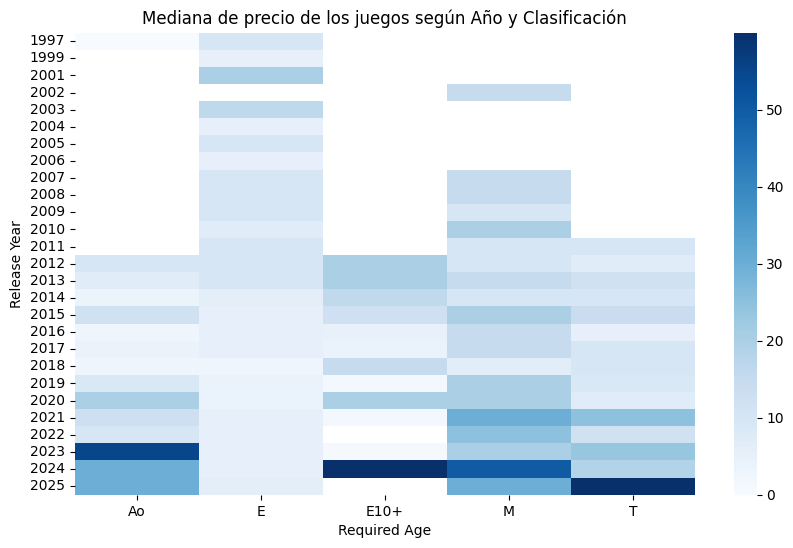

In [104]:
tabla = (norm_dataset.groupby(['release_year', 'required_age'])['price'].median().unstack())

plt.figure(figsize=(10, 6))
sns.heatmap(tabla, cmap="Blues")
plt.title("Mediana de precio de los juegos según Año y Clasificación")
plt.xlabel("Required Age")
plt.ylabel("Release Year")
plt.show()


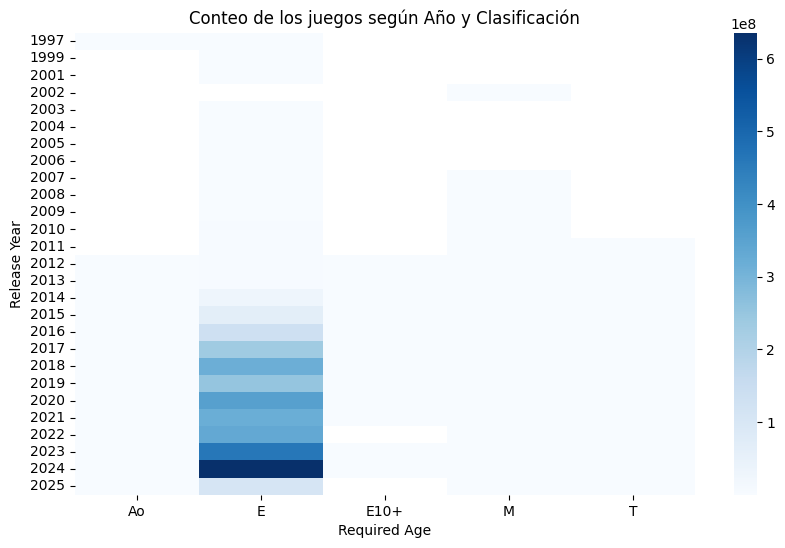

In [105]:
tabla = (norm_dataset.groupby(['release_year', 'required_age'])['index'].sum().unstack())

plt.figure(figsize=(10, 6))
sns.heatmap(tabla, cmap="Blues")
plt.title("Conteo de los juegos según Año y Clasificación")
plt.xlabel("Required Age")
plt.ylabel("Release Year")
plt.show()

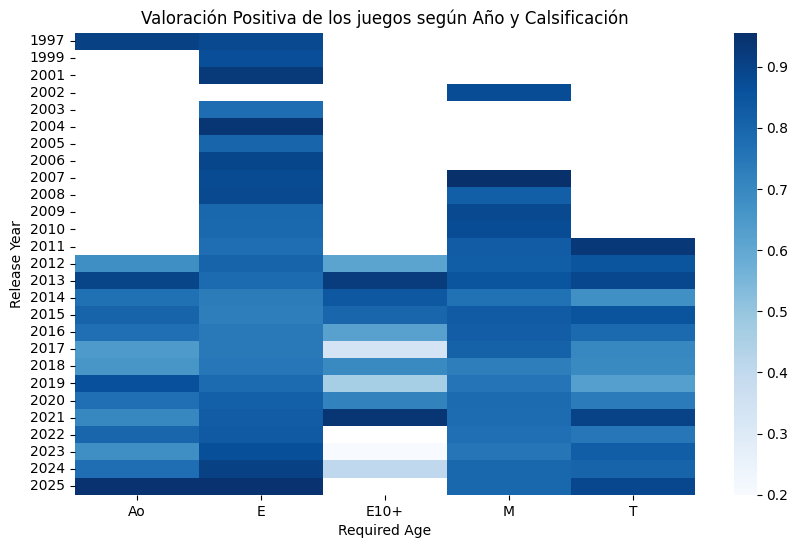

In [106]:
tabla = (norm_dataset.groupby(['release_year', 'required_age'])['porcentaje_positive_total'].median().unstack())

plt.figure(figsize=(10, 6))
sns.heatmap(tabla, cmap="Blues")
plt.title("Valoración Positiva de los juegos según Año y Calsificación")
plt.xlabel("Required Age")
plt.ylabel("Release Year")
plt.show()

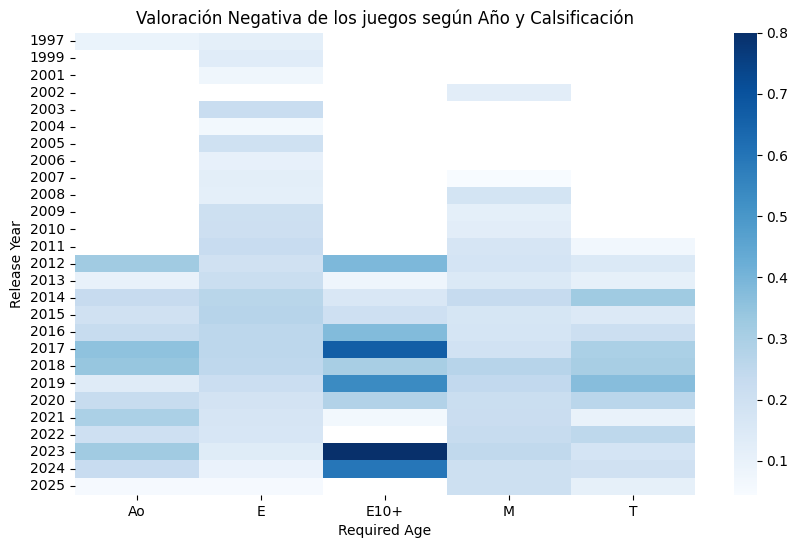

In [107]:
tabla = (norm_dataset.groupby(['release_year', 'required_age'])['porcentaje_negative_total'].median().unstack())

plt.figure(figsize=(10, 6))
sns.heatmap(tabla, cmap="Blues")
plt.title("Valoración Negativa de los juegos según Año y Calsificación")
plt.xlabel("Required Age")
plt.ylabel("Release Year")
plt.show()

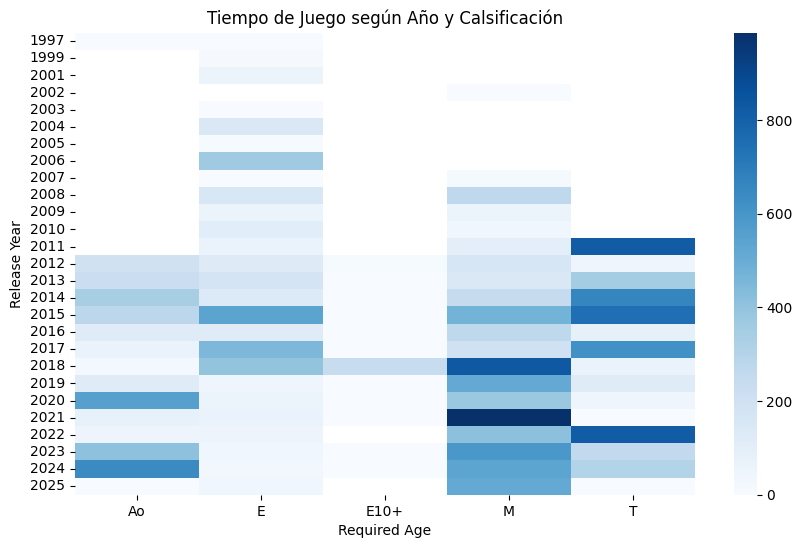

In [108]:
tabla = (norm_dataset.groupby(['release_year', 'required_age'])['median_playtime_forever'].mean().unstack())

plt.figure(figsize=(10, 6))
sns.heatmap(tabla, cmap="Blues")
plt.title("Tiempo de Juego según Año y Calsificación")
plt.xlabel("Required Age")
plt.ylabel("Release Year")
plt.show()

#Análizis NLP para TAGs y Reviews para Positividad

In [109]:
nlp_core = sp.load("en_core_web_sm")

In [110]:
norm_dataset.columns

Index(['index', 'release_date', 'required_age', 'price', 'dlc_count',
       'reviews', 'metacritic_score', 'achievements', 'recommendations',
       'publishers', 'positive', 'negative', 'average_playtime_forever',
       'average_playtime_2weeks', 'median_playtime_forever',
       'median_playtime_2weeks', 'discount', 'peak_ccu', 'release_year',
       'release_month', 'release_day', 'full_description', 'all_tags',
       'min_estimated_owners', 'max_estimated_owners',
       'porcentaje_positive_total', 'porcentaje_negative_total',
       'total_num_reviews'],
      dtype='object')

In [111]:
NLP_dataset = norm_dataset[["all_tags", "reviews", "porcentaje_positive_total"]]

In [112]:
NLP_dataset = NLP_dataset[NLP_dataset["reviews"] != "."]

In [113]:
STEAM_SLANG = {
    # Calidad
    "op", "broken", "trash", "garbage", "masterpiece",
    "amazing", "awesome", "terrible", "mediocre",
    "solid", "meh", "peak", "mid",

    # Balance
    "nerf", "buff", "overpowered", "underpowered",
    "unbalanced", "balanced", "meta", "cheese",
    "exploit", "abusable",

    # Jugabilidad
    "grindy", "grind", "repetitive", "addictive",
    "boring", "tedious", "fun", "engaging",
    "satisfying", "clunky",

    # Monetización
    "pay2win", "p2w", "f2p", "free2play",
    "overpriced", "cheap", "worth", "worthit",
    "scam", "cashgrab", "microtransactions",
    "mtx", "dlc",

    # Técnico
    "buggy", "bugs", "glitchy", "glitches",
    "laggy", "lag", "crashes", "crash",
    "unplayable", "optimized", "optimization",

    # Online
    "dead", "alive", "toxic", "friendly",
    "matchmaking", "queue", "servers",
    "desync", "ping",

    # Desarrollo
    "abandoned", "updated", "updates",
    "patch", "patched", "devs", "developers",
    "support", "roadmap", "earlyaccess"
}

In [114]:
def normalize_review(texts, keep_pos={"NOUN", "VERB", "ADJ", "PROPN"}):
  normalized_texts = []

  for text in texts:
    doc = nlp_core(text)
    tokens = []

    for token in doc:
      if token.is_punct or token.is_space or token.like_num:
        continue

      raw = token.text.lower()
      lemma = token.lemma_.lower()

      if raw in STEAM_SLANG or lemma in STEAM_SLANG:
        tokens.append(raw)
        continue

      if token.pos_ == "PRON":
        continue

      if token.pos_ in keep_pos:
        tokens.append(lemma)

    normalized_texts.append(tokens)

  return normalized_texts

In [115]:
NLP_dataset["reviews"] = normalize_review(NLP_dataset["reviews"])

In [116]:
NLP_dataset.head(3)

all_tags  \
2   ['Co-op', 'SteamVR Collectibles', 'Steam Tradi...   
11  ['Co-op', 'Crafting', 'Open World', 'Indie', '...   
12  ['Co-op', 'Captions available', 'Indie', 'Expl...   

                                              reviews  \
2   [modern, multiplayer, masterpiece, start, lear...   
11  [rust, cruel, game, steam, people, kill, sight...   
12  [bring, silly, glee, unbridle, experimentation...   

    porcentaje_positive_total  
2                    0.815765  
11                   0.872680  
12                   0.967880

In [117]:
NLP_dataset["porcentaje_positive_total"].median()

0.8409090909090909

In [118]:
norm_dataset["porcentaje_positive_total"].mean()

np.float64(0.7540261921771474)

In [119]:
len(norm_dataset[norm_dataset["porcentaje_positive_total"] > 0.50])

61344

In [120]:
conditions = [
    NLP_dataset["porcentaje_positive_total"] < 0.50,
    (NLP_dataset["porcentaje_positive_total"] >= 0.50) & (NLP_dataset["porcentaje_positive_total"] < 0.85),
    NLP_dataset["porcentaje_positive_total"] >= 0.85
]

In [121]:
choices = [0, 1, 2]

In [122]:
NLP_dataset["user_rating"] = np.select(conditions, choices)

In [123]:
NLP_dataset[["porcentaje_positive_total", "user_rating"]]

porcentaje_positive_total  user_rating
2                       0.815765            1
11                      0.872680            2
12                      0.967880            2
13                      0.671900            1
15                      0.961149            2
...                          ...          ...
72305                   1.000000            2
72319                   1.000000            2
72320                   0.600000            1
72471                   0.400000            0
72528                   0.250000            0

[9609 rows x 2 columns]

In [124]:
NLP_dataset["user_rating"].value_counts()

user_rating
1    4608
2    4577
0     424
Name: count, dtype: int64

In [125]:
nlp_core = sp.load("en_core_web_sm")

In [126]:
x_train, x_test, y_train, y_test = skl.model_selection.train_test_split(
    NLP_dataset[["reviews", "all_tags"]],
    NLP_dataset["user_rating"],
    test_size=0.2, random_state=42,
    stratify=NLP_dataset["user_rating"])

In [127]:
x_train.head(3)

reviews  \
57652  [world, full, exploration, music, danger, awai...   
37043  [tough, challenging, way, make, think, impossi...   
42701  [build, educational, tool, hololab, champions,...   

                                                all_tags  
57652  ['Action', 'Indie', 'Single-player', 'Partial ...  
37043  ['Shooter', 'Top-Down', 'Action', 'Sci-fi', 'M...  
42701  ['Exploration', 'Science', 'Cartoony', 'Logic'...

##Reviews

###Binary

In [128]:
vectorizer = skl.feature_extraction.text.CountVectorizer(binary=True)

In [129]:
x_train_binary_reviews = vectorizer.fit_transform(x_train["reviews"].apply(lambda x: " ".join(x)))
x_test_binary_reviews = vectorizer.transform(x_test["reviews"].apply(lambda x: " ".join(x)))

In [130]:
model = skl.linear_model.LogisticRegression(max_iter=5000, penalty="l2", C=100)
model.fit(x_train_binary_reviews, y_train)

LogisticRegression(C=100, max_iter=5000)

In [131]:
y_pred = model.predict(x_test_binary_reviews)

In [132]:
accuracy = skl.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = skl.metrics.confusion_matrix(y_test, y_pred)
classification_report = skl.metrics.classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix)
print("Classification Report:\n", classification_report)

Accuracy: 0.5020811654526535
Confusion Matrix:
 [[  3  41  41]
 [ 35 479 408]
 [ 26 406 483]]
Classification Report:
               precision    recall  f1-score   support

           0       0.05      0.04      0.04        85
           1       0.52      0.52      0.52       922
           2       0.52      0.53      0.52       915

    accuracy                           0.50      1922
   macro avg       0.36      0.36      0.36      1922
weighted avg       0.50      0.50      0.50      1922



In [133]:
feature_names = vectorizer.get_feature_names_out()
weights = model.coef_[0]

In [134]:
top_pos = sorted(
    zip(feature_names, weights),
    key=lambda x: x[1],
    reverse=True
)[:20]

In [135]:
top_neg = sorted(
    zip(feature_names, weights),
    key=lambda x: x[1]
)[:20]

In [136]:
print(top_pos)

[('capital', np.float64(5.5456245125052295)), ('skew', np.float64(5.167918162421922)), ('grimm', np.float64(5.131986352028884)), ('distinguish', np.float64(4.976239328269611)), ('deadlock', np.float64(4.936260126087525)), ('reggae', np.float64(4.652546956547936)), ('tongue', np.float64(4.537656649069252)), ('trek', np.float64(4.45864877453295)), ('toy', np.float64(4.4363800705991805)), ('carefree', np.float64(4.39068505390044)), ('bzb', np.float64(4.2821478977615755)), ('cosmonautica', np.float64(4.244774009801921)), ('salvage', np.float64(4.213392477766882)), ('lol', np.float64(4.161633957003631)), ('evolution', np.float64(4.156213273123264)), ('describe', np.float64(4.153247929106119)), ('uriel', np.float64(4.116961395761895)), ('effort', np.float64(4.089248455662501)), ('lock', np.float64(4.02912968216139)), ('armada', np.float64(3.9794196469642773))]


In [137]:
print(top_neg)

[('treat', np.float64(-4.6499317850184365)), ('platform', np.float64(-4.154606267330225)), ('jrpg', np.float64(-3.8921707511526438)), ('essence', np.float64(-3.720372054870805)), ('essential', np.float64(-3.5611970606603727)), ('board', np.float64(-3.402895942565404)), ('tidal', np.float64(-3.203301200309633)), ('stunning', np.float64(-3.1259817260099245)), ('satisfying', np.float64(-3.1002940505382677)), ('roguelike', np.float64(-3.0445325237546372)), ('age', np.float64(-3.0052220770341864)), ('aren', np.float64(-3.002105142437469)), ('horror', np.float64(-2.9897081858095147)), ('excellence', np.float64(-2.9764144324667687)), ('ultimate', np.float64(-2.9371738677047343)), ('series', np.float64(-2.839641015635426)), ('gesture', np.float64(-2.814897130172671)), ('badass', np.float64(-2.7877437533393055)), ('refreshing', np.float64(-2.7838040114737463)), ('content', np.float64(-2.7812667437730876))]


In [138]:
pos_dict = dict(top_pos)
neg_dict = {w: abs(v) for w, v in top_neg}

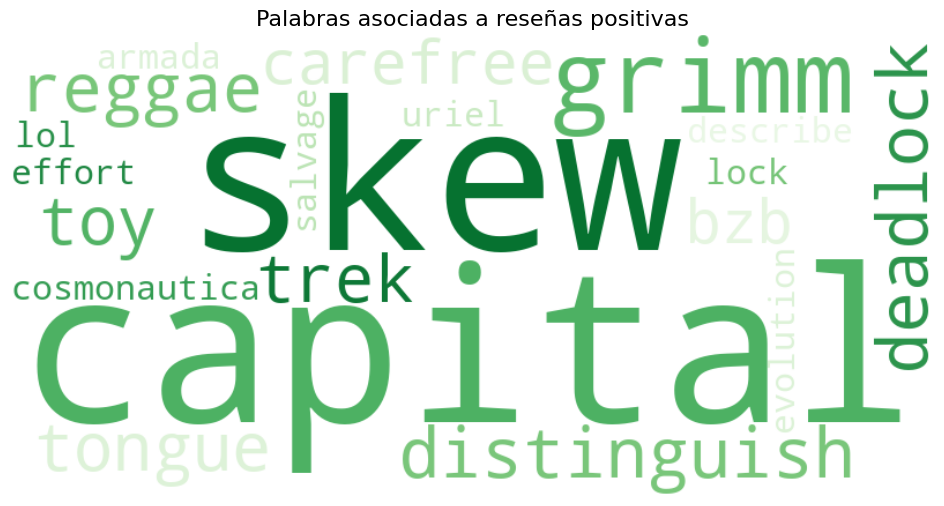

In [139]:
wc_pos = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='Greens',
    max_words=50
).generate_from_frequencies(pos_dict)

plt.figure(figsize=(12, 6))
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras asociadas a reseñas positivas', fontsize=16)
plt.show()

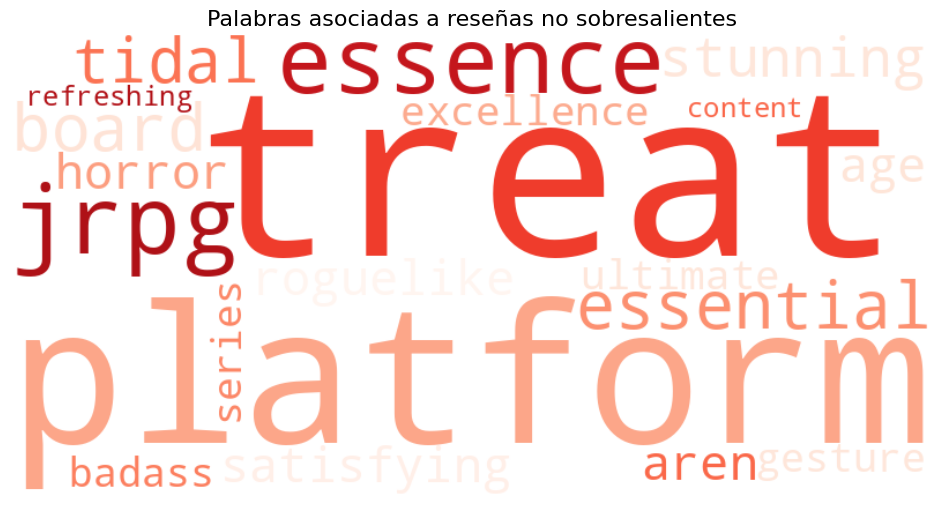

In [140]:
wc_neg = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='Reds',
    max_words=50
).generate_from_frequencies(neg_dict)

plt.figure(figsize=(12, 6))
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras asociadas a reseñas no sobresalientes', fontsize=16)
plt.show()

###Frequency

In [141]:
vectorizer = skl.feature_extraction.text.CountVectorizer(binary=False)

In [142]:
x_train_freq_reviews = vectorizer.fit_transform(x_train["reviews"].apply(lambda x: " ".join(x)))
x_test_freq_reviews = vectorizer.transform(x_test["reviews"].apply(lambda x: " ".join(x)))

In [143]:
model = skl.linear_model.LogisticRegression(max_iter=5000, penalty="l2", C=100)
model.fit(x_train_freq_reviews, y_train)

LogisticRegression(C=100, max_iter=5000)

In [144]:
y_pred = model.predict(x_test_freq_reviews)

In [145]:
accuracy = skl.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = skl.metrics.confusion_matrix(y_test, y_pred)
classification_report = skl.metrics.classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix)
print("Classification Report:\n", classification_report)

Accuracy: 0.4963579604578564
Confusion Matrix:
 [[  4  41  40]
 [ 37 474 411]
 [ 28 411 476]]
Classification Report:
               precision    recall  f1-score   support

           0       0.06      0.05      0.05        85
           1       0.51      0.51      0.51       922
           2       0.51      0.52      0.52       915

    accuracy                           0.50      1922
   macro avg       0.36      0.36      0.36      1922
weighted avg       0.49      0.50      0.49      1922



In [146]:
feature_names = vectorizer.get_feature_names_out()
weights = model.coef_[0]

In [147]:
top_pos = sorted(
    zip(feature_names, weights),
    key=lambda x: x[1],
    reverse=True
)[:20]

In [148]:
top_neg = sorted(
    zip(feature_names, weights),
    key=lambda x: x[1]
)[:20]

In [149]:
print(top_pos)

[('capital', np.float64(5.578930683428028)), ('grimm', np.float64(5.227951428291638)), ('deadlock', np.float64(5.057720042052397)), ('skew', np.float64(5.013965489738543)), ('evolution', np.float64(4.749535060884151)), ('reggae', np.float64(4.594186675379236)), ('distinguish', np.float64(4.5706483010674575)), ('tongue', np.float64(4.521737278795557)), ('company', np.float64(4.442012683779574)), ('school', np.float64(4.380425314340543)), ('cosmonautica', np.float64(4.21511008598191)), ('carefree', np.float64(4.135784796470632)), ('effort', np.float64(4.109409957507366)), ('lol', np.float64(4.052487052647289)), ('toy', np.float64(4.033545607497118)), ('labor', np.float64(4.024051930782725)), ('adaptation', np.float64(4.014583909805667)), ('lock', np.float64(3.9539974259425605)), ('spare', np.float64(3.87330114121487)), ('salvage', np.float64(3.8654507953770842))]


In [150]:
print(top_neg)

[('platform', np.float64(-4.9891181311713275)), ('treat', np.float64(-4.592456895480639)), ('essence', np.float64(-4.583325415212894)), ('essential', np.float64(-3.5817328929210492)), ('board', np.float64(-3.4989262587743792)), ('jrpg', np.float64(-3.306223149486452)), ('tidal', np.float64(-3.2134009802597743)), ('racer', np.float64(-3.1006253975222804)), ('stunning', np.float64(-3.0550933604393253)), ('age', np.float64(-3.026350949877259)), ('gesture', np.float64(-2.955415115625338)), ('quest', np.float64(-2.9365810126363403)), ('mystery', np.float64(-2.9231703515158856)), ('building', np.float64(-2.85667302277421)), ('excellence', np.float64(-2.8187026997463214)), ('gem', np.float64(-2.7969551981998775)), ('entertain', np.float64(-2.794973198147556)), ('tell', np.float64(-2.7835831836349865)), ('ps1', np.float64(-2.736772596385222)), ('aren', np.float64(-2.736653345791366))]


In [151]:
pos_dict = dict(top_pos)
neg_dict = {w: abs(v) for w, v in top_neg}

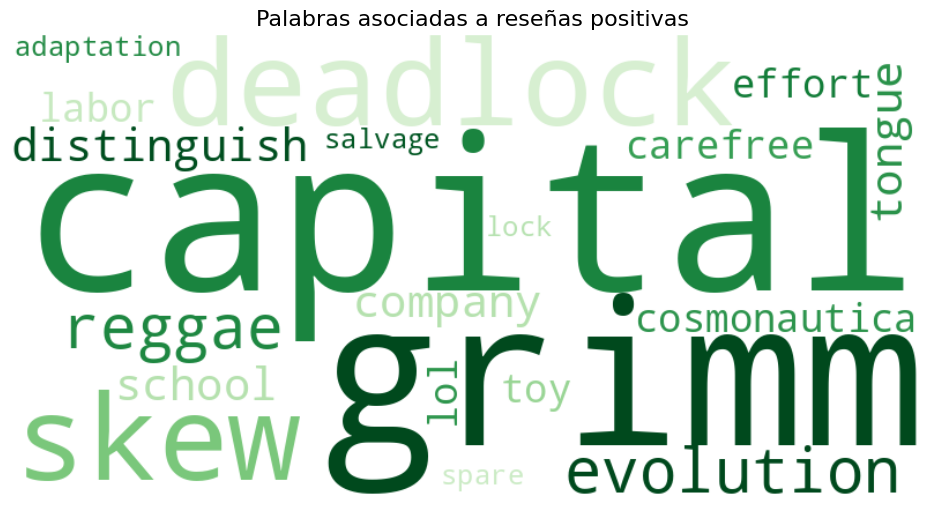

In [152]:
wc_pos = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='Greens',
    max_words=50
).generate_from_frequencies(pos_dict)

plt.figure(figsize=(12, 6))
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras asociadas a reseñas positivas', fontsize=16)
plt.show()

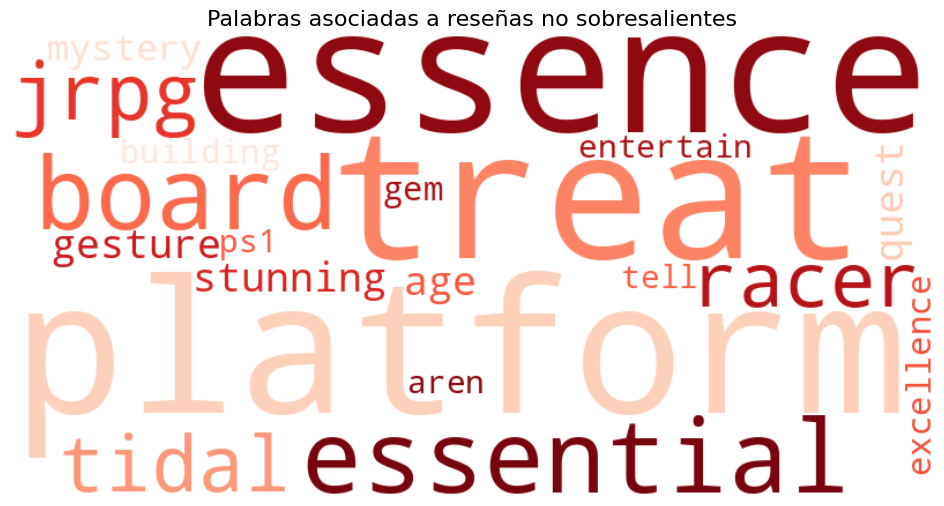

In [153]:
wc_neg = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='Reds',
    max_words=50
).generate_from_frequencies(neg_dict)

plt.figure(figsize=(12, 6))
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras asociadas a reseñas no sobresalientes', fontsize=16)
plt.show()

###TF-IDF

In [154]:
vectorizer = skl.feature_extraction.text.TfidfVectorizer()

In [155]:
x_train_tfidf_reviews = vectorizer.fit_transform(x_train["reviews"].apply(lambda x: " ".join(x)))
x_test_tfidf_reviews = vectorizer.transform(x_test["reviews"].apply(lambda x: " ".join(x)))

In [156]:
model = skl.linear_model.LogisticRegression(max_iter=5000, penalty="l2", C=100)
model.fit(x_train_tfidf_reviews, y_train)

LogisticRegression(C=100, max_iter=5000)

In [157]:
y_pred = model.predict(x_test_tfidf_reviews)

In [158]:
accuracy = skl.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = skl.metrics.confusion_matrix(y_test, y_pred)
classification_report = skl.metrics.classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix)
print("Classification Report:\n", classification_report)

Accuracy: 0.5192507804370448
Confusion Matrix:
 [[  1  41  43]
 [ 19 498 405]
 [ 11 405 499]]
Classification Report:
               precision    recall  f1-score   support

           0       0.03      0.01      0.02        85
           1       0.53      0.54      0.53       922
           2       0.53      0.55      0.54       915

    accuracy                           0.52      1922
   macro avg       0.36      0.37      0.36      1922
weighted avg       0.51      0.52      0.51      1922



In [159]:
feature_names = vectorizer.get_feature_names_out()
weights = model.coef_[0]

In [160]:
top_pos = sorted(
    zip(feature_names, weights),
    key=lambda x: x[1],
    reverse=True
)[:20]

In [161]:
top_neg = sorted(
    zip(feature_names, weights),
    key=lambda x: x[1]
)[:20]

In [162]:
print(top_pos)

[('distinguish', np.float64(7.172358919596576)), ('school', np.float64(7.072258638345286)), ('reggae', np.float64(7.025137984730874)), ('cosmonautica', np.float64(6.526727285073219)), ('effort', np.float64(6.525680503727506)), ('scheme', np.float64(6.52370009049932)), ('capital', np.float64(6.510881009004022)), ('company', np.float64(6.418994049457007)), ('grimm', np.float64(6.396909229838613)), ('evolution', np.float64(6.365741369980324)), ('dangerous', np.float64(6.083901753428405)), ('armada', np.float64(6.070520775307869)), ('spare', np.float64(5.929299912796894)), ('brothers', np.float64(5.870860516743289)), ('thunderbird', np.float64(5.809515613909735)), ('labor', np.float64(5.792079883305425)), ('deadlock', np.float64(5.769526868900994)), ('merger', np.float64(5.737258121158986)), ('carefree', np.float64(5.734058454312499)), ('collect', np.float64(5.674045593465381))]


In [163]:
print(top_neg)

[('give', np.float64(-5.972705624381224)), ('platform', np.float64(-5.698676338236568)), ('treat', np.float64(-5.268973681020915)), ('stunning', np.float64(-4.836352298801995)), ('age', np.float64(-4.597560698668886)), ('essence', np.float64(-4.58214389890637)), ('satisfying', np.float64(-4.540850703406566)), ('board', np.float64(-4.518118630673832)), ('building', np.float64(-4.5033264260143255)), ('roguelike', np.float64(-4.49404667850407)), ('series', np.float64(-4.4388350951160715)), ('battle', np.float64(-4.261250861698214)), ('mystery', np.float64(-4.152751308341272)), ('content', np.float64(-4.13068792475378)), ('essential', np.float64(-4.09270584192708)), ('entertain', np.float64(-4.0822552336595965)), ('charming', np.float64(-4.074705515879938)), ('stand', np.float64(-4.065079422099128)), ('gem', np.float64(-4.041521648546878)), ('tell', np.float64(-4.019170115645185))]


In [164]:
pos_dict = dict(top_pos)
neg_dict = {w: abs(v) for w, v in top_neg}

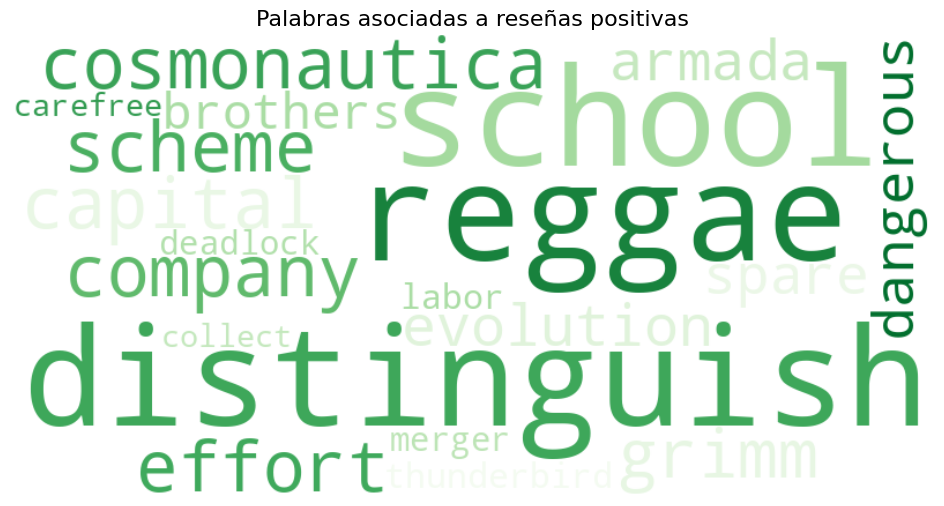

In [165]:
wc_pos = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='Greens',
    max_words=50
).generate_from_frequencies(pos_dict)

plt.figure(figsize=(12, 6))
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras asociadas a reseñas positivas', fontsize=16)
plt.show()

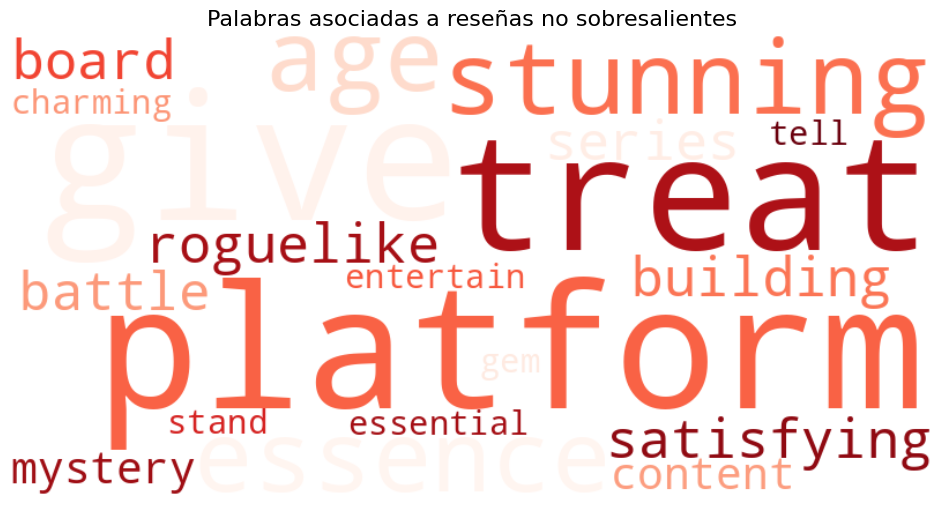

In [166]:
wc_neg = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='Reds',
    max_words=50
).generate_from_frequencies(neg_dict)

plt.figure(figsize=(12, 6))
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras asociadas a reseñas no sobresalientes', fontsize=16)
plt.show()

##All Tags

###Binary

In [167]:
vectorizer = skl.feature_extraction.text.CountVectorizer(binary=True)

In [168]:
x_train_binary_all_tags = vectorizer.fit_transform(x_train["all_tags"])
x_test_binary_all_tags = vectorizer.transform(x_test["all_tags"])

In [169]:
model = skl.linear_model.LogisticRegression(max_iter=5000, penalty="l2", C=100)
model.fit(x_train_binary_all_tags, y_train)

LogisticRegression(C=100, max_iter=5000)

In [170]:
y_pred = model.predict(x_test_binary_all_tags)

In [171]:
accuracy = skl.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = skl.metrics.confusion_matrix(y_test, y_pred)
classification_report = skl.metrics.classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix)
print("Classification Report:\n", classification_report)

Accuracy: 0.5978147762747138
Confusion Matrix:
 [[  4  72   9]
 [ 22 594 306]
 [  9 355 551]]
Classification Report:
               precision    recall  f1-score   support

           0       0.11      0.05      0.07        85
           1       0.58      0.64      0.61       922
           2       0.64      0.60      0.62       915

    accuracy                           0.60      1922
   macro avg       0.44      0.43      0.43      1922
weighted avg       0.59      0.60      0.59      1922



In [172]:
feature_names = vectorizer.get_feature_names_out()
weights = model.coef_[0]

In [173]:
top_pos = sorted(
    zip(feature_names, weights),
    key=lambda x: x[1],
    reverse=True
)[:20]

In [174]:
top_neg = sorted(
    zip(feature_names, weights),
    key=lambda x: x[1]
)[:20]

In [175]:
print(top_pos)

[('golf', np.float64(2.978156855544986)), ('job', np.float64(2.820070972598444)), ('offroad', np.float64(2.8067107392361637)), ('skateboarding', np.float64(2.6735450813210173)), ('production', np.float64(2.3805176705398763)), ('accounting', np.float64(2.3638204941749335)), ('instrumental', np.float64(2.266607934329008)), ('phone', np.float64(2.253547194136726)), ('360', np.float64(1.875622700420305)), ('sharing', np.float64(1.8675402777383336)), ('basketball', np.float64(1.7165740236043625)), ('travel', np.float64(1.5998302042271622)), ('simulator', np.float64(1.5846175611472268)), ('4x', np.float64(1.5550825689933565)), ('commentary', np.float64(1.5329481741481192)), ('sequel', np.float64(1.5158463633949937)), ('mars', np.float64(1.4273782407490834)), ('moba', np.float64(1.4096899939376022)), ('bullet', np.float64(1.3931231891343065)), ('female', np.float64(1.3670998819163278))]


In [176]:
print(top_neg)

[('beautiful', np.float64(-3.800714623273845)), ('development', np.float64(-3.5680824291057047)), ('manipulation', np.float64(-3.5196216491048387)), ('hobby', np.float64(-3.3338931109674537)), ('cooking', np.float64(-3.2072190867922292)), ('cats', np.float64(-3.148799869968272)), ('auto', np.float64(-3.121625164993088)), ('spaceships', np.float64(-3.019641302743894)), ('episodic', np.float64(-3.001257558420689)), ('western', np.float64(-2.9678309290361495)), ('heist', np.float64(-2.9461538947540467)), ('gothic', np.float64(-2.916870969861343)), ('mini', np.float64(-2.876023833621815)), ('dynamic', np.float64(-2.843522582363415)), ('dice', np.float64(-2.7217799698342073)), ('spectacle', np.float64(-2.7127522857932567)), ('sailing', np.float64(-2.6816094992994812)), ('mining', np.float64(-2.6634697752048515)), ('cold', np.float64(-2.546229598208462)), ('faith', np.float64(-2.522422814454793))]


In [177]:
pos_dict = dict(top_pos)
neg_dict = {w: abs(v) for w, v in top_neg}

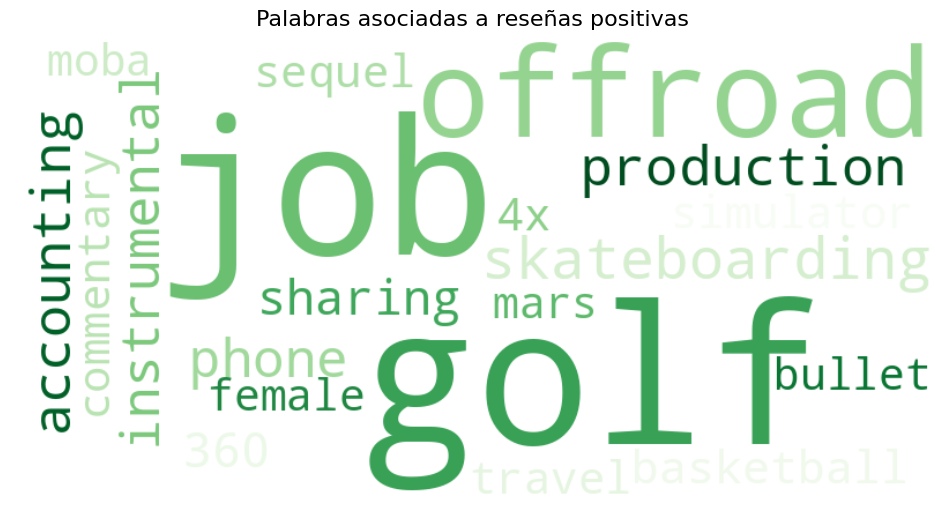

In [178]:
wc_pos = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='Greens',
    max_words=50
).generate_from_frequencies(pos_dict)

plt.figure(figsize=(12, 6))
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras asociadas a reseñas positivas', fontsize=16)
plt.show()

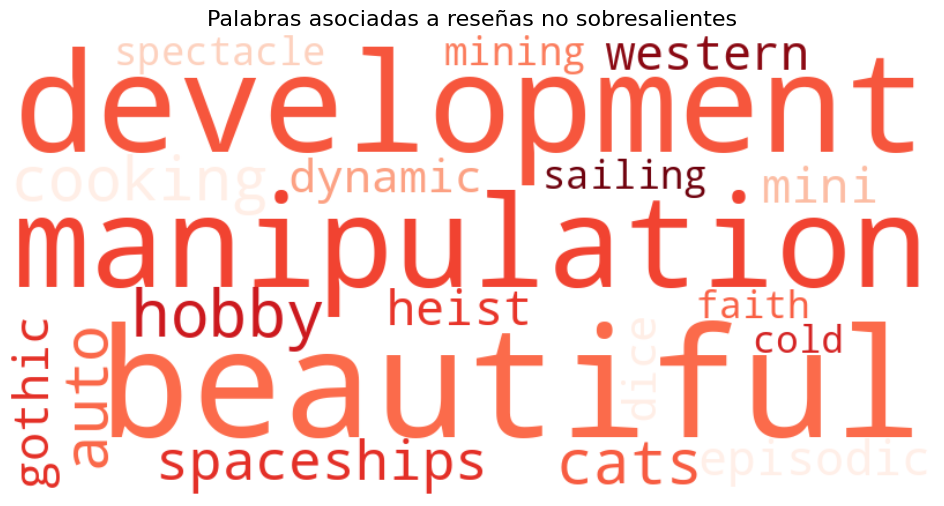

In [179]:
wc_neg = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='Reds',
    max_words=50
).generate_from_frequencies(neg_dict)

plt.figure(figsize=(12, 6))
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras asociadas a reseñas no sobresalientes', fontsize=16)
plt.show()

###Frequency

In [180]:
vectorizer = skl.feature_extraction.text.CountVectorizer(binary=False)

In [181]:
x_train_freq_all_tags = vectorizer.fit_transform(x_train["all_tags"])
x_test_freq_all_tags = vectorizer.transform(x_test["all_tags"])

In [182]:
model = skl.linear_model.LogisticRegression(max_iter=5000, penalty="l2", C=100)
model.fit(x_train_freq_all_tags, y_train)

LogisticRegression(C=100, max_iter=5000)

In [183]:
y_pred = model.predict(x_test_freq_all_tags)

In [184]:
accuracy = skl.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = skl.metrics.confusion_matrix(y_test, y_pred)
classification_report = skl.metrics.classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix)
print("Classification Report:\n", classification_report)

Accuracy: 0.5983350676378772
Confusion Matrix:
 [[  6  68  11]
 [ 21 593 308]
 [  6 358 551]]
Classification Report:
               precision    recall  f1-score   support

           0       0.18      0.07      0.10        85
           1       0.58      0.64      0.61       922
           2       0.63      0.60      0.62       915

    accuracy                           0.60      1922
   macro avg       0.47      0.44      0.44      1922
weighted avg       0.59      0.60      0.59      1922



In [185]:
feature_names = vectorizer.get_feature_names_out()
weights = model.coef_[0]

In [186]:
top_pos = sorted(
    zip(feature_names, weights),
    key=lambda x: x[1],
    reverse=True
)[:20]

In [187]:
top_neg = sorted(
    zip(feature_names, weights),
    key=lambda x: x[1]
)[:20]

In [188]:
print(top_pos)

[('job', np.float64(3.075478921582025)), ('accounting', np.float64(2.9396789555860607)), ('skateboarding', np.float64(2.593991370942441)), ('class', np.float64(2.5506879735963603)), ('phone', np.float64(2.4532214514022397)), ('offroad', np.float64(2.411683803201636)), ('instrumental', np.float64(2.384701735522638)), ('ii', np.float64(2.2585887135353744)), ('travel', np.float64(2.0062503830569427)), ('golf', np.float64(1.9917728164431199)), ('multi', np.float64(1.8788342253540624)), ('moba', np.float64(1.7809052435210941)), ('single', np.float64(1.7183909383103753)), ('simulator', np.float64(1.7123111575955567)), ('text', np.float64(1.6432397165101502)), ('4x', np.float64(1.5412239969132924)), ('basketball', np.float64(1.4894634940755105)), ('team', np.float64(1.4304790599738368)), ('trading', np.float64(1.4177426129512811)), ('female', np.float64(1.4046746305291076))]


In [189]:
print(top_neg)

[('hobby', np.float64(-4.206657009330643)), ('beautiful', np.float64(-3.9644618761111787)), ('mini', np.float64(-3.4526732371297313)), ('sailing', np.float64(-3.309511378933942)), ('cooking', np.float64(-3.2457727949169763)), ('dynamic', np.float64(-3.2165240573201244)), ('cats', np.float64(-3.1591522972687196)), ('western', np.float64(-3.1332018603087364)), ('mining', np.float64(-3.008935654624213)), ('spectacle', np.float64(-2.998287085473494)), ('episodic', np.float64(-2.9979797445821483)), ('spaceships', np.float64(-2.864317396947688)), ('development', np.float64(-2.8538586020548533)), ('sniper', np.float64(-2.7816304050209557)), ('manipulation', np.float64(-2.6760078515587082)), ('faith', np.float64(-2.6724852875018468)), ('cold', np.float64(-2.627661935205482)), ('experience', np.float64(-2.618107680171141)), ('match', np.float64(-2.5570399056527213)), ('tablet', np.float64(-2.541638963013893))]


In [190]:
pos_dict = dict(top_pos)
neg_dict = {w: abs(v) for w, v in top_neg}

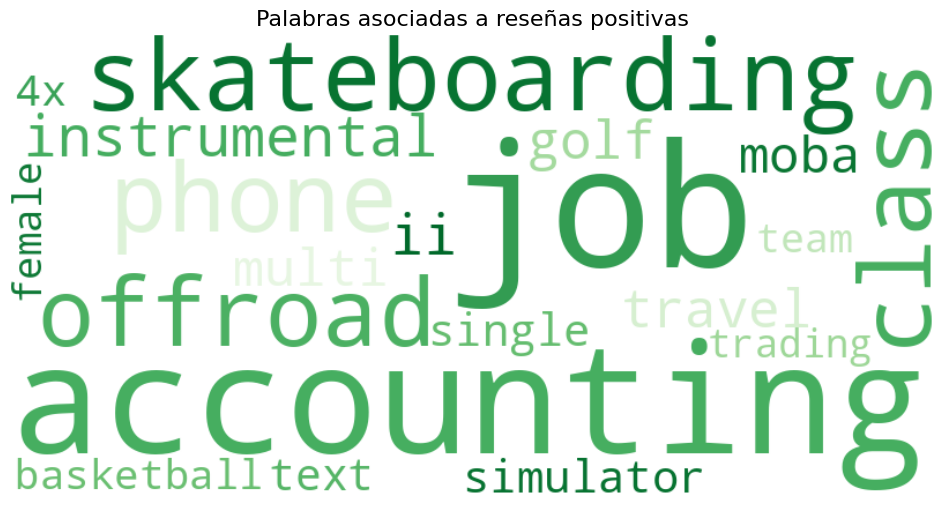

In [191]:
wc_pos = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='Greens',
    max_words=50
).generate_from_frequencies(pos_dict)

plt.figure(figsize=(12, 6))
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras asociadas a reseñas positivas', fontsize=16)
plt.show()

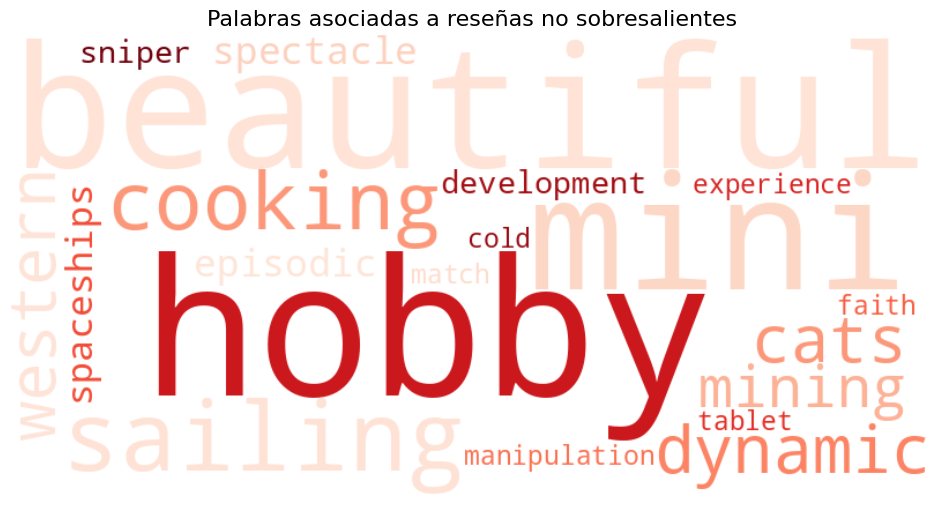

In [192]:
wc_neg = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='Reds',
    max_words=50
).generate_from_frequencies(neg_dict)

plt.figure(figsize=(12, 6))
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras asociadas a reseñas no sobresalientes', fontsize=16)
plt.show()

###TF-IDF

In [193]:
vectorizer = skl.feature_extraction.text.TfidfVectorizer()

In [194]:
x_train_tfidf_all_tags = vectorizer.fit_transform(x_train["all_tags"])
x_test_tfidf_all_tags = vectorizer.transform(x_test["all_tags"])

In [195]:
model = skl.linear_model.LogisticRegression(max_iter=5000, penalty="l2", C=100)
model.fit(x_train_tfidf_all_tags, y_train)

LogisticRegression(C=100, max_iter=5000)

In [196]:
y_pred = model.predict(x_test_tfidf_all_tags)

In [197]:
accuracy = skl.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = skl.metrics.confusion_matrix(y_test, y_pred)
classification_report = skl.metrics.classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix)
print("Classification Report:\n", classification_report)

Accuracy: 0.6097814776274714
Confusion Matrix:
 [[  3  67  15]
 [ 16 587 319]
 [  7 326 582]]
Classification Report:
               precision    recall  f1-score   support

           0       0.12      0.04      0.05        85
           1       0.60      0.64      0.62       922
           2       0.64      0.64      0.64       915

    accuracy                           0.61      1922
   macro avg       0.45      0.44      0.44      1922
weighted avg       0.59      0.61      0.60      1922



In [198]:
feature_names = vectorizer.get_feature_names_out()
weights = model.coef_[0]

In [199]:
top_pos = sorted(
    zip(feature_names, weights),
    key=lambda x: x[1],
    reverse=True
)[:20]

In [200]:
top_neg = sorted(
    zip(feature_names, weights),
    key=lambda x: x[1]
)[:20]

In [201]:
print(top_pos)

[('job', np.float64(7.0727611528541185)), ('offroad', np.float64(5.7397269442771535)), ('class', np.float64(5.302331020084881)), ('trading', np.float64(5.03606244952805)), ('skateboarding', np.float64(4.948211637336575)), ('moba', np.float64(4.47134239023953)), ('4x', np.float64(4.123243803643341)), ('travel', np.float64(4.0064544605984125)), ('gambling', np.float64(3.992427176607866)), ('basketball', np.float64(3.856732657365057)), ('fighter', np.float64(3.527869367480412)), ('instrumental', np.float64(3.2241493357302624)), ('sequel', np.float64(3.068827260357302)), ('mars', np.float64(2.93201593336026)), ('politics', np.float64(2.824324307992952)), ('mmo', np.float64(2.8029479183153487)), ('beat', np.float64(2.7900545725046206)), ('ii', np.float64(2.7823605731125425)), ('golf', np.float64(2.647921450946313)), ('tabletop', np.float64(2.4899677858544726))]


In [202]:
print(top_neg)

[('1990s', np.float64(-7.185695398064509)), ('beautiful', np.float64(-6.236084513829168)), ('competitive', np.float64(-5.922233046650242)), ('cats', np.float64(-5.598813434072162)), ('supernatural', np.float64(-5.509004718497537)), ('western', np.float64(-5.34773410614535)), ('dynamic', np.float64(-4.992913823336614)), ('spectacle', np.float64(-4.920015607080284)), ('loot', np.float64(-4.828830821972292)), ('deckbuilding', np.float64(-4.689443653115612)), ('development', np.float64(-4.602185769276677)), ('manipulation', np.float64(-4.590525060112664)), ('gothic', np.float64(-4.5477100101099746)), ('cooking', np.float64(-4.448405726501284)), ('episodic', np.float64(-4.380224104660662)), ('sailing', np.float64(-4.284855088512876)), ('villain', np.float64(-4.197066122765902)), ('mining', np.float64(-4.196298747241624)), ('5d', np.float64(-4.178049798528201)), ('spaceships', np.float64(-4.176705347396845))]


In [203]:
pos_dict = dict(top_pos)
neg_dict = {w: abs(v) for w, v in top_neg}

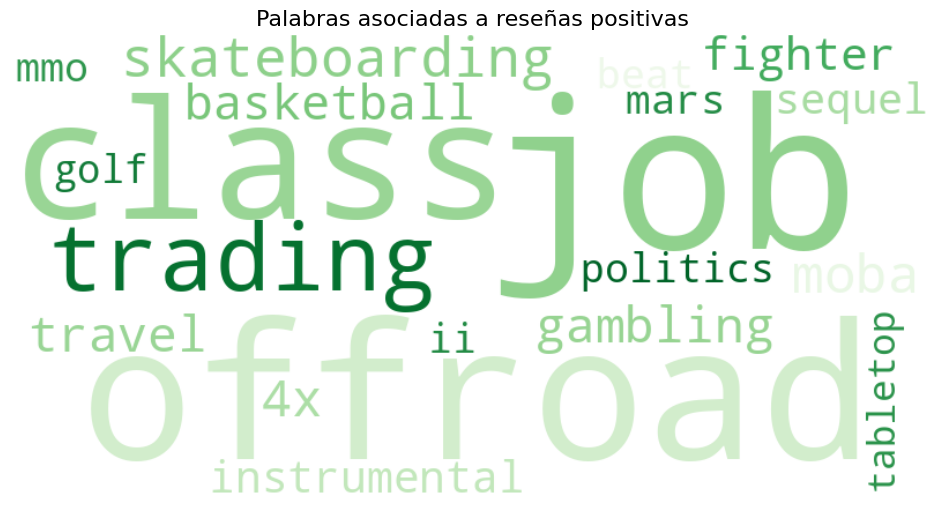

In [204]:
wc_pos = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='Greens',
    max_words=50
).generate_from_frequencies(pos_dict)

plt.figure(figsize=(12, 6))
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras asociadas a reseñas positivas', fontsize=16)
plt.show()

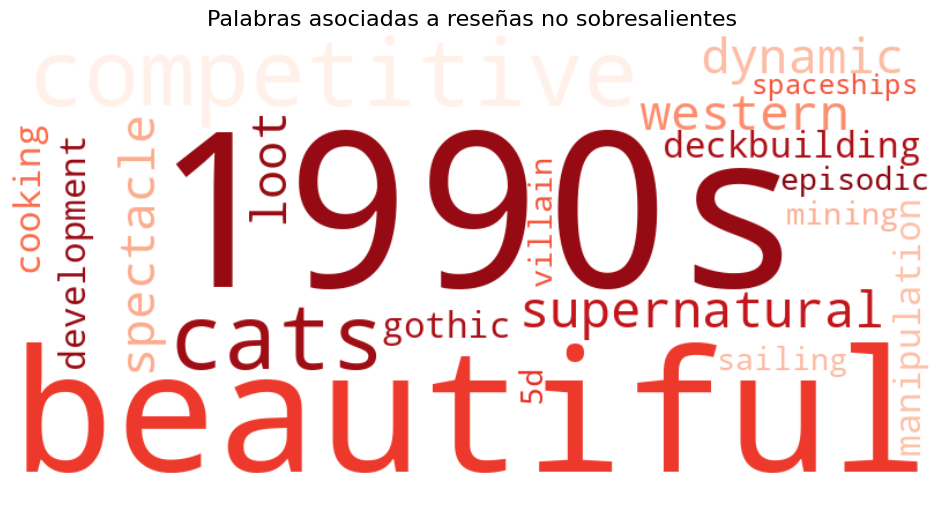

In [205]:
wc_neg = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='Reds',
    max_words=50
).generate_from_frequencies(neg_dict)

plt.figure(figsize=(12, 6))
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras asociadas a reseñas no sobresalientes', fontsize=16)
plt.show()

#Analizis NLP de Tags con Reducción de Dimensión



In [206]:
x_all_tags, y_all_tags = NLP_dataset["all_tags"], NLP_dataset["porcentaje_positive_total"]

In [207]:
y_all_tags.unique()

array([0.81576537, 0.87268015, 0.96787958, ..., 0.375     , 0.22222222,
       0.13636364])

In [208]:
vectorizer = skl.feature_extraction.text.TfidfVectorizer()
x_all_tags_vectorized = vectorizer.fit_transform(x_all_tags)

In [209]:
pca_model_2d = skl.decomposition.PCA(n_components=2)
pca_result_2d = pca_model_2d.fit_transform(x_all_tags_vectorized)

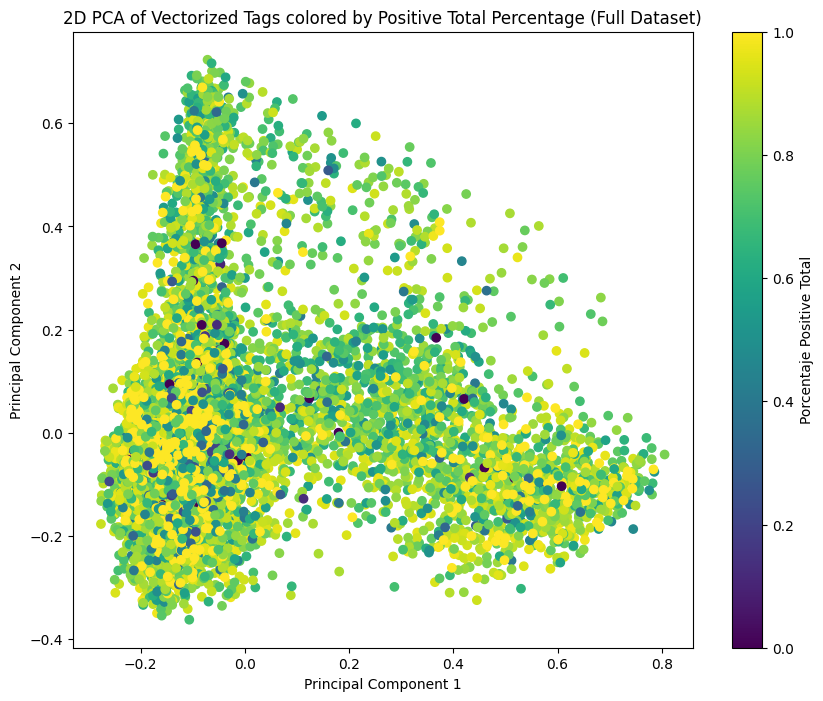

In [210]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_result_2d[:, 0], pca_result_2d[:, 1], c=y_all_tags, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Vectorized Tags colored by Positive Total Percentage (Full Dataset)')
plt.colorbar(scatter, label='Porcentaje Positive Total')
plt.show()

In [211]:
pca_model_3d = skl.decomposition.PCA(n_components=3)
pca_result_3d = pca_model_3d.fit_transform(x_all_tags_vectorized)

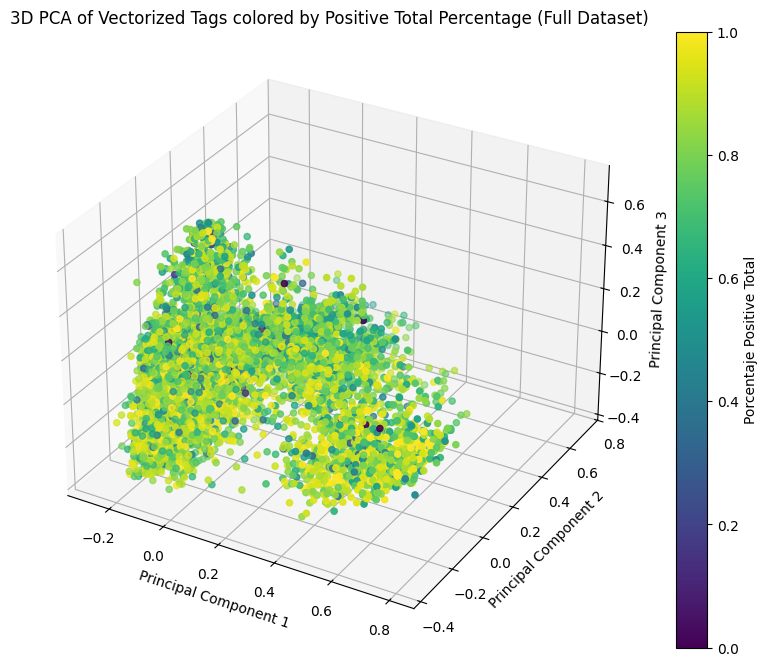

In [212]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pca_result_3d[:, 0], pca_result_3d[:, 1], pca_result_3d[:, 2], c=y_all_tags, cmap='viridis')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of Vectorized Tags colored by Positive Total Percentage (Full Dataset)')
fig.colorbar(scatter, ax=ax, label='Porcentaje Positive Total')
plt.show()

#Series de Tiempo

In [213]:
temporal_data = norm_dataset.groupby('release_year').agg({
    'index': 'count',
    'price': 'median',
    'porcentaje_positive_total': 'mean'
}).reset_index()

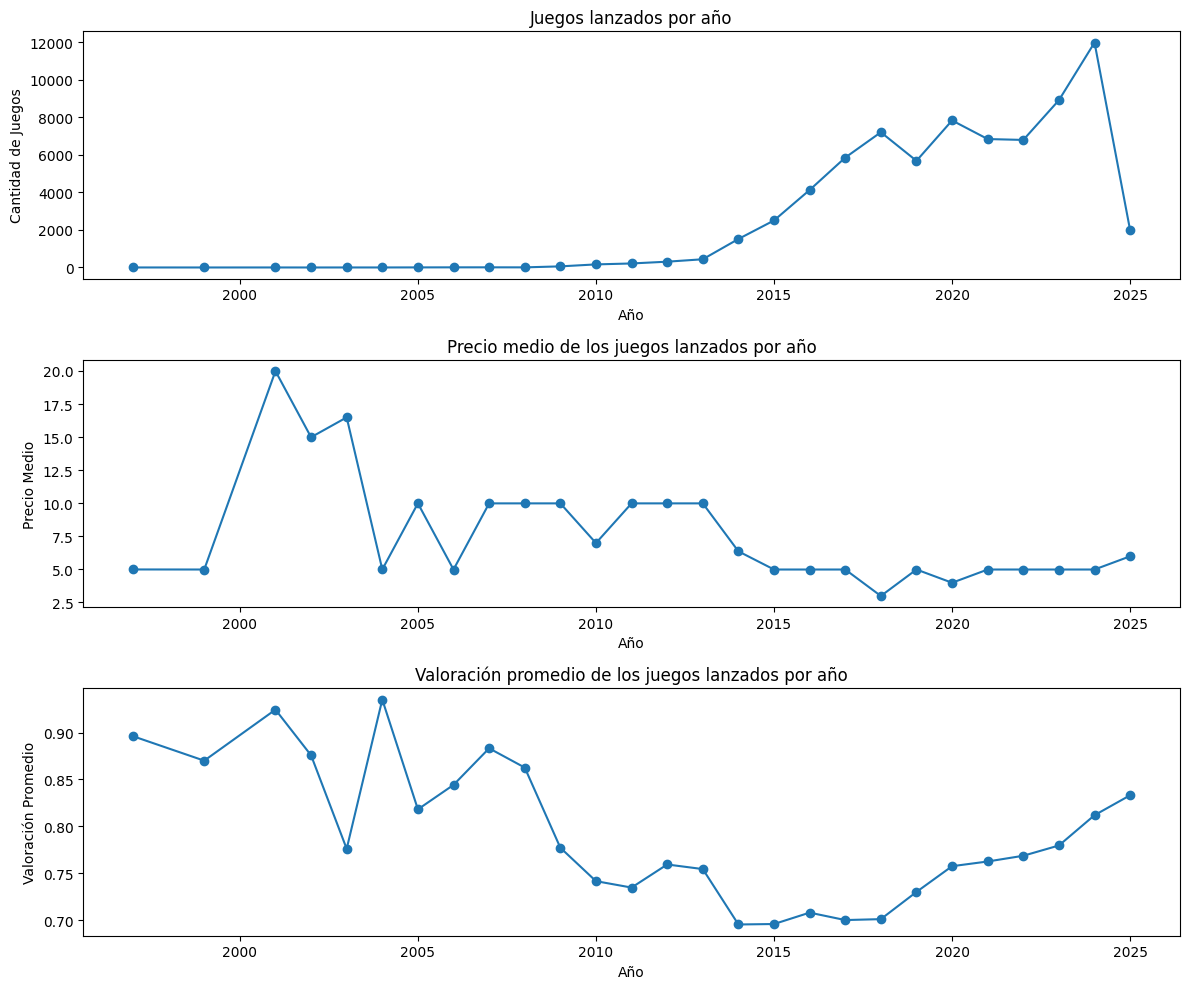

In [214]:
fig, axes = plt.subplots(3, 1, figsize=(12, 10))
axes[0].plot(temporal_data['release_year'], temporal_data['index'])
axes[0].scatter(temporal_data['release_year'], temporal_data['index'])
axes[0].set_title('Juegos lanzados por año')
axes[0].set_xlabel('Año')
axes[0].set_ylabel('Cantidad de Juegos')

axes[1].plot(temporal_data['release_year'], temporal_data['price'])
axes[1].scatter(temporal_data['release_year'], temporal_data['price'])
axes[1].set_title('Precio medio de los juegos lanzados por año')
axes[1].set_xlabel('Año')
axes[1].set_ylabel('Precio Medio')

axes[2].plot(temporal_data['release_year'], temporal_data['porcentaje_positive_total'])
axes[2].scatter(temporal_data['release_year'], temporal_data['porcentaje_positive_total'])
axes[2].set_title('Valoración promedio de los juegos lanzados por año')
axes[2].set_xlabel('Año')
axes[2].set_ylabel('Valoración Promedio')

plt.tight_layout()
plt.show()

##Cantidad de juegos lanzados por Año

In [215]:
tiempo = temporal_data['release_year'].values
serie_original = temporal_data['index'].values

In [216]:
print("="*70)
print("JUEGOS LANZADOS POR AÑO")
print("="*70)
print(f"Años analizados: {tiempo.min()} - {tiempo.max()}")
print(f"Total de puntos temporales: {len(tiempo)}")
print(f"Juegos totales: {serie_original.sum()}")
print(f"Promedio de juegos/año: {serie_original.mean():.2f}")
print()

JUEGOS LANZADOS POR AÑO
Años analizados: 1997 - 2025
Total de puntos temporales: 27
Juegos totales: 72548
Promedio de juegos/año: 2686.96



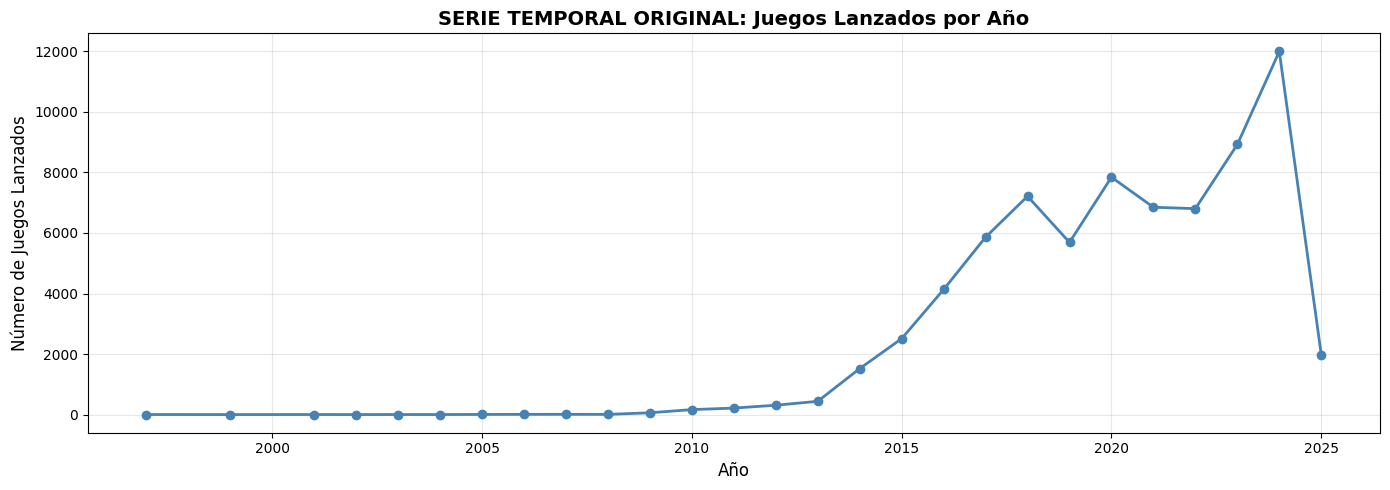

In [217]:
plt.figure(figsize=(14, 5))
plt.plot(tiempo, serie_original, marker='o', linewidth=2, markersize=6, color='steelblue')
plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de Juegos Lanzados', fontsize=12)
plt.title('SERIE TEMPORAL ORIGINAL: Juegos Lanzados por Año', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [218]:
N = len(serie_original)
T = 1.0

In [219]:
yf = fft(serie_original)
xf = fftfreq(N, T)

In [220]:
amplitud = (2.0/N) * np.abs(yf[:N//2])
frecuencias = xf[:N//2]

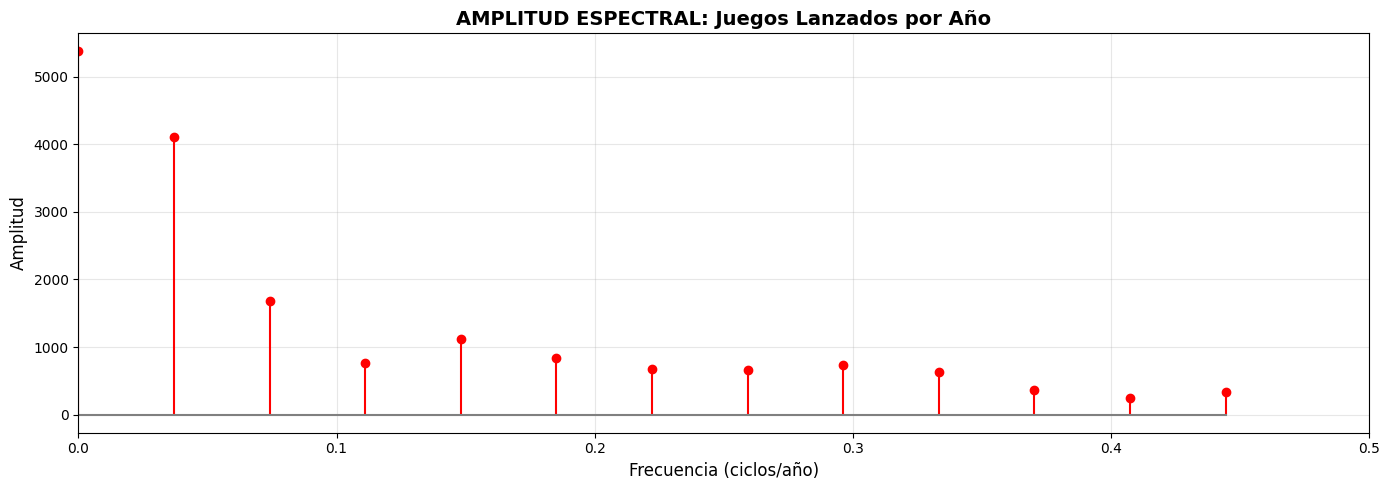

In [221]:
plt.figure(figsize=(14, 5))
plt.stem(frecuencias, amplitud, linefmt='red', markerfmt='ro', basefmt='gray')
plt.xlabel('Frecuencia (ciclos/año)', fontsize=12)
plt.ylabel('Amplitud', fontsize=12)
plt.title('AMPLITUD ESPECTRAL: Juegos Lanzados por Año', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xlim(0, 0.5)
plt.tight_layout()
plt.show()

In [222]:
umbral = 0.05 * amplitud.max()
indices_significativos = np.where(amplitud > umbral)[0]

In [223]:
indices_ordenados = indices_significativos[np.argsort(-amplitud[indices_significativos])]

In [224]:
componentes = []

In [225]:
print("="*70)
print("COMPONENTES PERIÓDICAS IDENTIFICADAS")
print("="*70)
print(f"{'#':<5} {'Frecuencia (Hz)':<20} {'Periodo (años)':<20} {'Amplitud':<15}")
print("-"*70)

for i, idx in enumerate(indices_ordenados[:6], 1):
    freq = frecuencias[idx]
    amp = amplitud[idx]

    if freq == 0:
        periodo_str = "∞ (componente DC)"
        periodo = np.inf
    else:
        periodo = 1.0 / freq
        periodo_str = f"{periodo:.2f}"

    print(f"{i:<5} {freq:<20.6f} {periodo_str:<20} {amp:<15.2f}")

    componentes.append({
        'frecuencia': freq,
        'periodo': periodo,
        'amplitud': amp,
        'fase': np.angle(yf[idx])
    })

print()

COMPONENTES PERIÓDICAS IDENTIFICADAS
#     Frecuencia (Hz)      Periodo (años)       Amplitud       
----------------------------------------------------------------------
1     0.000000             ∞ (componente DC)    5373.93        
2     0.037037             27.00                4104.07        
3     0.074074             13.50                1677.20        
4     0.148148             6.75                 1111.51        
5     0.185185             5.40                 839.44         
6     0.111111             9.00                 767.69         



In [226]:
print("="*70)
print("CONSTRUYENDO COMPONENTES PERIÓDICAS")
print("="*70)

CONSTRUYENDO COMPONENTES PERIÓDICAS


In [227]:
t_continuo = np.linspace(tiempo.min(), tiempo.max(), 500)

In [228]:
componente_dc = componentes[0]['amplitud']

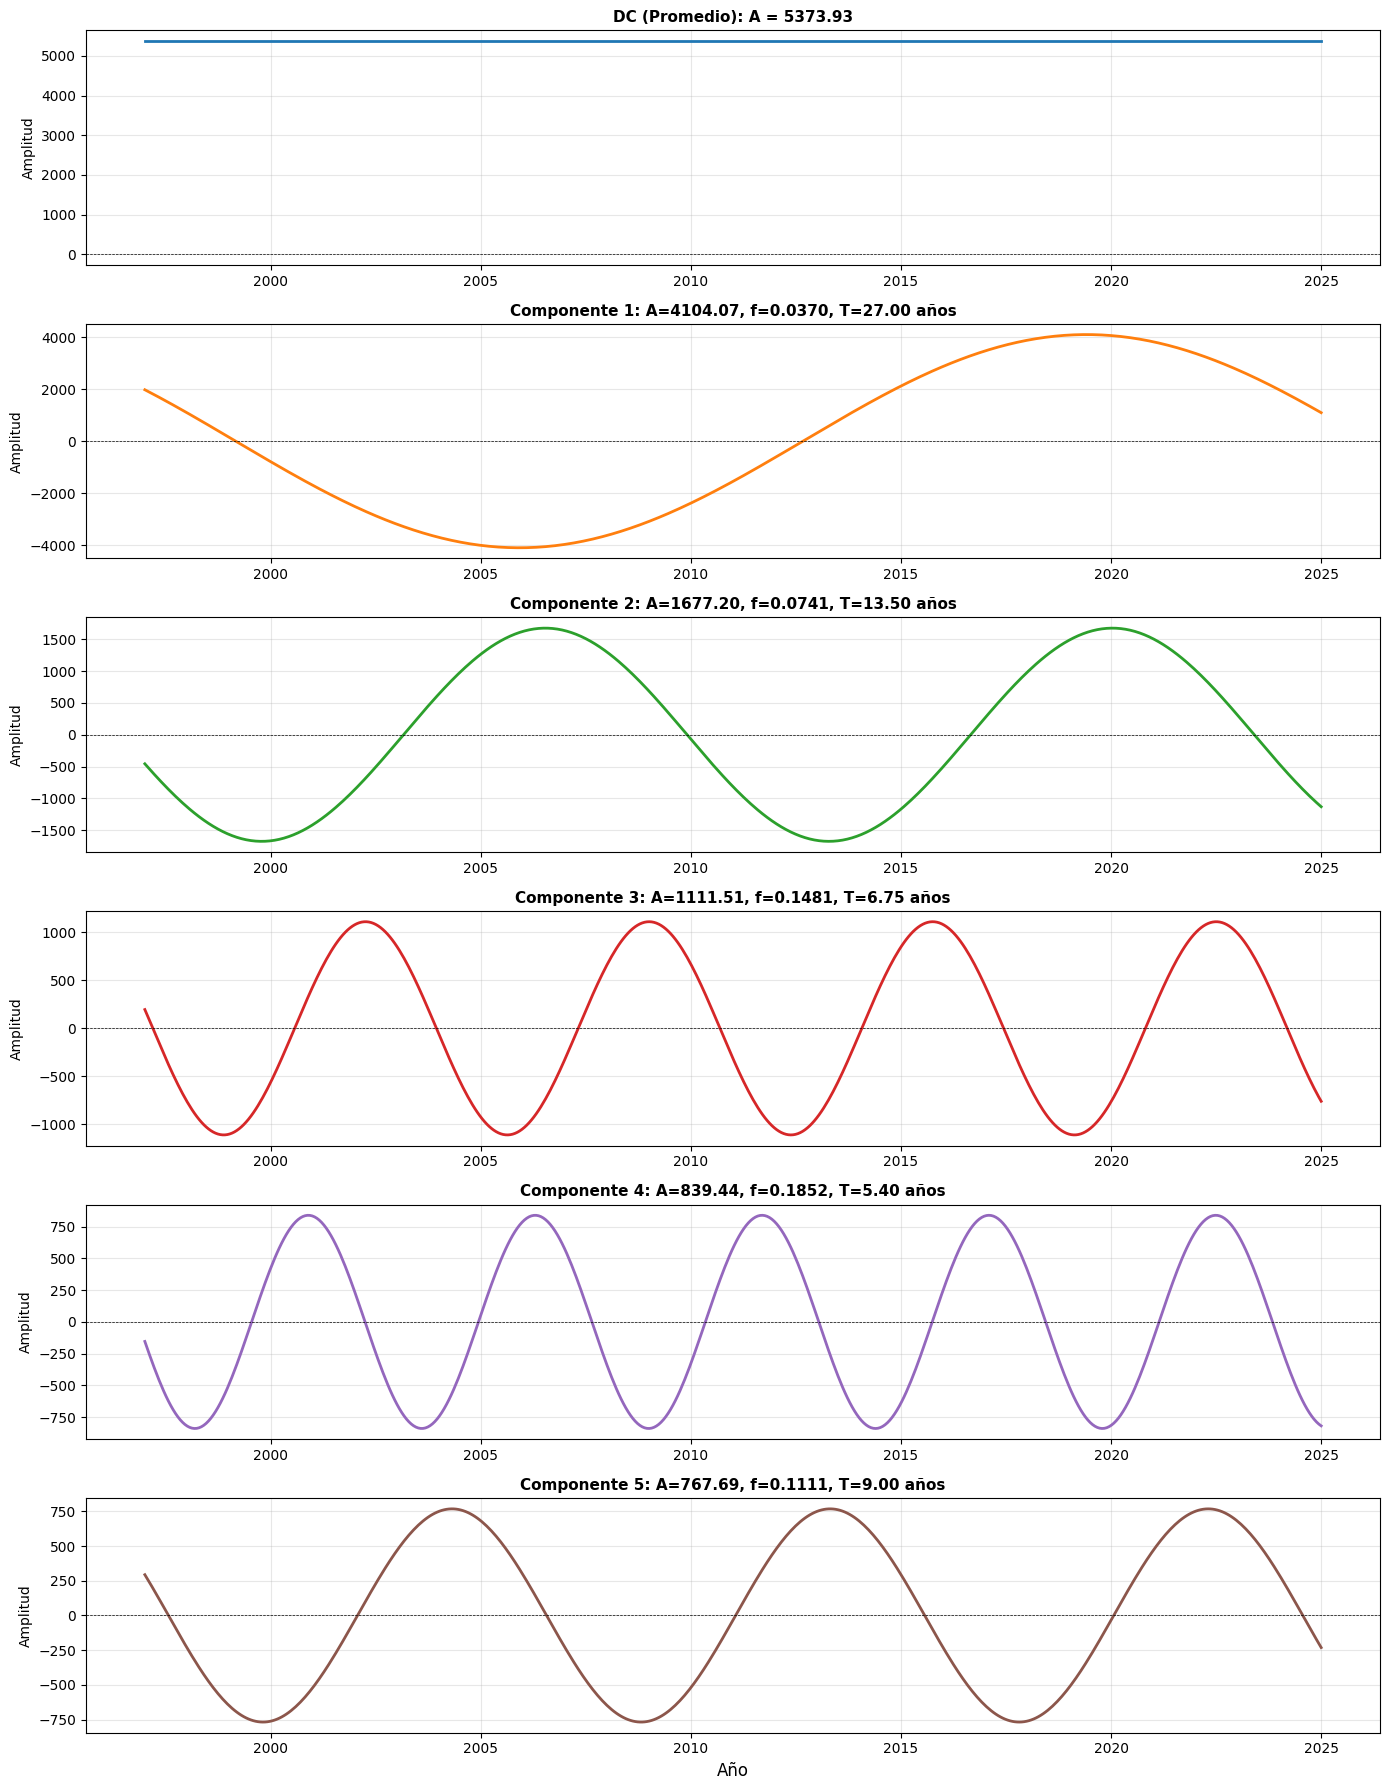

In [229]:
fig, axes = plt.subplots(len(componentes), 1, figsize=(14, 3*len(componentes)))
if len(componentes) == 1:
    axes = [axes]

for i, comp in enumerate(componentes):
    freq = comp['frecuencia']
    amp = comp['amplitud']
    fase = comp['fase']

    if freq == 0:
        # Componente DC
        componente = np.ones_like(t_continuo) * amp
        label = f"DC (Promedio): A = {amp:.2f}"
    else:
        # Componente sinusoidal: A·cos(2πft + φ)
        componente = amp * np.cos(2 * np.pi * freq * t_continuo + fase)
        periodo = comp['periodo']
        label = f"Componente {i}: A={amp:.2f}, f={freq:.4f}, T={periodo:.2f} años"

    axes[i].plot(t_continuo, componente, linewidth=2, color=f'C{i}')
    axes[i].set_ylabel('Amplitud', fontsize=10)
    axes[i].set_title(label, fontsize=11, fontweight='bold')
    axes[i].grid(True, alpha=0.3)
    axes[i].axhline(0, color='black', linewidth=0.5, linestyle='--')

axes[-1].set_xlabel('Año', fontsize=12)
plt.tight_layout()
plt.show()

In [230]:
print("="*70)
print("RECONSTRUYENDO SERIE TEMPORAL")
print("="*70)

RECONSTRUYENDO SERIE TEMPORAL


In [231]:
t_original = tiempo
reconstruccion = np.zeros_like(t_original, dtype=float)

for comp in componentes:
    freq = comp['frecuencia']
    amp = comp['amplitud']
    fase = comp['fase']

    if freq == 0:
        reconstruccion += amp
    else:
        reconstruccion += amp * np.cos(2 * np.pi * freq * t_original + fase)

In [232]:
residuos = serie_original - reconstruccion
X_tendencia = t_original.reshape(-1, 1)

In [233]:
modelo_tendencia = skl.linear_model.LinearRegression()
modelo_tendencia.fit(X_tendencia, residuos)

LinearRegression()

In [234]:
tendencia_lineal = modelo_tendencia.predict(X_tendencia)

In [235]:
if np.abs(modelo_tendencia.coef_[0]) > 1.0: #Pendiente > 1 juego/año
    print(f"Tendencia lineal detectada: {modelo_tendencia.coef_[0]:.2f} juegos/año")
    reconstruccion_final = reconstruccion + tendencia_lineal
    tiene_tendencia = True
else:
    print("No se detectó tendencia lineal significativa")
    reconstruccion_final = reconstruccion
    tiene_tendencia = False

Tendencia lineal detectada: 69.70 juegos/año


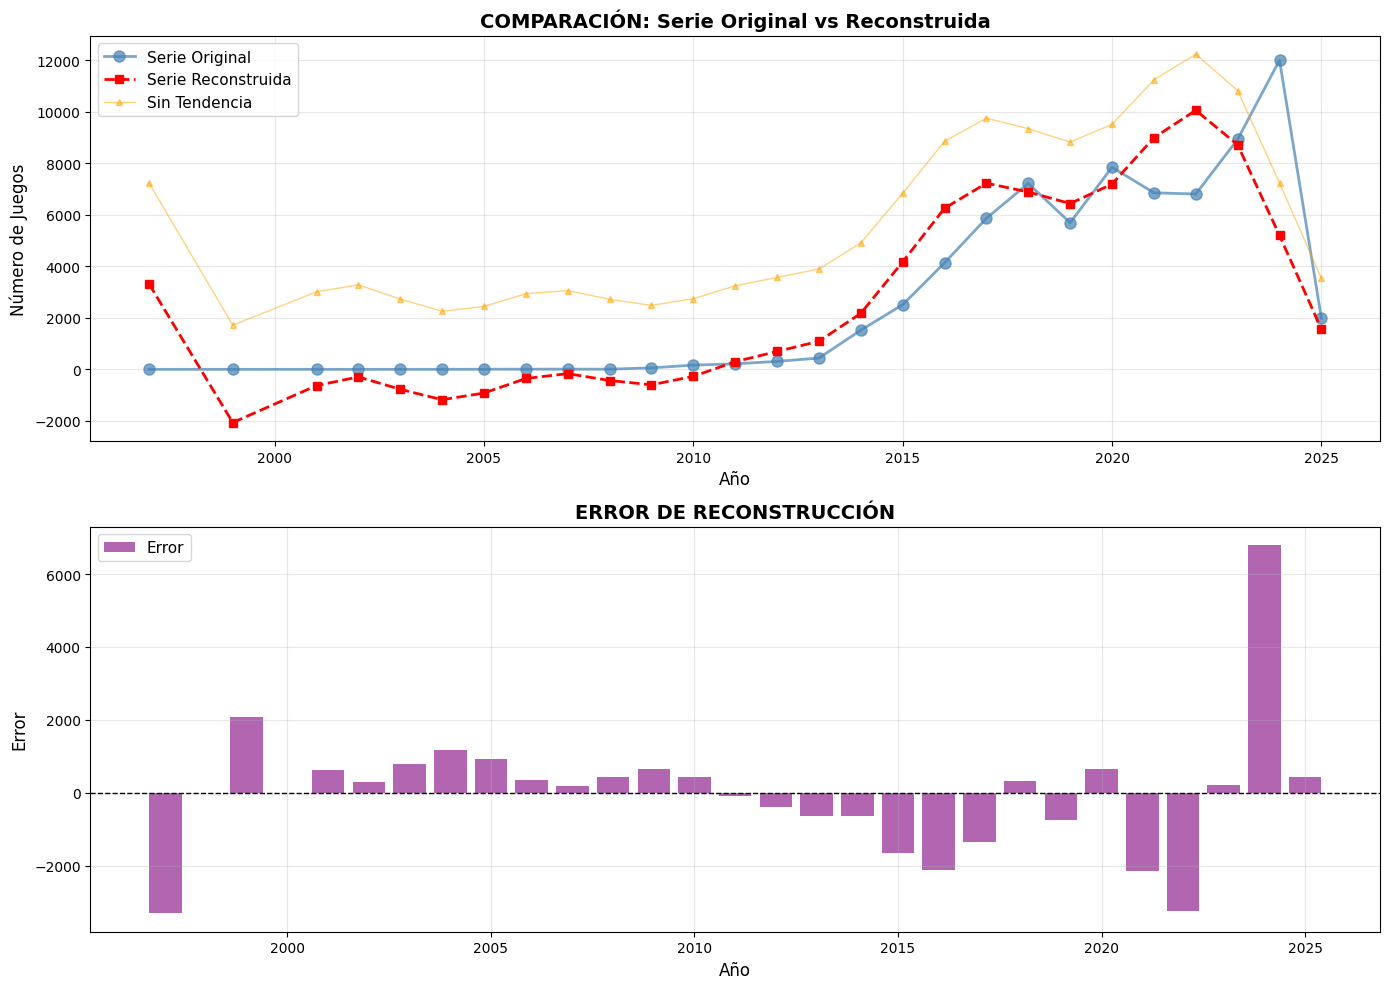

In [236]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

axes[0].plot(t_original, serie_original, marker='o', linewidth=2,
             markersize=8, label='Serie Original', color='steelblue', alpha=0.7)
axes[0].plot(t_original, reconstruccion_final, marker='s', linewidth=2,
             markersize=6, label='Serie Reconstruida', color='red', linestyle='--')

if tiene_tendencia:
    axes[0].plot(t_original, reconstruccion, marker='^', linewidth=1,
                 markersize=4, label='Sin Tendencia', color='orange', alpha=0.5)

axes[0].set_xlabel('Año', fontsize=12)
axes[0].set_ylabel('Número de Juegos', fontsize=12)
axes[0].set_title('COMPARACIÓN: Serie Original vs Reconstruida', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

error = serie_original - reconstruccion_final
axes[1].bar(t_original, error, color='purple', alpha=0.6, label='Error')
axes[1].axhline(0, color='black', linewidth=1, linestyle='--')
axes[1].set_xlabel('Año', fontsize=12)
axes[1].set_ylabel('Error', fontsize=12)
axes[1].set_title('ERROR DE RECONSTRUCCIÓN', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [237]:
print("="*70)
print("MÉTRICAS DE RECONSTRUCCIÓN")
print("="*70)

mse = np.mean(error**2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(error))
r2 = 1 - (np.sum(error**2) / np.sum((serie_original - serie_original.mean())**2))

print(f"Error Cuadrático Medio (MSE):  {mse:.2f}")
print(f"Raíz del MSE (RMSE):           {rmse:.2f}")
print(f"Error Absoluto Medio (MAE):    {mae:.2f}")
print(f"Coeficiente R²:               {r2:.4f}")
print()

MÉTRICAS DE RECONSTRUCCIÓN
Error Cuadrático Medio (MSE):  3418316.98
Raíz del MSE (RMSE):           1848.87
Error Absoluto Medio (MAE):    1211.23
Coeficiente R²:               0.7220



In [238]:
print("="*70)
print("INTERPRETACIÓN DE PERIODOS EN MESES")
print("="*70)
print(f"{'#':<5} {'Periodo (años)':<20} {'Periodo (meses)':<20} {'Interpretación':<30}")
print("-"*70)

for i, comp in enumerate(componentes[1:6], 1):
    periodo_años = comp['periodo']

    if np.isinf(periodo_años):
        continue

    periodo_meses = periodo_años * 12

    if periodo_meses < 6:
        interpretacion = "Variación de muy corto plazo"
    elif 6 <= periodo_meses < 18:
        interpretacion = "Ciclo anual"
    elif 18 <= periodo_meses < 30:
        interpretacion = "Ciclo bianual"
    elif 30 <= periodo_meses < 60:
        interpretacion = "Ciclo de 3-5 años"
    else:
        interpretacion = "Tendencia de largo plazo"

    print(f"{i:<5} {periodo_años:<20.2f} {periodo_meses:<20.1f} {interpretacion:<30}")

INTERPRETACIÓN DE PERIODOS EN MESES
#     Periodo (años)       Periodo (meses)      Interpretación                
----------------------------------------------------------------------
1     27.00                324.0                Tendencia de largo plazo      
2     13.50                162.0                Tendencia de largo plazo      
3     6.75                 81.0                 Tendencia de largo plazo      
4     5.40                 64.8                 Tendencia de largo plazo      
5     9.00                 108.0                Tendencia de largo plazo      


##Precio Medio de Juegos por año

In [239]:
tiempo = temporal_data['release_year'].values
serie_original = temporal_data['price'].values

In [240]:
print("="*70)
print("SERIE 2: PRECIO MEDIANO POR AÑO")
print("="*70)
print(f"Años analizados: {tiempo.min()} - {tiempo.max()}")
print(f"Total de puntos temporales: {len(tiempo)}")
print(f"Precio mediano promedio: ${serie_original.mean():.2f}")
print(f"Precio mínimo: ${serie_original.min():.2f}")
print(f"Precio máximo: ${serie_original.max():.2f}")
print()

SERIE 2: PRECIO MEDIANO POR AÑO
Años analizados: 1997 - 2025
Total de puntos temporales: 27
Precio mediano promedio: $7.69
Precio mínimo: $2.99
Precio máximo: $19.99



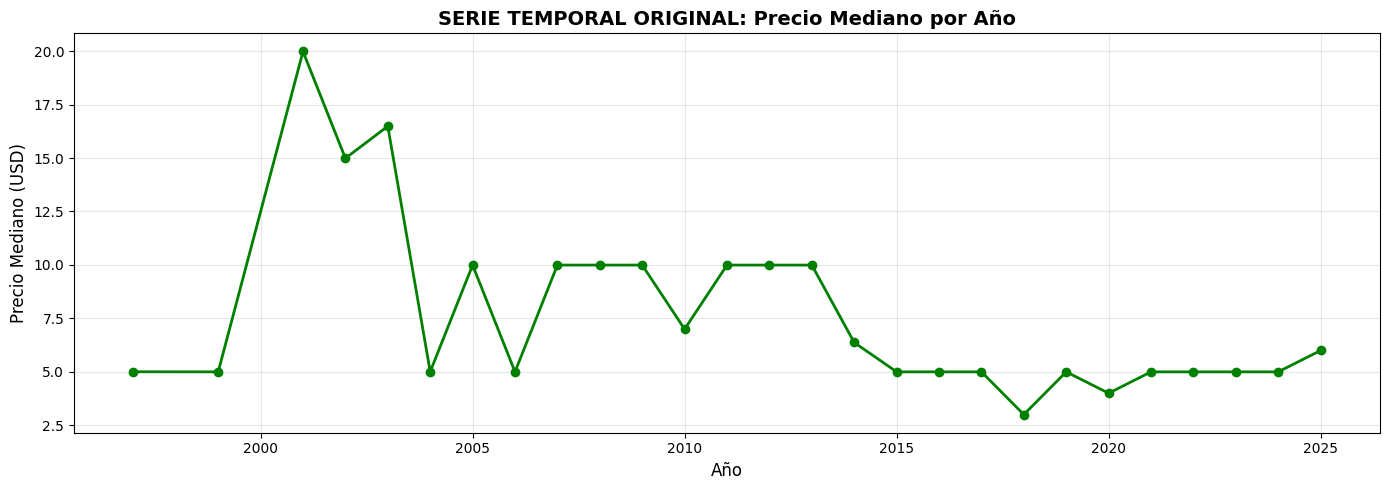

In [241]:
plt.figure(figsize=(14, 5))
plt.plot(tiempo, serie_original, marker='o', linewidth=2, markersize=6, color='green')
plt.xlabel('Año', fontsize=12)
plt.ylabel('Precio Mediano (USD)', fontsize=12)
plt.title('SERIE TEMPORAL ORIGINAL: Precio Mediano por Año', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [242]:
N = len(serie_original)
T = 1.0

In [243]:
yf = fft(serie_original)
xf = fftfreq(N, T)

In [244]:
amplitud = (2.0/N) * np.abs(yf[:N//2])
frecuencias = xf[:N//2]

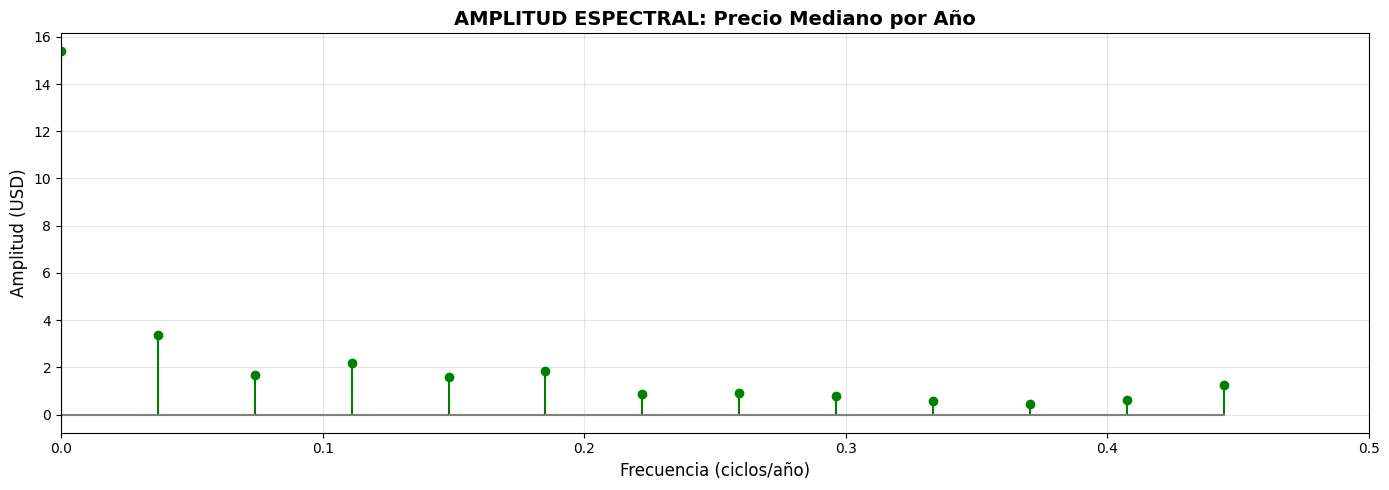

In [245]:
plt.figure(figsize=(14, 5))
plt.stem(frecuencias, amplitud, linefmt='green', markerfmt='go', basefmt='gray')
plt.xlabel('Frecuencia (ciclos/año)', fontsize=12)
plt.ylabel('Amplitud (USD)', fontsize=12)
plt.title('AMPLITUD ESPECTRAL: Precio Mediano por Año', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xlim(0, 0.5)
plt.tight_layout()
plt.show()

In [246]:
umbral = 0.05 * amplitud.max()
indices_significativos = np.where(amplitud > umbral)[0]

In [247]:
componentes = []

In [248]:
print("="*70)
print("COMPONENTES PERIÓDICAS IDENTIFICADAS")
print("="*70)
print(f"{'#':<5} {'Frecuencia (Hz)':<20} {'Periodo (años)':<20} {'Amplitud (USD)':<15}")
print("-"*70)

for i, idx in enumerate(indices_ordenados[:6], 1):
    freq = frecuencias[idx]
    amp = amplitud[idx]

    if freq == 0:
        periodo_str = "∞ (componente DC)"
        periodo = np.inf
    else:
        periodo = 1.0 / freq
        periodo_str = f"{periodo:.2f}"

    print(f"{i:<5} {freq:<20.6f} {periodo_str:<20} ${amp:<14.2f}")

    componentes.append({
        'frecuencia': freq,
        'periodo': periodo,
        'amplitud': amp,
        'fase': np.angle(yf[idx])
    })

print()


COMPONENTES PERIÓDICAS IDENTIFICADAS
#     Frecuencia (Hz)      Periodo (años)       Amplitud (USD) 
----------------------------------------------------------------------
1     0.000000             ∞ (componente DC)    $15.38         
2     0.037037             27.00                $3.36          
3     0.074074             13.50                $1.67          
4     0.148148             6.75                 $1.61          
5     0.185185             5.40                 $1.86          
6     0.111111             9.00                 $2.20          



In [249]:
print("="*70)
print("CONSTRUYENDO COMPONENTES PERIÓDICAS")
print("="*70)

CONSTRUYENDO COMPONENTES PERIÓDICAS


In [250]:
t_continuo = np.linspace(tiempo.min(), tiempo.max(), 500)

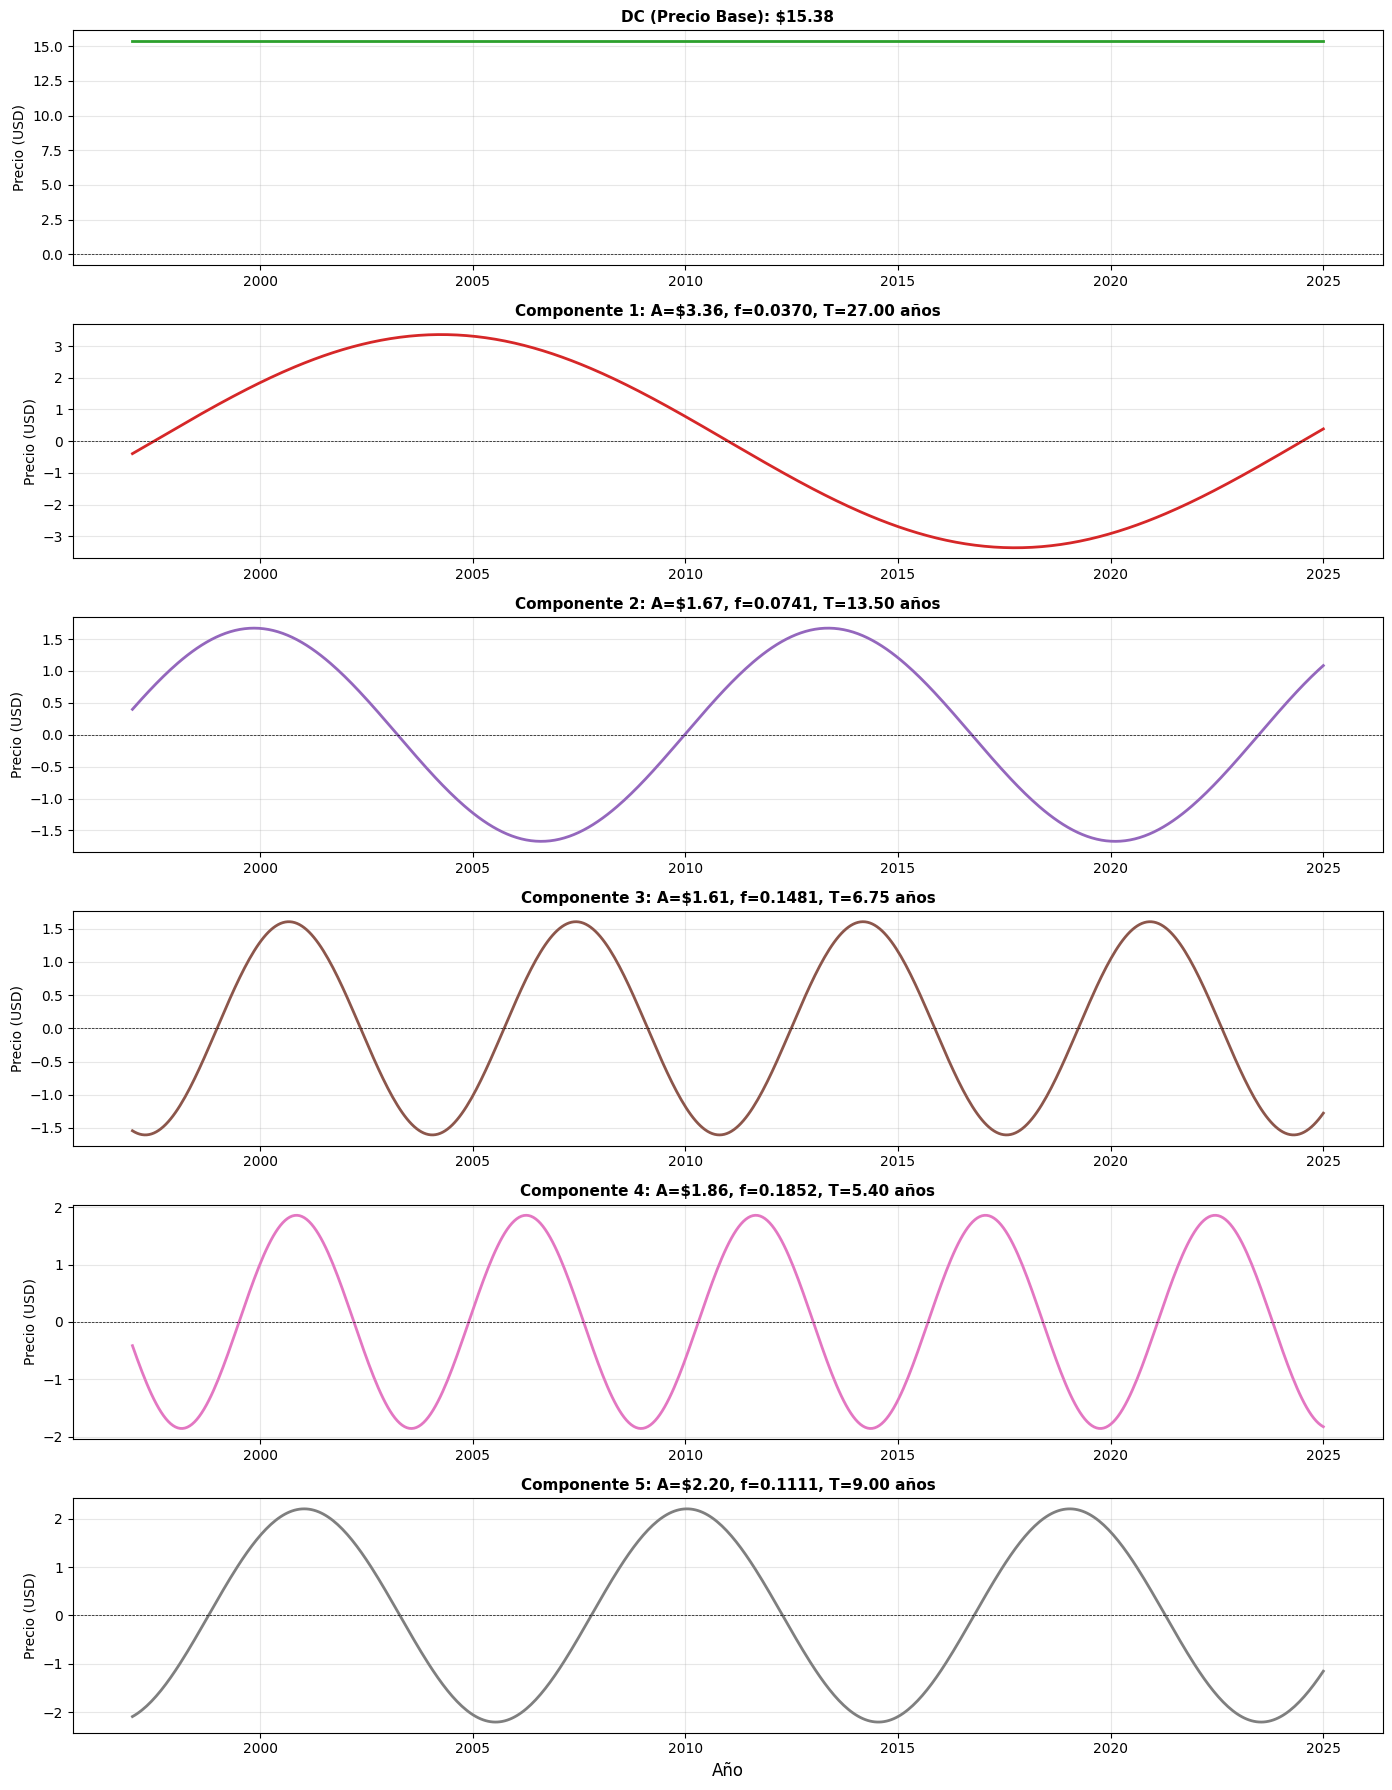

In [251]:
fig, axes = plt.subplots(len(componentes), 1, figsize=(14, 3*len(componentes)))
if len(componentes) == 1:
    axes = [axes]

for i, comp in enumerate(componentes):
    freq = comp['frecuencia']
    amp = comp['amplitud']
    fase = comp['fase']

    if freq == 0:
        componente = np.ones_like(t_continuo) * amp
        label = f"DC (Precio Base): ${amp:.2f}"
    else:
        componente = amp * np.cos(2 * np.pi * freq * t_continuo + fase)
        periodo = comp['periodo']
        label = f"Componente {i}: A=${amp:.2f}, f={freq:.4f}, T={periodo:.2f} años"

    axes[i].plot(t_continuo, componente, linewidth=2, color=f'C{i+2}')
    axes[i].set_ylabel('Precio (USD)', fontsize=10)
    axes[i].set_title(label, fontsize=11, fontweight='bold')
    axes[i].grid(True, alpha=0.3)
    axes[i].axhline(0, color='black', linewidth=0.5, linestyle='--')

axes[-1].set_xlabel('Año', fontsize=12)
plt.tight_layout()
plt.show()

In [252]:
print("="*70)
print("RECONSTRUYENDO SERIE TEMPORAL")
print("="*70)

RECONSTRUYENDO SERIE TEMPORAL


In [253]:
t_original = tiempo
reconstruccion = np.zeros_like(t_original, dtype=float)

In [254]:
for comp in componentes:
    freq = comp['frecuencia']
    amp = comp['amplitud']
    fase = comp['fase']

    if freq == 0:
        reconstruccion += amp
    else:
        reconstruccion += amp * np.cos(2 * np.pi * freq * t_original + fase)

In [255]:
residuos = serie_original - reconstruccion
X_tendencia = t_original.reshape(-1, 1)

In [256]:
modelo_tendencia = skl.linear_model.LinearRegression()
modelo_tendencia.fit(X_tendencia, residuos)

LinearRegression()

In [257]:
tendencia_lineal = modelo_tendencia.predict(X_tendencia)

In [258]:
if np.abs(modelo_tendencia.coef_[0]) > 0.1:  # Pendiente > $0.10/año
    print(f"Tendencia lineal detectada: ${modelo_tendencia.coef_[0]:.2f}/año")
    reconstruccion_final = reconstruccion + tendencia_lineal
    tiene_tendencia = True
else:
    print("No se detectó tendencia lineal significativa")
    reconstruccion_final = reconstruccion
    tiene_tendencia = False

No se detectó tendencia lineal significativa


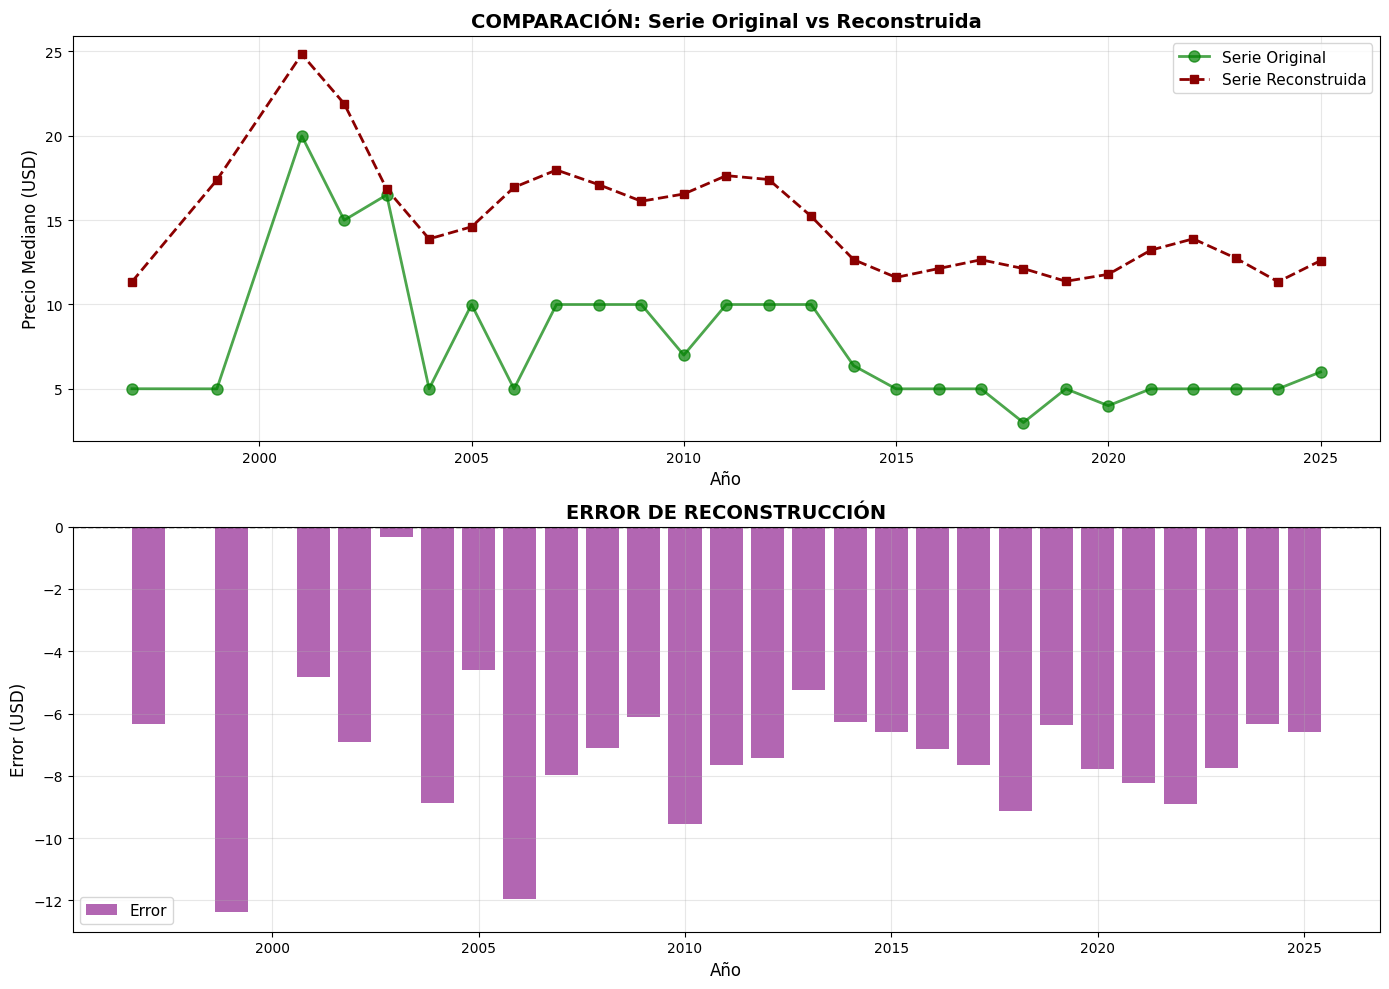

In [259]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

axes[0].plot(t_original, serie_original, marker='o', linewidth=2,
             markersize=8, label='Serie Original', color='green', alpha=0.7)
axes[0].plot(t_original, reconstruccion_final, marker='s', linewidth=2,
             markersize=6, label='Serie Reconstruida', color='darkred', linestyle='--')

if tiene_tendencia:
    axes[0].plot(t_original, reconstruccion, marker='^', linewidth=1,
                 markersize=4, label='Sin Tendencia', color='orange', alpha=0.5)

axes[0].set_xlabel('Año', fontsize=12)
axes[0].set_ylabel('Precio Mediano (USD)', fontsize=12)
axes[0].set_title('COMPARACIÓN: Serie Original vs Reconstruida', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

error = serie_original - reconstruccion_final
axes[1].bar(t_original, error, color='purple', alpha=0.6, label='Error')
axes[1].axhline(0, color='black', linewidth=1, linestyle='--')
axes[1].set_xlabel('Año', fontsize=12)
axes[1].set_ylabel('Error (USD)', fontsize=12)
axes[1].set_title('ERROR DE RECONSTRUCCIÓN', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [260]:
print("="*70)
print("MÉTRICAS DE RECONSTRUCCIÓN")
print("="*70)

mse = np.mean(error**2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(error))
r2 = 1 - (np.sum(error**2) / np.sum((serie_original - serie_original.mean())**2))

print(f"Error Cuadrático Medio (MSE):  ${mse:.2f}")
print(f"Raíz del MSE (RMSE):           ${rmse:.2f}")
print(f"Error Absoluto Medio (MAE):    ${mae:.2f}")
print(f"Coeficiente R² :               {r2:.4f}")

MÉTRICAS DE RECONSTRUCCIÓN
Error Cuadrático Medio (MSE):  $57.76
Raíz del MSE (RMSE):           $7.60
Error Absoluto Medio (MAE):    $7.26
Coeficiente R² :               -2.4855


In [261]:
print("="*70)
print("INTERPRETACIÓN DE PERIODOS EN MESES")
print("="*70)
print(f"{'#':<5} {'Periodo (años)':<20} {'Periodo (meses)':<20} {'Interpretación':<30}")
print("-"*70)

for i, comp in enumerate(componentes[1:6], 1):  # Saltar DC
    periodo_años = comp['periodo']

    if np.isinf(periodo_años):
        continue

    periodo_meses = periodo_años * 12

    if periodo_meses < 6:
        interpretacion = "Fluctuación de muy corto plazo"
    elif 6 <= periodo_meses < 18:
        interpretacion = "Ciclo anual (precios estacionales)"
    elif 18 <= periodo_meses < 30:
        interpretacion = "Ciclo bianual"
    elif 30 <= periodo_meses < 60:
        interpretacion = "Ciclo económico medio plazo"
    else:
        interpretacion = "Tendencia de largo plazo"

    print(f"{i:<5} {periodo_años:<20.2f} {periodo_meses:<20.1f} {interpretacion:<30}")

INTERPRETACIÓN DE PERIODOS EN MESES
#     Periodo (años)       Periodo (meses)      Interpretación                
----------------------------------------------------------------------
1     27.00                324.0                Tendencia de largo plazo      
2     13.50                162.0                Tendencia de largo plazo      
3     6.75                 81.0                 Tendencia de largo plazo      
4     5.40                 64.8                 Tendencia de largo plazo      
5     9.00                 108.0                Tendencia de largo plazo      


##Valoración promedio de juegos por año

In [262]:
tiempo = temporal_data['release_year'].values
serie_original = temporal_data['porcentaje_positive_total'].values

In [263]:
print("="*70)
print("SERIE 3: PORCENTAJE POSITIVO PROMEDIO POR AÑO")
print("="*70)
print(f"Años analizados: {tiempo.min()} - {tiempo.max()}")
print(f"Total de puntos temporales: {len(tiempo)}")
print(f"Porcentaje positivo promedio: {serie_original.mean()*100:.2f}%")
print(f"Porcentaje mínimo: {serie_original.min()*100:.2f}%")
print(f"Porcentaje máximo: {serie_original.max()*100:.2f}%")
print()

SERIE 3: PORCENTAJE POSITIVO PROMEDIO POR AÑO
Años analizados: 1997 - 2025
Total de puntos temporales: 27
Porcentaje positivo promedio: 79.24%
Porcentaje mínimo: 69.53%
Porcentaje máximo: 93.51%



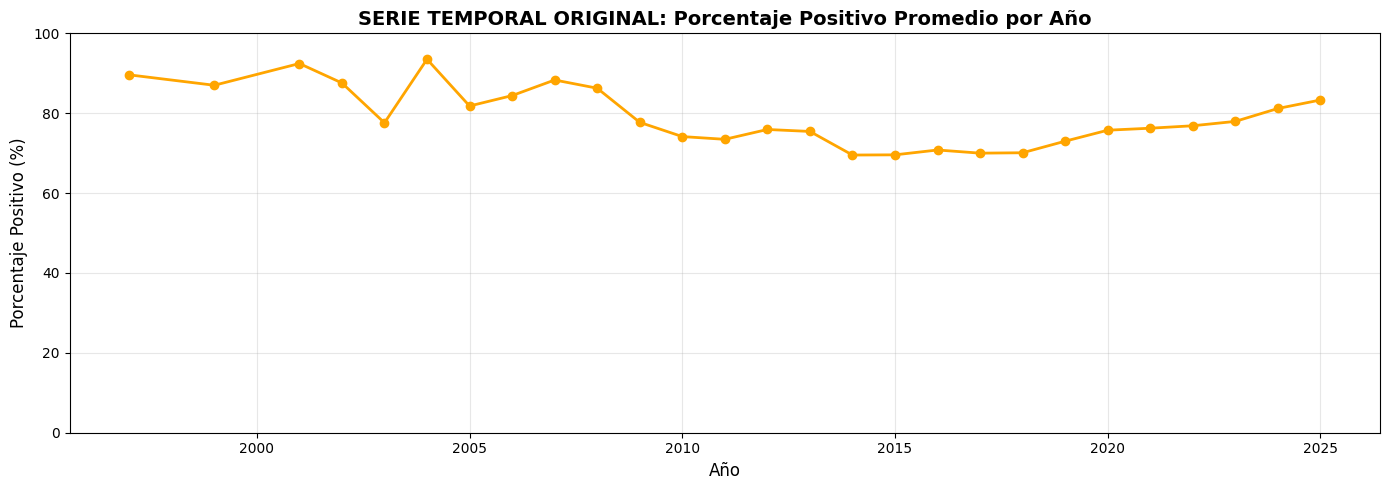

In [264]:
plt.figure(figsize=(14, 5))
plt.plot(tiempo, serie_original*100, marker='o', linewidth=2, markersize=6, color='orange')
plt.xlabel('Año', fontsize=12)
plt.ylabel('Porcentaje Positivo (%)', fontsize=12)
plt.title('SERIE TEMPORAL ORIGINAL: Porcentaje Positivo Promedio por Año',
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

In [265]:
N = len(serie_original)
T = 1.0

In [266]:
yf = fft(serie_original)
xf = fftfreq(N, T)

In [267]:
amplitud = (2.0/N) * np.abs(yf[:N//2])
frecuencias = xf[:N//2]

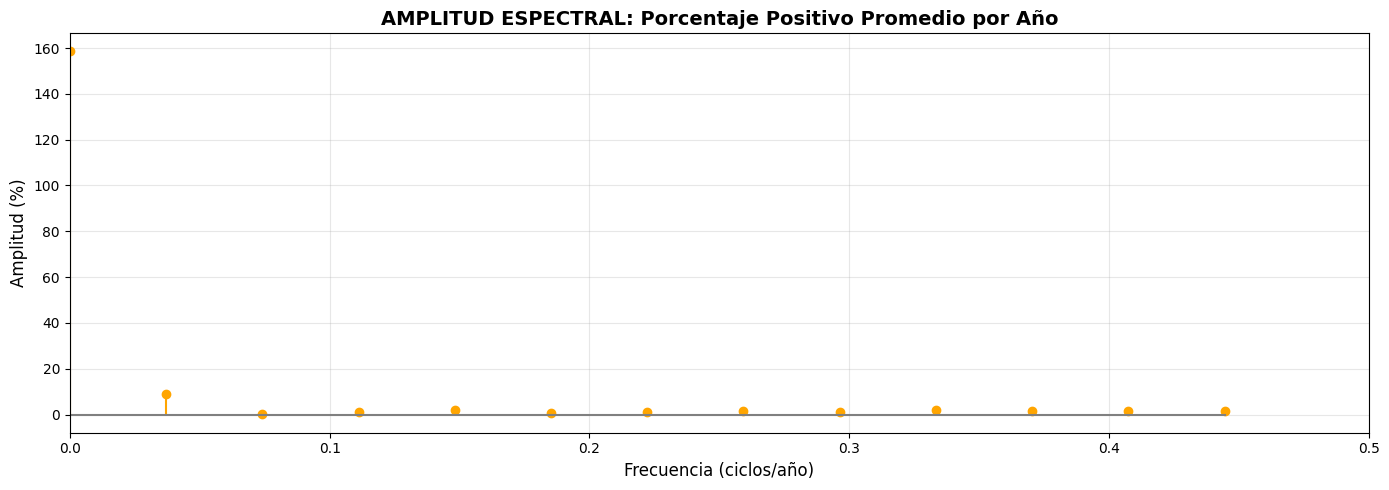

In [268]:
plt.figure(figsize=(14, 5))
plt.stem(frecuencias, amplitud*100, linefmt='orange', markerfmt='o', basefmt='gray')
plt.xlabel('Frecuencia (ciclos/año)', fontsize=12)
plt.ylabel('Amplitud (%)', fontsize=12)
plt.title('AMPLITUD ESPECTRAL: Porcentaje Positivo Promedio por Año',
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xlim(0, 0.5)
plt.tight_layout()
plt.show()

In [269]:
umbral = 0.05 * amplitud.max()
indices_significativos = np.where(amplitud > umbral)[0]

In [270]:
indices_ordenados = indices_significativos[np.argsort(-amplitud[indices_significativos])]

In [271]:
componentes = []

In [272]:
print("="*70)
print("COMPONENTES PERIÓDICAS IDENTIFICADAS")
print("="*70)
print(f"{'#':<5} {'Frecuencia (Hz)':<20} {'Periodo (años)':<20} {'Amplitud (%)':<15}")
print("-"*70)

for i, idx in enumerate(indices_ordenados[:6], 1):
    freq = frecuencias[idx]
    amp = amplitud[idx]

    if freq == 0:
        periodo_str = "∞ (componente DC)"
        periodo = np.inf
    else:
        periodo = 1.0 / freq
        periodo_str = f"{periodo:.2f}"

    print(f"{i:<5} {freq:<20.6f} {periodo_str:<20} {amp*100:<14.2f}%")

    componentes.append({
        'frecuencia': freq,
        'periodo': periodo,
        'amplitud': amp,
        'fase': np.angle(yf[idx])
    })

COMPONENTES PERIÓDICAS IDENTIFICADAS
#     Frecuencia (Hz)      Periodo (años)       Amplitud (%)   
----------------------------------------------------------------------
1     0.000000             ∞ (componente DC)    158.48        %
2     0.037037             27.00                8.96          %


In [273]:
print("="*70)
print("CONSTRUYENDO COMPONENTES PERIÓDICAS")
print("="*70)

CONSTRUYENDO COMPONENTES PERIÓDICAS


In [274]:
t_continuo = np.linspace(tiempo.min(), tiempo.max(), 500)

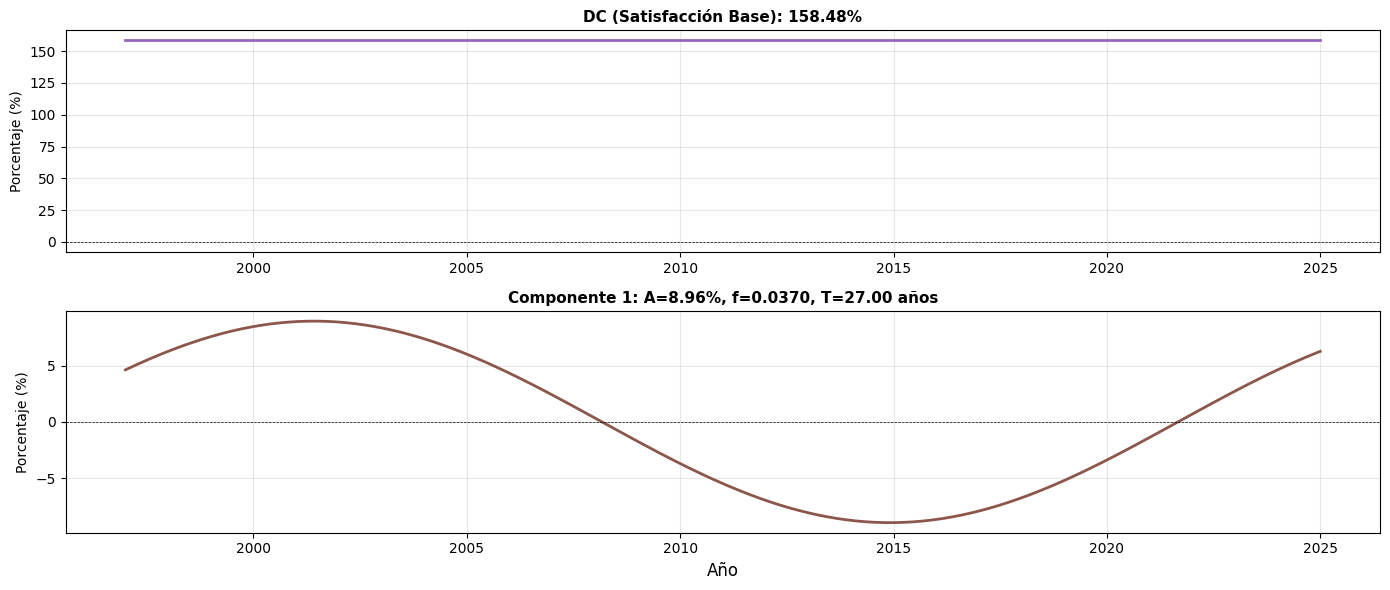

In [275]:
fig, axes = plt.subplots(len(componentes), 1, figsize=(14, 3*len(componentes)))
if len(componentes) == 1:
    axes = [axes]

for i, comp in enumerate(componentes):
    freq = comp['frecuencia']
    amp = comp['amplitud']
    fase = comp['fase']

    if freq == 0:
        # Componente DC
        componente = np.ones_like(t_continuo) * amp
        label = f"DC (Satisfacción Base): {amp*100:.2f}%"
    else:
        # Componente sinusoidal: A·cos(2πft + φ)
        componente = amp * np.cos(2 * np.pi * freq * t_continuo + fase)
        periodo = comp['periodo']
        label = f"Componente {i}: A={amp*100:.2f}%, f={freq:.4f}, T={periodo:.2f} años"

    axes[i].plot(t_continuo, componente*100, linewidth=2, color=f'C{i+4}')
    axes[i].set_ylabel('Porcentaje (%)', fontsize=10)
    axes[i].set_title(label, fontsize=11, fontweight='bold')
    axes[i].grid(True, alpha=0.3)
    axes[i].axhline(0, color='black', linewidth=0.5, linestyle='--')

axes[-1].set_xlabel('Año', fontsize=12)
plt.tight_layout()
plt.show()

In [276]:
print("="*70)
print("RECONSTRUYENDO SERIE TEMPORAL")
print("="*70)

RECONSTRUYENDO SERIE TEMPORAL


In [277]:
t_original = tiempo
reconstruccion = np.zeros_like(t_original, dtype=float)

In [278]:
for comp in componentes:
    freq = comp['frecuencia']
    amp = comp['amplitud']
    fase = comp['fase']

    if freq == 0:
        reconstruccion += amp
    else:
        reconstruccion += amp * np.cos(2 * np.pi * freq * t_original + fase)

In [279]:
residuos = serie_original - reconstruccion
X_tendencia = t_original.reshape(-1, 1)

In [280]:
modelo_tendencia = skl.linear_model.LinearRegression()
modelo_tendencia.fit(X_tendencia, residuos)

LinearRegression()

In [281]:
tendencia_lineal = modelo_tendencia.predict(X_tendencia)

In [282]:
if np.abs(modelo_tendencia.coef_[0]) > 0.001:  # Pendiente > 0.1%/año
    print(f"Tendencia lineal detectada: {modelo_tendencia.coef_[0]*100:.2f}%/año")
    reconstruccion_final = reconstruccion + tendencia_lineal
    tiene_tendencia = True
else:
    print("No se detectó tendencia lineal significativa")
    reconstruccion_final = reconstruccion
    tiene_tendencia = False

Tendencia lineal detectada: -0.18%/año


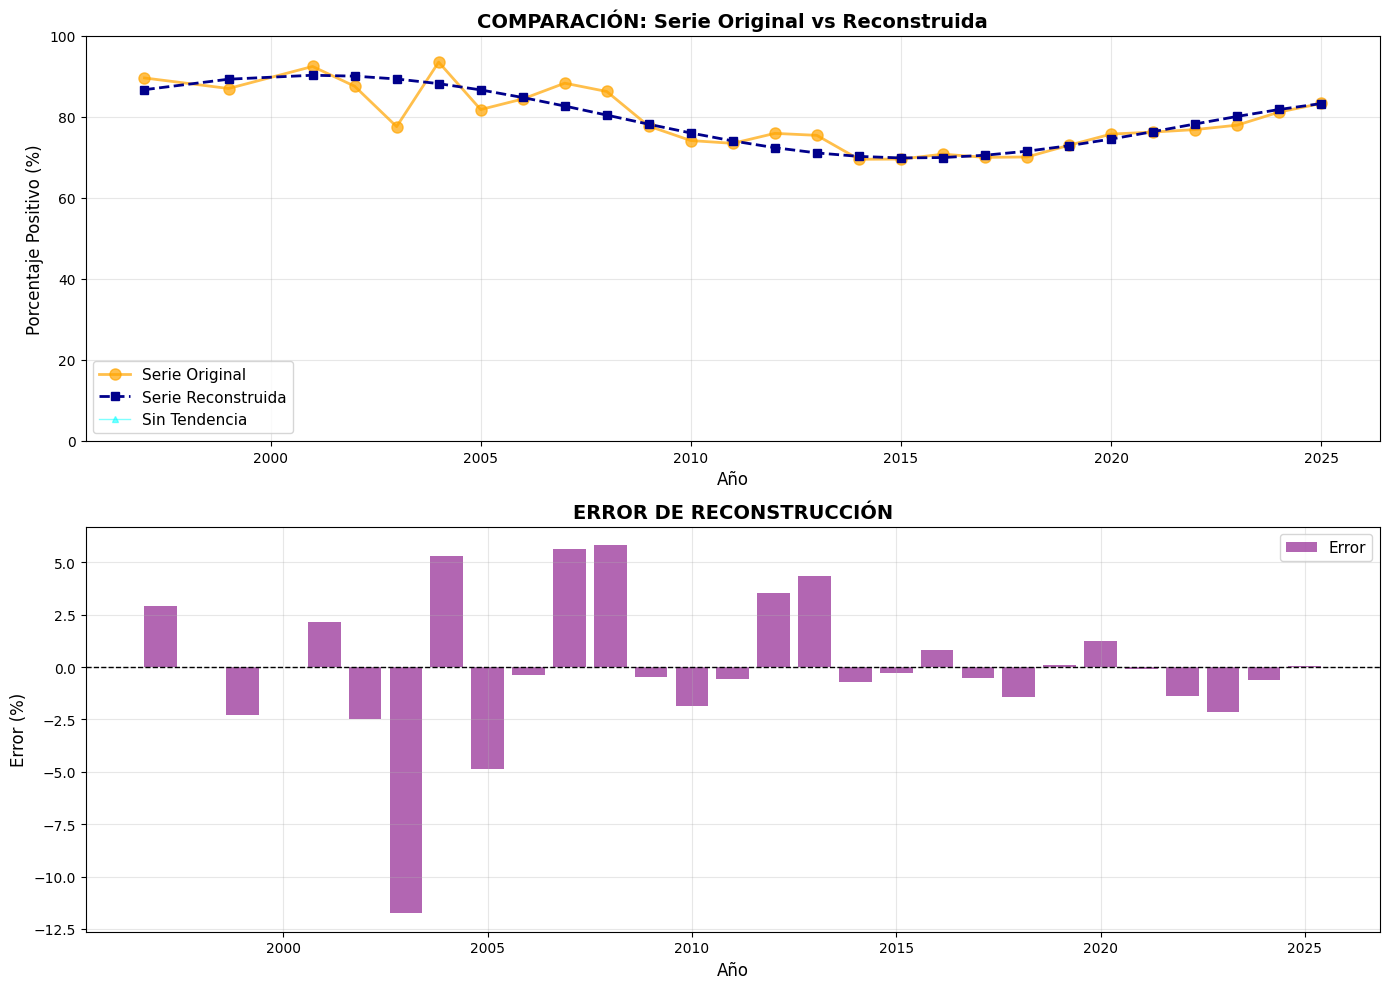

In [283]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Gráfica 1: Comparación directa
axes[0].plot(t_original, serie_original*100, marker='o', linewidth=2,
             markersize=8, label='Serie Original', color='orange', alpha=0.7)
axes[0].plot(t_original, reconstruccion_final*100, marker='s', linewidth=2,
             markersize=6, label='Serie Reconstruida', color='darkblue', linestyle='--')

if tiene_tendencia:
    axes[0].plot(t_original, reconstruccion*100, marker='^', linewidth=1,
                 markersize=4, label='Sin Tendencia', color='cyan', alpha=0.5)

axes[0].set_xlabel('Año', fontsize=12)
axes[0].set_ylabel('Porcentaje Positivo (%)', fontsize=12)
axes[0].set_title('COMPARACIÓN: Serie Original vs Reconstruida', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)
axes[0].set_ylim(0, 100)

# Gráfica 2: Error de reconstrucción
error = serie_original - reconstruccion_final
axes[1].bar(t_original, error*100, color='purple', alpha=0.6, label='Error')
axes[1].axhline(0, color='black', linewidth=1, linestyle='--')
axes[1].set_xlabel('Año', fontsize=12)
axes[1].set_ylabel('Error (%)', fontsize=12)
axes[1].set_title('ERROR DE RECONSTRUCCIÓN', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [284]:
print("="*70)
print("MÉTRICAS DE RECONSTRUCCIÓN")
print("="*70)

mse = np.mean(error**2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(error))
r2 = 1 - (np.sum(error**2) / np.sum((serie_original - serie_original.mean())**2))

print(f"Error Cuadrático Medio (MSE):  {mse*100:.4f}%")
print(f"Raíz del MSE (RMSE):           {rmse*100:.4f}%")
print(f"Error Absoluto Medio (MAE):    {mae*100:.4f}%")
print(f"Coeficiente R² :               {r2:.4f}")

MÉTRICAS DE RECONSTRUCCIÓN
Error Cuadrático Medio (MSE):  0.1214%
Raíz del MSE (RMSE):           3.4844%
Error Absoluto Medio (MAE):    2.3640%
Coeficiente R² :               0.7634


In [285]:
print("="*70)
print("INTERPRETACIÓN DE PERIODOS EN MESES")
print("="*70)
print(f"{'#':<5} {'Periodo (años)':<20} {'Periodo (meses)':<20} {'Interpretación':<35}")
print("-"*70)

for i, comp in enumerate(componentes[1:6], 1):  # Saltar DC
    periodo_años = comp['periodo']

    if np.isinf(periodo_años):
        continue

    periodo_meses = periodo_años * 12

    # Interpretación cualitativa
    if periodo_meses < 6:
        interpretacion = "Variación de muy corto plazo"
    elif 6 <= periodo_meses < 18:
        interpretacion = "Ciclo anual (satisfacción estacional)"
    elif 18 <= periodo_meses < 30:
        interpretacion = "Ciclo bianual"
    elif 30 <= periodo_meses < 60:
        interpretacion = "Ciclo de calidad medio plazo"
    else:
        interpretacion = "Tendencia de largo plazo"

    print(f"{i:<5} {periodo_años:<20.2f} {periodo_meses:<20.1f} {interpretacion:<35}")

INTERPRETACIÓN DE PERIODOS EN MESES
#     Periodo (años)       Periodo (meses)      Interpretación                     
----------------------------------------------------------------------
1     27.00                324.0                Tendencia de largo plazo           


#Medidas de Disimilitud y Similitud

###DO NOT TOUCH

In [287]:
numerical_info = norm_dataset.select_dtypes(include=[np.number])

In [ ]:
D_euclidean = skl.metrics.pairwise.euclidean_distances(numerical_info)
D_manhatan = skl.metrics.pairwise.manhattan_distances(numerical_info)

In [ ]:
fig, axis = plt.subplots(1, 2, figsize=(14, 5))
axis[0].imshow(D_euclidean, cmap='viridis')
axis[0].set_title('Distancia Euclidiana', fontsize=14, fontweight='bold')
axis[0].set_xlabel('Juegos', fontsize=12)
axis[0].set_ylabel('Juegos', fontsize=12)
axis[0].set_xticks(numerical_info.columns)
axis[0].set_yticks(numerical_info.columns)

axis[1].imshow(D_manhatan, cmap='viridis')
axis[1].set_title('Distancia de Manhattan', fontsize=14, fontweight='bold')
axis[1].set_xlabel('Juegos', fontsize=12)
axis[1].set_ylabel('Juegos', fontsize=12)
axis[1].set_xticks(numerical_info.columns)
axis[1].set_yticks(numerical_info.columns)

plt.tight_layout()
plt.show()

#Reducción de Dimensión

In [288]:
scaler = skl.preprocessing.StandardScaler()
numerical_info_scaled = scaler.fit_transform(numerical_info)

In [289]:
pca_2d_model = skl.decomposition.PCA(n_components=2)
reduced_2d = pca_model_2d.fit_transform(numerical_info_scaled)

In [290]:
print(reduced_2d.shape)

(72548, 2)


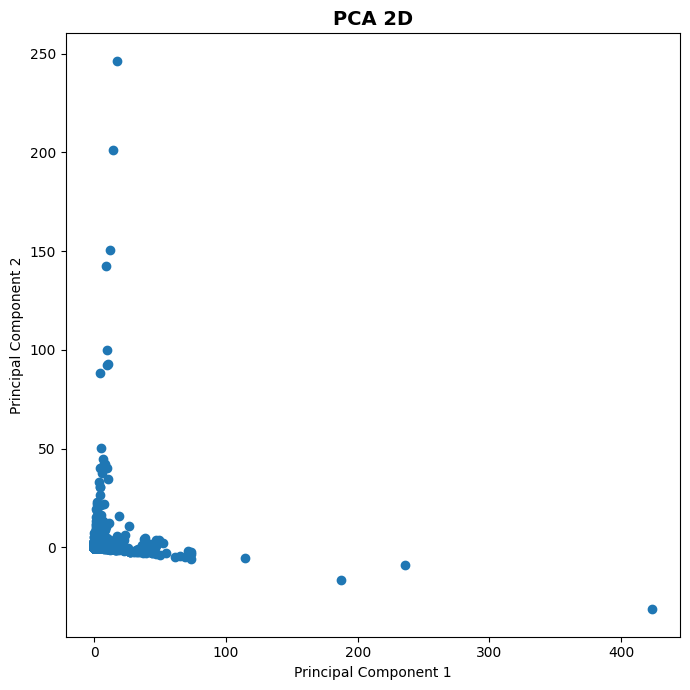

In [291]:
plt.figure(figsize=(7, 7))
plt.scatter(reduced_2d[:,0], reduced_2d[:,1])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA 2D", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [292]:
pca_3d_model = skl.decomposition.PCA(n_components=3)
reduced_3d = pca_model_3d.fit_transform(numerical_info_scaled)

In [293]:
print(reduced_3d.shape)

(72548, 3)


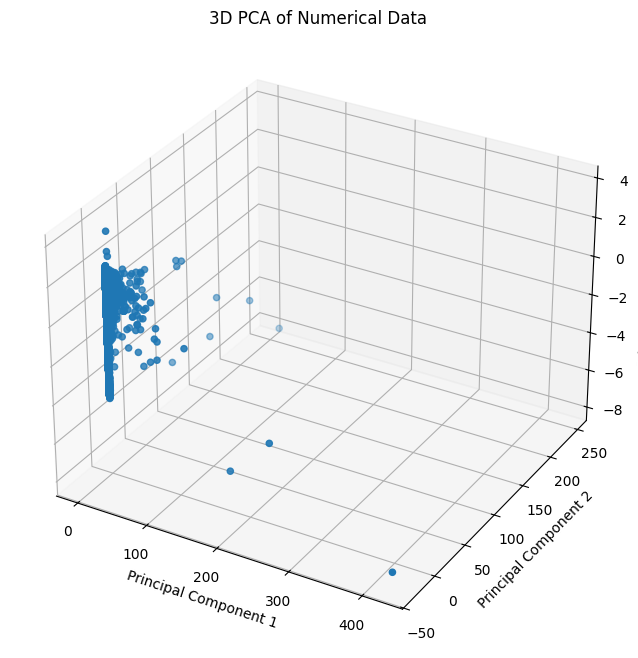

In [294]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(reduced_3d[:, 0], reduced_3d[:, 1], reduced_3d[:, 2])
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of Numerical Data')
plt.show()